In [1]:
import numpy as np
import pandas as pd
import matplotlib.pyplot as plt
import seaborn as sns

**DAY-1**

In [7]:
x = np.arange(-10,10,.1)

In [8]:
# Equation of sigmoid function
# 1/(1+e^-x)

sig = 1/(1+(np.power(np.e,-x)))

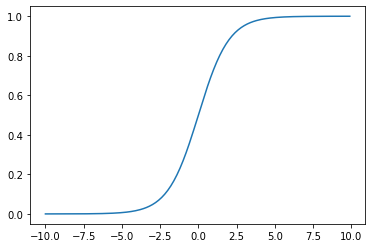

In [10]:
# Plotting the sigmoid function.

plt.plot(x,sig)

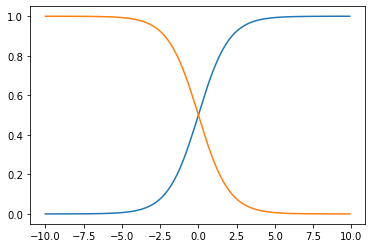

In [11]:
plt.plot(x,sig)
plt.plot(x,1-sig)

In [15]:
p = np.arange(0.1,1,.1)

# We will take start = 0.1 as 0 will give 'divide by 0' error.

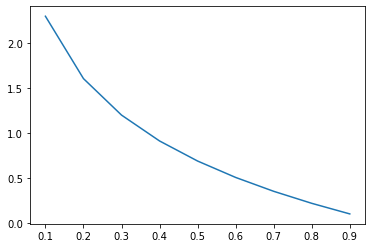

In [16]:
# Plot for log loss

plt.plot(p,-np.log(p))

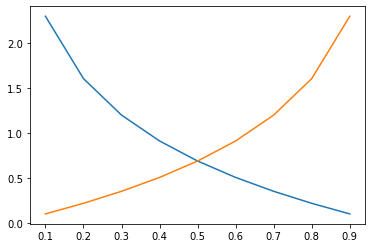

In [17]:
plt.plot(p,-np.log(p))
plt.plot(p,-np.log(1-p))

**Dataset**

In [2]:
df1 = pd.read_csv('Admission_Predict.csv')
df1.head()

Serial No.  GRE Score  TOEFL Score  University Rating  SOP  LOR  CGPA  \
0           1        337          118                  4  4.5  4.5  9.65   
1           2        324          107                  4  4.0  4.5  8.87   
2           3        316          104                  3  3.0  3.5  8.00   
3           4        322          110                  3  3.5  2.5  8.67   
4           5        314          103                  2  2.0  3.0  8.21   

   Research  Chance of Admit  
0         1                1  
1         1                1  
2         1                0  
3         1                1  
4         0                0

In [6]:
df1.shape

(400, 9)

In [18]:
df1.isnull().sum()

# No missing values are found.

Serial No.           0
GRE Score            0
TOEFL Score          0
University Rating    0
SOP                  0
LOR                  0
CGPA                 0
Research             0
Chance of Admit      0
dtype: int64

In [20]:
df1.info()

# No encoding required - all attributes are numeric in nature.

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 400 entries, 0 to 399
Data columns (total 9 columns):
 #   Column             Non-Null Count  Dtype  
---  ------             --------------  -----  
 0   Serial No.         400 non-null    int64  
 1   GRE Score          400 non-null    int64  
 2   TOEFL Score        400 non-null    int64  
 3   University Rating  400 non-null    int64  
 4   SOP                400 non-null    float64
 5   LOR                400 non-null    float64
 6   CGPA               400 non-null    float64
 7   Research           400 non-null    int64  
 8   Chance of Admit    400 non-null    int64  
dtypes: float64(3), int64(6)
memory usage: 28.2 KB


In [21]:
df1['Chance of Admit'].value_counts()

# Data Imbalance not present. 
# Data -  11:9

0    220
1    180
Name: Chance of Admit, dtype: int64

In [22]:
df1.head()

Serial No.  GRE Score  TOEFL Score  University Rating  SOP  LOR  CGPA  \
0           1        337          118                  4  4.5  4.5  9.65   
1           2        324          107                  4  4.0  4.5  8.87   
2           3        316          104                  3  3.0  3.5  8.00   
3           4        322          110                  3  3.5  2.5  8.67   
4           5        314          103                  2  2.0  3.0  8.21   

   Research  Chance of Admit  
0         1                1  
1         1                1  
2         1                0  
3         1                1  
4         0                0

In [3]:
# Dropping serial number and Target variable (Chance of Admit)

X = df1.drop(['Serial No.','Chance of Admit'],axis=1)

In [4]:
y = df1['Chance of Admit']

In [5]:
from sklearn.preprocessing import StandardScaler

In [6]:
sc = StandardScaler()

In [7]:
scaled_X = sc.fit_transform(X)
scaled_X

array([[ 1.76210664,  1.74697064,  0.79882862, ...,  1.16732114,
         1.76481828,  0.90911166],
       [ 0.62765641, -0.06763531,  0.79882862, ...,  1.16732114,
         0.45515126,  0.90911166],
       [-0.07046681, -0.56252785, -0.07660001, ...,  0.05293342,
        -1.00563118,  0.90911166],
       ...,
       [ 1.15124883,  1.41704229,  0.79882862, ...,  1.16732114,
         1.42900622,  0.90911166],
       [-0.41952842, -0.72749202, -0.07660001, ...,  0.61012728,
         0.30403584, -1.09997489],
       [ 1.41304503,  1.58200646,  0.79882862, ...,  0.61012728,
         1.78160888,  0.90911166]])

In [8]:
scaled_X_df = pd.DataFrame(scaled_X,columns=X.columns)
scaled_X_df

GRE Score  TOEFL Score  University Rating       SOP       LOR      CGPA  \
0     1.762107     1.746971           0.798829  1.093864  1.167321  1.764818   
1     0.627656    -0.067635           0.798829  0.596653  1.167321  0.455151   
2    -0.070467    -0.562528          -0.076600 -0.397769  0.052933 -1.005631   
3     0.453126     0.427257          -0.076600  0.099442 -1.061454  0.119339   
4    -0.244998    -0.727492          -0.952029 -1.392191 -0.504260 -0.653029   
..         ...          ...                ...       ...       ...       ...   
395   0.627656     0.427257          -0.076600  0.099442  0.052933  0.740592   
396   0.714922    -0.067635          -0.076600 -0.397769  0.052933  0.858126   
397   1.151249     1.417042           0.798829  1.591075  1.167321  1.429006   
398  -0.419528    -0.727492          -0.076600  0.099442  0.610127  0.304036   
399   1.413045     1.582006           0.798829  1.591075  0.610127  1.781609   

     Research  
0    0.909112  
1    0.909112  
2    0.909112  
3    0.909112  
4   -1.099975  
..        ...  
395  0.909112  
396  0.909112  
397  0.909112  
398 -1.099975  
399  0.909112  

[400 rows x 7 columns]

In [9]:
import statsmodels.api as sm

In [10]:
scaled_X_df = sm.add_constant(scaled_X_df)

In [6]:
from sklearn.model_selection import train_test_split

In [12]:
X_train, X_test, y_train, y_test = train_test_split(scaled_X_df,y,test_size=0.3,random_state=1)

In [13]:
X_train.shape, X_test.shape, y_train.shape, y_test.shape

((280, 8), (120, 8), (280,), (120,))

In [14]:
# Logistic Regression

logreg = sm.Logit(y_train,X_train).fit()

Optimization terminated successfully.
         Current function value: 0.269469
         Iterations 8


In [15]:
print(logreg.summary())

                           Logit Regression Results                           
Dep. Variable:        Chance of Admit   No. Observations:                  280
Model:                          Logit   Df Residuals:                      272
Method:                           MLE   Df Model:                            7
Date:                Wed, 01 Sep 2021   Pseudo R-squ.:                  0.6084
Time:                        09:53:22   Log-Likelihood:                -75.451
converged:                       True   LL-Null:                       -192.68
Covariance Type:            nonrobust   LLR p-value:                 5.611e-47
                        coef    std err          z      P>|z|      [0.025      0.975]
-------------------------------------------------------------------------------------
const                -0.4365      0.213     -2.050      0.040      -0.854      -0.019
GRE Score             0.5055      0.436      1.160      0.246      -0.348       1.359
TOEFL Score           0.

In [16]:
# Confusion Matrix

from sklearn.metrics import confusion_matrix

In [17]:
y_pred_prob = logreg.predict(X_test)

In [18]:
# y_pred_prob contains probability.. to obtain actual y we need to use threshold.

y_pred = [0 if x<0.5 else 1 for x in y_pred_prob]

In [19]:
cm = confusion_matrix(y_test,y_pred)

In [20]:
cm

array([[61,  5],
       [ 6, 48]], dtype=int64)

In [21]:
TN = cm[0][0]
FP = cm[0][1]
FN = cm[1][0]
TP = cm[1][1]

In [22]:
precision = TP/(TP+FP)
precision

0.9056603773584906

In [23]:
from sklearn.metrics import accuracy_score,precision_score,roc_auc_score,log_loss,plot_roc_curve,classification_report,roc_curve

In [24]:
print(classification_report(y_test,y_pred))

              precision    recall  f1-score   support

           0       0.91      0.92      0.92        66
           1       0.91      0.89      0.90        54

    accuracy                           0.91       120
   macro avg       0.91      0.91      0.91       120
weighted avg       0.91      0.91      0.91       120



In [25]:
fpr,tpr,thresh = roc_curve(y_test,y_pred_prob)

In [26]:
fpr

array([0.        , 0.        , 0.        , 0.01515152, 0.01515152,
       0.03030303, 0.03030303, 0.06060606, 0.06060606, 0.07575758,
       0.07575758, 0.10606061, 0.10606061, 0.21212121, 0.21212121,
       0.22727273, 0.22727273, 0.43939394, 0.43939394, 1.        ])

In [27]:
tpr

array([0.        , 0.01851852, 0.74074074, 0.74074074, 0.75925926,
       0.75925926, 0.7962963 , 0.7962963 , 0.85185185, 0.85185185,
       0.90740741, 0.90740741, 0.94444444, 0.94444444, 0.96296296,
       0.96296296, 0.98148148, 0.98148148, 1.        , 1.        ])

In [28]:
thresh

array([1.99935521e+00, 9.99355207e-01, 8.17439996e-01, 8.01578247e-01,
       7.99749803e-01, 7.98475119e-01, 7.79352239e-01, 7.70999981e-01,
       5.76714034e-01, 5.28532899e-01, 4.78877629e-01, 4.64083123e-01,
       4.50379011e-01, 2.91358779e-01, 2.78989102e-01, 2.54000339e-01,
       2.53686211e-01, 7.52888727e-02, 7.40934286e-02, 8.00674987e-05])

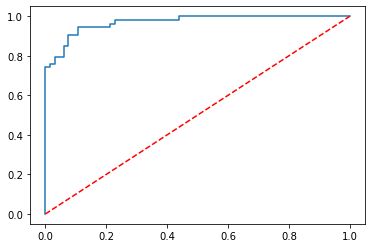

In [29]:
# ROC Curve

plt.plot(fpr,tpr)
plt.plot([0,1],[0,1],'r--')

In [30]:
roc_auc_score(y_test,y_pred_prob)

0.9708193041526374

In [31]:
logreg.aic

166.90291935311745

In [32]:
#Youden's Index

youdens_table = pd.DataFrame({'TPR':tpr,'FPR':fpr,'Threshold':thresh})
youdens_table

TPR       FPR  Threshold
0   0.000000  0.000000   1.999355
1   0.018519  0.000000   0.999355
2   0.740741  0.000000   0.817440
3   0.740741  0.015152   0.801578
4   0.759259  0.015152   0.799750
5   0.759259  0.030303   0.798475
6   0.796296  0.030303   0.779352
7   0.796296  0.060606   0.771000
8   0.851852  0.060606   0.576714
9   0.851852  0.075758   0.528533
10  0.907407  0.075758   0.478878
11  0.907407  0.106061   0.464083
12  0.944444  0.106061   0.450379
13  0.944444  0.212121   0.291359
14  0.962963  0.212121   0.278989
15  0.962963  0.227273   0.254000
16  0.981481  0.227273   0.253686
17  0.981481  0.439394   0.075289
18  1.000000  0.439394   0.074093
19  1.000000  1.000000   0.000080

In [33]:
youdens_table['TPR-FPR'] = youdens_table['TPR'] - youdens_table['FPR']

In [36]:
youdens_table.sort_values(by = 'TPR-FPR',ascending = False)

TPR       FPR  Threshold   TPR-FPR
12  0.944444  0.106061   0.450379  0.838384
10  0.907407  0.075758   0.478878  0.831650
11  0.907407  0.106061   0.464083  0.801347
8   0.851852  0.060606   0.576714  0.791246
9   0.851852  0.075758   0.528533  0.776094
6   0.796296  0.030303   0.779352  0.765993
16  0.981481  0.227273   0.253686  0.754209
14  0.962963  0.212121   0.278989  0.750842
4   0.759259  0.015152   0.799750  0.744108
2   0.740741  0.000000   0.817440  0.740741
7   0.796296  0.060606   0.771000  0.735690
15  0.962963  0.227273   0.254000  0.735690
13  0.944444  0.212121   0.291359  0.732323
5   0.759259  0.030303   0.798475  0.728956
3   0.740741  0.015152   0.801578  0.725589
18  1.000000  0.439394   0.074093  0.560606
17  0.981481  0.439394   0.075289  0.542088
1   0.018519  0.000000   0.999355  0.018519
0   0.000000  0.000000   1.999355  0.000000
19  1.000000  1.000000   0.000080  0.000000

In [38]:
youdens_table.sort_values(by = 'TPR-FPR',ascending = False).head(1)

# cut-off prob/ Youden's Index = 0.45 since for 0.45 we are getting max(TPR-FPR)

TPR       FPR  Threshold   TPR-FPR
12  0.944444  0.106061   0.450379  0.838384

In [39]:
# cost-based method

def cal_cost(y_test,y_pred,cost_FN,cost_FP):
    cm = confusion_matrix(y_test,y_pred)
    cm_array = np.array(cm)
    return cm_array[1,0]*cost_FN + cm_array[0,1]*cost_FP

In [40]:
#000 D0a0ta 0Frame for cost

df_cost = pd.DataFrame(columns = ['Cut-Off','Total_Cost'])

In [41]:
i = 0
for cutoff in range(10,100):
    total_cost = cal_cost(y_test,y_pred_prob.map(lambda x: 1 if x > (cutoff/100) else 0),3.5,2)  # 3.5, 2 are aussumption
    df_cost.loc[i] = [(cutoff/100),total_cost]
    i+=1

In [43]:
df_cost.sort_values(by = 'Total0_Cost')

Cut-Off  Total0_Cost
35     0.45         24.5
34     0.44         24.5
33     0.43         24.5
32     0.42         24.5
25     0.35         26.5
..      ...          ...
85     0.95        101.5
86     0.96        105.0
87     0.97        115.5
88     0.98        126.0
89     0.99        140.0

[90 rows x 2 columns]

In [44]:
df_cost.sort_values(by = 'Total0_Cost').head(1)

# Cost-based cut-off = 0.45

Cut-Off  Total0_Cost
35     0.45         24.5

**Observation:**
1. From both Youden's Index and from Cost based method we are obaining the same cut-off which is 0.45

<AxesSubplot:>

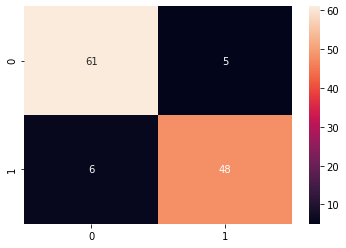

In [46]:
sns.heatmap(cm,annot=True)

## SKLEARN for Logistic Regression

In [47]:
scaled_X_df

const  GRE Score  TOEFL Score  University Rating       SOP       LOR  \
0      1.0   1.762107     1.746971           0.798829  1.093864  1.167321   
1      1.0   0.627656    -0.067635           0.798829  0.596653  1.167321   
2      1.0  -0.070467    -0.562528          -0.076600 -0.397769  0.052933   
3      1.0   0.453126     0.427257          -0.076600  0.099442 -1.061454   
4      1.0  -0.244998    -0.727492          -0.952029 -1.392191 -0.504260   
..     ...        ...          ...                ...       ...       ...   
395    1.0   0.627656     0.427257          -0.076600  0.099442  0.052933   
396    1.0   0.714922    -0.067635          -0.076600 -0.397769  0.052933   
397    1.0   1.151249     1.417042           0.798829  1.591075  1.167321   
398    1.0  -0.419528    -0.727492          -0.076600  0.099442  0.610127   
399    1.0   1.413045     1.582006           0.798829  1.591075  0.610127   

         CGPA  Research  
0    1.764818  0.909112  
1    0.455151  0.909112  
2   -1.005631  0.909112  
3    0.119339  0.909112  
4   -0.653029 -1.099975  
..        ...       ...  
395  0.740592  0.909112  
396  0.858126  0.909112  
397  1.429006  0.909112  
398  0.304036 -1.099975  
399  1.781609  0.909112  

[400 rows x 8 columns]

In [48]:
scaled_X_df.drop(['const'],axis=1,inplace=True)

In [49]:
scaled_X_df

GRE Score  TOEFL Score  University Rating       SOP       LOR      CGPA  \
0     1.762107     1.746971           0.798829  1.093864  1.167321  1.764818   
1     0.627656    -0.067635           0.798829  0.596653  1.167321  0.455151   
2    -0.070467    -0.562528          -0.076600 -0.397769  0.052933 -1.005631   
3     0.453126     0.427257          -0.076600  0.099442 -1.061454  0.119339   
4    -0.244998    -0.727492          -0.952029 -1.392191 -0.504260 -0.653029   
..         ...          ...                ...       ...       ...       ...   
395   0.627656     0.427257          -0.076600  0.099442  0.052933  0.740592   
396   0.714922    -0.067635          -0.076600 -0.397769  0.052933  0.858126   
397   1.151249     1.417042           0.798829  1.591075  1.167321  1.429006   
398  -0.419528    -0.727492          -0.076600  0.099442  0.610127  0.304036   
399   1.413045     1.582006           0.798829  1.591075  0.610127  1.781609   

     Research  
0    0.909112  
1    0.909112  
2    0.909112  
3    0.909112  
4   -1.099975  
..        ...  
395  0.909112  
396  0.909112  
397  0.909112  
398 -1.099975  
399  0.909112  

[400 rows x 7 columns]

In [50]:
from sklearn.linear_model import LogisticRegression

In [51]:
lg = LogisticRegression()

In [ ]:
X_train,X_test,y_train,y_test = train_test_split(X,y,test_size=0.3,random_state=1)

In [53]:
lgf = lg.fit(X_train,y_train)

In [55]:
# It will give direct values, no need to calculate threshold

y_pred = lg.predict(X_test)
y_pred

array([0, 0, 1, 1, 1, 0, 0, 0, 0, 1, 1, 1, 1, 0, 0, 0, 1, 1, 0, 0, 0, 1,
       1, 1, 0, 0, 0, 0, 1, 0, 1, 0, 1, 1, 0, 0, 0, 0, 1, 1, 1, 0, 1, 0,
       1, 0, 0, 1, 0, 0, 1, 0, 1, 1, 0, 1, 0, 0, 1, 1, 1, 0, 1, 0, 0, 1,
       1, 0, 0, 1, 1, 0, 0, 0, 1, 0, 0, 0, 0, 0, 0, 1, 0, 0, 0, 0, 0, 1,
       0, 0, 0, 0, 1, 1, 0, 0, 0, 1, 1, 1, 1, 0, 0, 0, 1, 1, 1, 0, 1, 0,
       1, 0, 1, 0, 0, 0, 0, 1, 0, 1], dtype=int64)

In [57]:
# Plot confusion matrix

from sklearn.metrics import plot_confusion_matrix

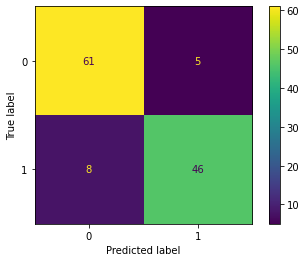

In [59]:
plot_confusion_matrix(lg,X_test,y_test)

In [62]:
# We can get probability using this.

lg.predict_proba(X_train)

array([[9.77800614e-01, 2.21993862e-02],
       [9.60402814e-01, 3.95971864e-02],
       [9.66372142e-01, 3.36278584e-02],
       [6.37985608e-01, 3.62014392e-01],
       [2.16282012e-01, 7.83717988e-01],
       [9.77312549e-01, 2.26874514e-02],
       [2.18512781e-03, 9.97814872e-01],
       [4.05999540e-02, 9.59400046e-01],
       [7.03577753e-01, 2.96422247e-01],
       [3.77699486e-03, 9.96223005e-01],
       [5.66872473e-01, 4.33127527e-01],
       [9.54621799e-01, 4.53782009e-02],
       [9.74472857e-01, 2.55271427e-02],
       [2.02738541e-02, 9.79726146e-01],
       [9.93908727e-01, 6.09127320e-03],
       [9.20053779e-01, 7.99462207e-02],
       [8.45127460e-01, 1.54872540e-01],
       [4.48056309e-01, 5.51943691e-01],
       [9.10426856e-01, 8.95731435e-02],
       [9.99252605e-01, 7.47395404e-04],
       [9.02877241e-01, 9.71227595e-02],
       [7.88267868e-01, 2.11732132e-01],
       [9.01317268e-01, 9.86827315e-02],
       [9.07901353e-02, 9.09209865e-01],
       [2.197121

In [64]:
(5/14) * 0.97

0.3464285714285714

## D Tree

In [2]:
df1 = pd.read_csv('Admission_Predict.csv')
df1.head()

Serial No.  GRE Score  TOEFL Score  University Rating  SOP  LOR  CGPA  \
0           1        337          118                  4  4.5  4.5  9.65   
1           2        324          107                  4  4.0  4.5  8.87   
2           3        316          104                  3  3.0  3.5  8.00   
3           4        322          110                  3  3.5  2.5  8.67   
4           5        314          103                  2  2.0  3.0  8.21   

   Research  Chance of Admit  
0         1                1  
1         1                1  
2         1                0  
3         1                1  
4         0                0

In [3]:
df1.shape

(400, 9)

In [4]:
X = df1.drop(['Serial No.','Chance of Admit'],axis=1)
y = df1['Chance of Admit']

In [5]:
from sklearn.model_selection import train_test_split

In [6]:
X_train,X_test,y_train,y_test = train_test_split(X,y,test_size=0.3,random_state=1)

In [7]:
# Library
from sklearn.tree import DecisionTreeClassifier

In [8]:
dc = DecisionTreeClassifier(criterion='gini')

In [9]:
dc.fit(X_train,y_train)

DecisionTreeClassifier()

In [10]:
conda install -c conda-forge python-graphviz 


Note: you may need to restart the kernel to use updated packages.


usage: conda-script.py [-h] [-V] command ...
conda-script.py: error: unrecognized arguments: python-graphviz


In [11]:
# Exporting my tree to graphviz, so i can visualize my data
from sklearn.tree import export_graphviz

In [12]:
dot_tree = export_graphviz(dc,feature_names= X.columns,class_names= ['No','Yes'])

In [13]:
import pydotplus

In [14]:
from IPython.display import Image

In [15]:
graph = pydotplus.graph_from_dot_data(dot_tree)

In [16]:
import graphviz

In [17]:
Image(graph.create_png())

InvocationException: GraphViz's executables not found

In [21]:
from sklearn.tree import plot_tree

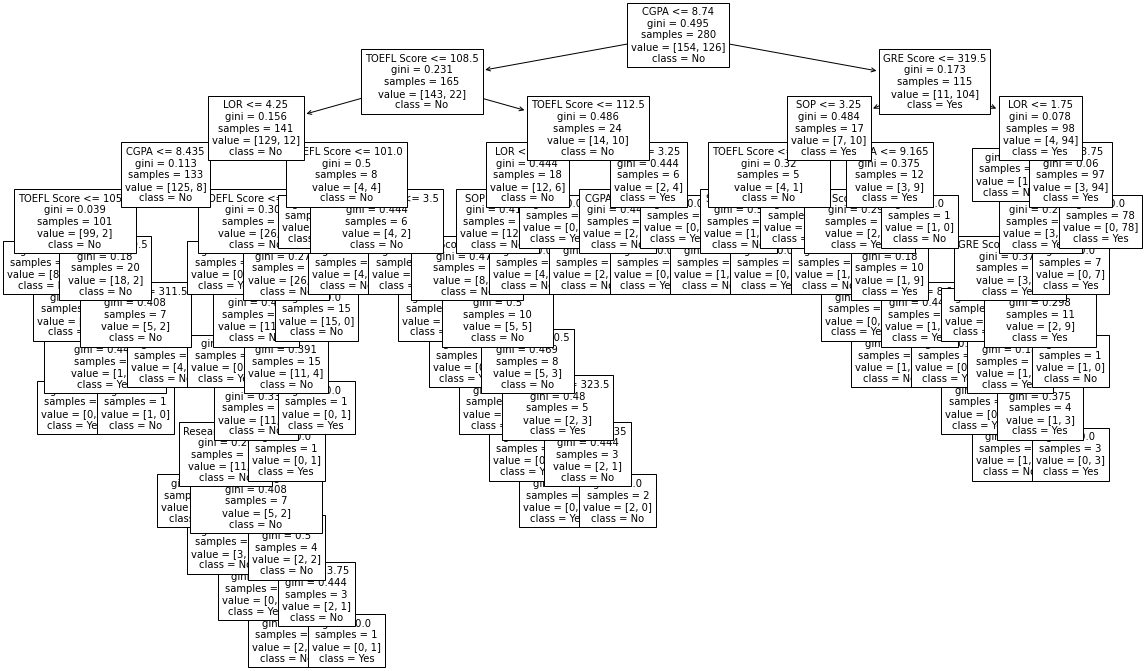

In [26]:
plt.figure(figsize=(20,12))
plot_tree(dc,feature_names= X.columns,class_names= ['No','Yes'],fontsize=10);

In [27]:
from sklearn.model_selection import GridSearchCV

In [28]:
dc = DecisionTreeClassifier()

In [32]:
tuned_parameters = [{'criterion':['entropy','gini'],
                    'max_depth':range(2,10),
                    'max_features':['sqrt','log2'],
                    'min_samples_split':range(2,10),
                    'min_samples_leaf':range(1,5),
                    'max_leaf_nodes':range(1,10)}]

In [33]:
tree_grid = GridSearchCV(estimator=dc,param_grid=tuned_parameters,cv=5)

In [35]:
tree_grid_model = tree_grid.fit(X_train,y_train)

C:\Users\MY HP\anaconda3\lib\site-packages\sklearn\model_selection\_validation.py:615: FitFailedWarning: Estimator fit failed. The score on this train-test partition for these parameters will be set to nan. Details: 
Traceback (most recent call last):
  File "C:\Users\MY HP\anaconda3\lib\site-packages\sklearn\model_selection\_validation.py", line 598, in _fit_and_score
    estimator.fit(X_train, y_train, **fit_params)
  File "C:\Users\MY HP\anaconda3\lib\site-packages\sklearn\tree\_classes.py", line 903, in fit
    super().fit(
  File "C:\Users\MY HP\anaconda3\lib\site-packages\sklearn\tree\_classes.py", line 294, in fit
    raise ValueError(("max_leaf_nodes {0} must be either None "
ValueError: max_leaf_nodes 1 must be either None or larger than 1

  warnings.warn("Estimator fit failed. The score on this train-test"
C:\Users\MY HP\anaconda3\lib\site-packages\sklearn\model_selection\_validation.py:615: FitFailedWarning: Estimator fit failed. The score on this train-test partition for t

C:\Users\MY HP\anaconda3\lib\site-packages\sklearn\model_selection\_validation.py:615: FitFailedWarning: Estimator fit failed. The score on this train-test partition for these parameters will be set to nan. Details: 
Traceback (most recent call last):
  File "C:\Users\MY HP\anaconda3\lib\site-packages\sklearn\model_selection\_validation.py", line 598, in _fit_and_score
    estimator.fit(X_train, y_train, **fit_params)
  File "C:\Users\MY HP\anaconda3\lib\site-packages\sklearn\tree\_classes.py", line 903, in fit
    super().fit(
  File "C:\Users\MY HP\anaconda3\lib\site-packages\sklearn\tree\_classes.py", line 294, in fit
    raise ValueError(("max_leaf_nodes {0} must be either None "
ValueError: max_leaf_nodes 1 must be either None or larger than 1

  warnings.warn("Estimator fit failed. The score on this train-test"
C:\Users\MY HP\anaconda3\lib\site-packages\sklearn\model_selection\_validation.py:615: FitFailedWarning: Estimator fit failed. The score on this train-test partition for t

C:\Users\MY HP\anaconda3\lib\site-packages\sklearn\model_selection\_validation.py:615: FitFailedWarning: Estimator fit failed. The score on this train-test partition for these parameters will be set to nan. Details: 
Traceback (most recent call last):
  File "C:\Users\MY HP\anaconda3\lib\site-packages\sklearn\model_selection\_validation.py", line 598, in _fit_and_score
    estimator.fit(X_train, y_train, **fit_params)
  File "C:\Users\MY HP\anaconda3\lib\site-packages\sklearn\tree\_classes.py", line 903, in fit
    super().fit(
  File "C:\Users\MY HP\anaconda3\lib\site-packages\sklearn\tree\_classes.py", line 294, in fit
    raise ValueError(("max_leaf_nodes {0} must be either None "
ValueError: max_leaf_nodes 1 must be either None or larger than 1

  warnings.warn("Estimator fit failed. The score on this train-test"
C:\Users\MY HP\anaconda3\lib\site-packages\sklearn\model_selection\_validation.py:615: FitFailedWarning: Estimator fit failed. The score on this train-test partition for t

C:\Users\MY HP\anaconda3\lib\site-packages\sklearn\model_selection\_validation.py:615: FitFailedWarning: Estimator fit failed. The score on this train-test partition for these parameters will be set to nan. Details: 
Traceback (most recent call last):
  File "C:\Users\MY HP\anaconda3\lib\site-packages\sklearn\model_selection\_validation.py", line 598, in _fit_and_score
    estimator.fit(X_train, y_train, **fit_params)
  File "C:\Users\MY HP\anaconda3\lib\site-packages\sklearn\tree\_classes.py", line 903, in fit
    super().fit(
  File "C:\Users\MY HP\anaconda3\lib\site-packages\sklearn\tree\_classes.py", line 294, in fit
    raise ValueError(("max_leaf_nodes {0} must be either None "
ValueError: max_leaf_nodes 1 must be either None or larger than 1

  warnings.warn("Estimator fit failed. The score on this train-test"
C:\Users\MY HP\anaconda3\lib\site-packages\sklearn\model_selection\_validation.py:615: FitFailedWarning: Estimator fit failed. The score on this train-test partition for t

C:\Users\MY HP\anaconda3\lib\site-packages\sklearn\model_selection\_validation.py:615: FitFailedWarning: Estimator fit failed. The score on this train-test partition for these parameters will be set to nan. Details: 
Traceback (most recent call last):
  File "C:\Users\MY HP\anaconda3\lib\site-packages\sklearn\model_selection\_validation.py", line 598, in _fit_and_score
    estimator.fit(X_train, y_train, **fit_params)
  File "C:\Users\MY HP\anaconda3\lib\site-packages\sklearn\tree\_classes.py", line 903, in fit
    super().fit(
  File "C:\Users\MY HP\anaconda3\lib\site-packages\sklearn\tree\_classes.py", line 294, in fit
    raise ValueError(("max_leaf_nodes {0} must be either None "
ValueError: max_leaf_nodes 1 must be either None or larger than 1

  warnings.warn("Estimator fit failed. The score on this train-test"
C:\Users\MY HP\anaconda3\lib\site-packages\sklearn\model_selection\_validation.py:615: FitFailedWarning: Estimator fit failed. The score on this train-test partition for t

C:\Users\MY HP\anaconda3\lib\site-packages\sklearn\model_selection\_validation.py:615: FitFailedWarning: Estimator fit failed. The score on this train-test partition for these parameters will be set to nan. Details: 
Traceback (most recent call last):
  File "C:\Users\MY HP\anaconda3\lib\site-packages\sklearn\model_selection\_validation.py", line 598, in _fit_and_score
    estimator.fit(X_train, y_train, **fit_params)
  File "C:\Users\MY HP\anaconda3\lib\site-packages\sklearn\tree\_classes.py", line 903, in fit
    super().fit(
  File "C:\Users\MY HP\anaconda3\lib\site-packages\sklearn\tree\_classes.py", line 294, in fit
    raise ValueError(("max_leaf_nodes {0} must be either None "
ValueError: max_leaf_nodes 1 must be either None or larger than 1

  warnings.warn("Estimator fit failed. The score on this train-test"
C:\Users\MY HP\anaconda3\lib\site-packages\sklearn\model_selection\_validation.py:615: FitFailedWarning: Estimator fit failed. The score on this train-test partition for t

C:\Users\MY HP\anaconda3\lib\site-packages\sklearn\model_selection\_validation.py:615: FitFailedWarning: Estimator fit failed. The score on this train-test partition for these parameters will be set to nan. Details: 
Traceback (most recent call last):
  File "C:\Users\MY HP\anaconda3\lib\site-packages\sklearn\model_selection\_validation.py", line 598, in _fit_and_score
    estimator.fit(X_train, y_train, **fit_params)
  File "C:\Users\MY HP\anaconda3\lib\site-packages\sklearn\tree\_classes.py", line 903, in fit
    super().fit(
  File "C:\Users\MY HP\anaconda3\lib\site-packages\sklearn\tree\_classes.py", line 294, in fit
    raise ValueError(("max_leaf_nodes {0} must be either None "
ValueError: max_leaf_nodes 1 must be either None or larger than 1

  warnings.warn("Estimator fit failed. The score on this train-test"
C:\Users\MY HP\anaconda3\lib\site-packages\sklearn\model_selection\_validation.py:615: FitFailedWarning: Estimator fit failed. The score on this train-test partition for t

C:\Users\MY HP\anaconda3\lib\site-packages\sklearn\model_selection\_validation.py:615: FitFailedWarning: Estimator fit failed. The score on this train-test partition for these parameters will be set to nan. Details: 
Traceback (most recent call last):
  File "C:\Users\MY HP\anaconda3\lib\site-packages\sklearn\model_selection\_validation.py", line 598, in _fit_and_score
    estimator.fit(X_train, y_train, **fit_params)
  File "C:\Users\MY HP\anaconda3\lib\site-packages\sklearn\tree\_classes.py", line 903, in fit
    super().fit(
  File "C:\Users\MY HP\anaconda3\lib\site-packages\sklearn\tree\_classes.py", line 294, in fit
    raise ValueError(("max_leaf_nodes {0} must be either None "
ValueError: max_leaf_nodes 1 must be either None or larger than 1

  warnings.warn("Estimator fit failed. The score on this train-test"
C:\Users\MY HP\anaconda3\lib\site-packages\sklearn\model_selection\_validation.py:615: FitFailedWarning: Estimator fit failed. The score on this train-test partition for t

C:\Users\MY HP\anaconda3\lib\site-packages\sklearn\model_selection\_validation.py:615: FitFailedWarning: Estimator fit failed. The score on this train-test partition for these parameters will be set to nan. Details: 
Traceback (most recent call last):
  File "C:\Users\MY HP\anaconda3\lib\site-packages\sklearn\model_selection\_validation.py", line 598, in _fit_and_score
    estimator.fit(X_train, y_train, **fit_params)
  File "C:\Users\MY HP\anaconda3\lib\site-packages\sklearn\tree\_classes.py", line 903, in fit
    super().fit(
  File "C:\Users\MY HP\anaconda3\lib\site-packages\sklearn\tree\_classes.py", line 294, in fit
    raise ValueError(("max_leaf_nodes {0} must be either None "
ValueError: max_leaf_nodes 1 must be either None or larger than 1

  warnings.warn("Estimator fit failed. The score on this train-test"
C:\Users\MY HP\anaconda3\lib\site-packages\sklearn\model_selection\_validation.py:615: FitFailedWarning: Estimator fit failed. The score on this train-test partition for t

C:\Users\MY HP\anaconda3\lib\site-packages\sklearn\model_selection\_validation.py:615: FitFailedWarning: Estimator fit failed. The score on this train-test partition for these parameters will be set to nan. Details: 
Traceback (most recent call last):
  File "C:\Users\MY HP\anaconda3\lib\site-packages\sklearn\model_selection\_validation.py", line 598, in _fit_and_score
    estimator.fit(X_train, y_train, **fit_params)
  File "C:\Users\MY HP\anaconda3\lib\site-packages\sklearn\tree\_classes.py", line 903, in fit
    super().fit(
  File "C:\Users\MY HP\anaconda3\lib\site-packages\sklearn\tree\_classes.py", line 294, in fit
    raise ValueError(("max_leaf_nodes {0} must be either None "
ValueError: max_leaf_nodes 1 must be either None or larger than 1

  warnings.warn("Estimator fit failed. The score on this train-test"
C:\Users\MY HP\anaconda3\lib\site-packages\sklearn\model_selection\_validation.py:615: FitFailedWarning: Estimator fit failed. The score on this train-test partition for t

C:\Users\MY HP\anaconda3\lib\site-packages\sklearn\model_selection\_validation.py:615: FitFailedWarning: Estimator fit failed. The score on this train-test partition for these parameters will be set to nan. Details: 
Traceback (most recent call last):
  File "C:\Users\MY HP\anaconda3\lib\site-packages\sklearn\model_selection\_validation.py", line 598, in _fit_and_score
    estimator.fit(X_train, y_train, **fit_params)
  File "C:\Users\MY HP\anaconda3\lib\site-packages\sklearn\tree\_classes.py", line 903, in fit
    super().fit(
  File "C:\Users\MY HP\anaconda3\lib\site-packages\sklearn\tree\_classes.py", line 294, in fit
    raise ValueError(("max_leaf_nodes {0} must be either None "
ValueError: max_leaf_nodes 1 must be either None or larger than 1

  warnings.warn("Estimator fit failed. The score on this train-test"
C:\Users\MY HP\anaconda3\lib\site-packages\sklearn\model_selection\_validation.py:615: FitFailedWarning: Estimator fit failed. The score on this train-test partition for t

C:\Users\MY HP\anaconda3\lib\site-packages\sklearn\model_selection\_validation.py:615: FitFailedWarning: Estimator fit failed. The score on this train-test partition for these parameters will be set to nan. Details: 
Traceback (most recent call last):
  File "C:\Users\MY HP\anaconda3\lib\site-packages\sklearn\model_selection\_validation.py", line 598, in _fit_and_score
    estimator.fit(X_train, y_train, **fit_params)
  File "C:\Users\MY HP\anaconda3\lib\site-packages\sklearn\tree\_classes.py", line 903, in fit
    super().fit(
  File "C:\Users\MY HP\anaconda3\lib\site-packages\sklearn\tree\_classes.py", line 294, in fit
    raise ValueError(("max_leaf_nodes {0} must be either None "
ValueError: max_leaf_nodes 1 must be either None or larger than 1

  warnings.warn("Estimator fit failed. The score on this train-test"
C:\Users\MY HP\anaconda3\lib\site-packages\sklearn\model_selection\_validation.py:615: FitFailedWarning: Estimator fit failed. The score on this train-test partition for t

C:\Users\MY HP\anaconda3\lib\site-packages\sklearn\model_selection\_validation.py:615: FitFailedWarning: Estimator fit failed. The score on this train-test partition for these parameters will be set to nan. Details: 
Traceback (most recent call last):
  File "C:\Users\MY HP\anaconda3\lib\site-packages\sklearn\model_selection\_validation.py", line 598, in _fit_and_score
    estimator.fit(X_train, y_train, **fit_params)
  File "C:\Users\MY HP\anaconda3\lib\site-packages\sklearn\tree\_classes.py", line 903, in fit
    super().fit(
  File "C:\Users\MY HP\anaconda3\lib\site-packages\sklearn\tree\_classes.py", line 294, in fit
    raise ValueError(("max_leaf_nodes {0} must be either None "
ValueError: max_leaf_nodes 1 must be either None or larger than 1

  warnings.warn("Estimator fit failed. The score on this train-test"
C:\Users\MY HP\anaconda3\lib\site-packages\sklearn\model_selection\_validation.py:615: FitFailedWarning: Estimator fit failed. The score on this train-test partition for t

C:\Users\MY HP\anaconda3\lib\site-packages\sklearn\model_selection\_validation.py:615: FitFailedWarning: Estimator fit failed. The score on this train-test partition for these parameters will be set to nan. Details: 
Traceback (most recent call last):
  File "C:\Users\MY HP\anaconda3\lib\site-packages\sklearn\model_selection\_validation.py", line 598, in _fit_and_score
    estimator.fit(X_train, y_train, **fit_params)
  File "C:\Users\MY HP\anaconda3\lib\site-packages\sklearn\tree\_classes.py", line 903, in fit
    super().fit(
  File "C:\Users\MY HP\anaconda3\lib\site-packages\sklearn\tree\_classes.py", line 294, in fit
    raise ValueError(("max_leaf_nodes {0} must be either None "
ValueError: max_leaf_nodes 1 must be either None or larger than 1

  warnings.warn("Estimator fit failed. The score on this train-test"
C:\Users\MY HP\anaconda3\lib\site-packages\sklearn\model_selection\_validation.py:615: FitFailedWarning: Estimator fit failed. The score on this train-test partition for t

C:\Users\MY HP\anaconda3\lib\site-packages\sklearn\model_selection\_validation.py:615: FitFailedWarning: Estimator fit failed. The score on this train-test partition for these parameters will be set to nan. Details: 
Traceback (most recent call last):
  File "C:\Users\MY HP\anaconda3\lib\site-packages\sklearn\model_selection\_validation.py", line 598, in _fit_and_score
    estimator.fit(X_train, y_train, **fit_params)
  File "C:\Users\MY HP\anaconda3\lib\site-packages\sklearn\tree\_classes.py", line 903, in fit
    super().fit(
  File "C:\Users\MY HP\anaconda3\lib\site-packages\sklearn\tree\_classes.py", line 294, in fit
    raise ValueError(("max_leaf_nodes {0} must be either None "
ValueError: max_leaf_nodes 1 must be either None or larger than 1

  warnings.warn("Estimator fit failed. The score on this train-test"
C:\Users\MY HP\anaconda3\lib\site-packages\sklearn\model_selection\_validation.py:615: FitFailedWarning: Estimator fit failed. The score on this train-test partition for t

C:\Users\MY HP\anaconda3\lib\site-packages\sklearn\model_selection\_validation.py:615: FitFailedWarning: Estimator fit failed. The score on this train-test partition for these parameters will be set to nan. Details: 
Traceback (most recent call last):
  File "C:\Users\MY HP\anaconda3\lib\site-packages\sklearn\model_selection\_validation.py", line 598, in _fit_and_score
    estimator.fit(X_train, y_train, **fit_params)
  File "C:\Users\MY HP\anaconda3\lib\site-packages\sklearn\tree\_classes.py", line 903, in fit
    super().fit(
  File "C:\Users\MY HP\anaconda3\lib\site-packages\sklearn\tree\_classes.py", line 294, in fit
    raise ValueError(("max_leaf_nodes {0} must be either None "
ValueError: max_leaf_nodes 1 must be either None or larger than 1

  warnings.warn("Estimator fit failed. The score on this train-test"
C:\Users\MY HP\anaconda3\lib\site-packages\sklearn\model_selection\_validation.py:615: FitFailedWarning: Estimator fit failed. The score on this train-test partition for t

C:\Users\MY HP\anaconda3\lib\site-packages\sklearn\model_selection\_validation.py:615: FitFailedWarning: Estimator fit failed. The score on this train-test partition for these parameters will be set to nan. Details: 
Traceback (most recent call last):
  File "C:\Users\MY HP\anaconda3\lib\site-packages\sklearn\model_selection\_validation.py", line 598, in _fit_and_score
    estimator.fit(X_train, y_train, **fit_params)
  File "C:\Users\MY HP\anaconda3\lib\site-packages\sklearn\tree\_classes.py", line 903, in fit
    super().fit(
  File "C:\Users\MY HP\anaconda3\lib\site-packages\sklearn\tree\_classes.py", line 294, in fit
    raise ValueError(("max_leaf_nodes {0} must be either None "
ValueError: max_leaf_nodes 1 must be either None or larger than 1

  warnings.warn("Estimator fit failed. The score on this train-test"
C:\Users\MY HP\anaconda3\lib\site-packages\sklearn\model_selection\_validation.py:615: FitFailedWarning: Estimator fit failed. The score on this train-test partition for t

C:\Users\MY HP\anaconda3\lib\site-packages\sklearn\model_selection\_validation.py:615: FitFailedWarning: Estimator fit failed. The score on this train-test partition for these parameters will be set to nan. Details: 
Traceback (most recent call last):
  File "C:\Users\MY HP\anaconda3\lib\site-packages\sklearn\model_selection\_validation.py", line 598, in _fit_and_score
    estimator.fit(X_train, y_train, **fit_params)
  File "C:\Users\MY HP\anaconda3\lib\site-packages\sklearn\tree\_classes.py", line 903, in fit
    super().fit(
  File "C:\Users\MY HP\anaconda3\lib\site-packages\sklearn\tree\_classes.py", line 294, in fit
    raise ValueError(("max_leaf_nodes {0} must be either None "
ValueError: max_leaf_nodes 1 must be either None or larger than 1

  warnings.warn("Estimator fit failed. The score on this train-test"
C:\Users\MY HP\anaconda3\lib\site-packages\sklearn\model_selection\_validation.py:615: FitFailedWarning: Estimator fit failed. The score on this train-test partition for t

C:\Users\MY HP\anaconda3\lib\site-packages\sklearn\model_selection\_validation.py:615: FitFailedWarning: Estimator fit failed. The score on this train-test partition for these parameters will be set to nan. Details: 
Traceback (most recent call last):
  File "C:\Users\MY HP\anaconda3\lib\site-packages\sklearn\model_selection\_validation.py", line 598, in _fit_and_score
    estimator.fit(X_train, y_train, **fit_params)
  File "C:\Users\MY HP\anaconda3\lib\site-packages\sklearn\tree\_classes.py", line 903, in fit
    super().fit(
  File "C:\Users\MY HP\anaconda3\lib\site-packages\sklearn\tree\_classes.py", line 294, in fit
    raise ValueError(("max_leaf_nodes {0} must be either None "
ValueError: max_leaf_nodes 1 must be either None or larger than 1

  warnings.warn("Estimator fit failed. The score on this train-test"
C:\Users\MY HP\anaconda3\lib\site-packages\sklearn\model_selection\_validation.py:615: FitFailedWarning: Estimator fit failed. The score on this train-test partition for t

C:\Users\MY HP\anaconda3\lib\site-packages\sklearn\model_selection\_validation.py:615: FitFailedWarning: Estimator fit failed. The score on this train-test partition for these parameters will be set to nan. Details: 
Traceback (most recent call last):
  File "C:\Users\MY HP\anaconda3\lib\site-packages\sklearn\model_selection\_validation.py", line 598, in _fit_and_score
    estimator.fit(X_train, y_train, **fit_params)
  File "C:\Users\MY HP\anaconda3\lib\site-packages\sklearn\tree\_classes.py", line 903, in fit
    super().fit(
  File "C:\Users\MY HP\anaconda3\lib\site-packages\sklearn\tree\_classes.py", line 294, in fit
    raise ValueError(("max_leaf_nodes {0} must be either None "
ValueError: max_leaf_nodes 1 must be either None or larger than 1

  warnings.warn("Estimator fit failed. The score on this train-test"
C:\Users\MY HP\anaconda3\lib\site-packages\sklearn\model_selection\_validation.py:615: FitFailedWarning: Estimator fit failed. The score on this train-test partition for t

C:\Users\MY HP\anaconda3\lib\site-packages\sklearn\model_selection\_validation.py:615: FitFailedWarning: Estimator fit failed. The score on this train-test partition for these parameters will be set to nan. Details: 
Traceback (most recent call last):
  File "C:\Users\MY HP\anaconda3\lib\site-packages\sklearn\model_selection\_validation.py", line 598, in _fit_and_score
    estimator.fit(X_train, y_train, **fit_params)
  File "C:\Users\MY HP\anaconda3\lib\site-packages\sklearn\tree\_classes.py", line 903, in fit
    super().fit(
  File "C:\Users\MY HP\anaconda3\lib\site-packages\sklearn\tree\_classes.py", line 294, in fit
    raise ValueError(("max_leaf_nodes {0} must be either None "
ValueError: max_leaf_nodes 1 must be either None or larger than 1

  warnings.warn("Estimator fit failed. The score on this train-test"
C:\Users\MY HP\anaconda3\lib\site-packages\sklearn\model_selection\_validation.py:615: FitFailedWarning: Estimator fit failed. The score on this train-test partition for t

C:\Users\MY HP\anaconda3\lib\site-packages\sklearn\model_selection\_validation.py:615: FitFailedWarning: Estimator fit failed. The score on this train-test partition for these parameters will be set to nan. Details: 
Traceback (most recent call last):
  File "C:\Users\MY HP\anaconda3\lib\site-packages\sklearn\model_selection\_validation.py", line 598, in _fit_and_score
    estimator.fit(X_train, y_train, **fit_params)
  File "C:\Users\MY HP\anaconda3\lib\site-packages\sklearn\tree\_classes.py", line 903, in fit
    super().fit(
  File "C:\Users\MY HP\anaconda3\lib\site-packages\sklearn\tree\_classes.py", line 294, in fit
    raise ValueError(("max_leaf_nodes {0} must be either None "
ValueError: max_leaf_nodes 1 must be either None or larger than 1

  warnings.warn("Estimator fit failed. The score on this train-test"
C:\Users\MY HP\anaconda3\lib\site-packages\sklearn\model_selection\_validation.py:615: FitFailedWarning: Estimator fit failed. The score on this train-test partition for t

C:\Users\MY HP\anaconda3\lib\site-packages\sklearn\model_selection\_validation.py:615: FitFailedWarning: Estimator fit failed. The score on this train-test partition for these parameters will be set to nan. Details: 
Traceback (most recent call last):
  File "C:\Users\MY HP\anaconda3\lib\site-packages\sklearn\model_selection\_validation.py", line 598, in _fit_and_score
    estimator.fit(X_train, y_train, **fit_params)
  File "C:\Users\MY HP\anaconda3\lib\site-packages\sklearn\tree\_classes.py", line 903, in fit
    super().fit(
  File "C:\Users\MY HP\anaconda3\lib\site-packages\sklearn\tree\_classes.py", line 294, in fit
    raise ValueError(("max_leaf_nodes {0} must be either None "
ValueError: max_leaf_nodes 1 must be either None or larger than 1

  warnings.warn("Estimator fit failed. The score on this train-test"
C:\Users\MY HP\anaconda3\lib\site-packages\sklearn\model_selection\_validation.py:615: FitFailedWarning: Estimator fit failed. The score on this train-test partition for t

C:\Users\MY HP\anaconda3\lib\site-packages\sklearn\model_selection\_validation.py:615: FitFailedWarning: Estimator fit failed. The score on this train-test partition for these parameters will be set to nan. Details: 
Traceback (most recent call last):
  File "C:\Users\MY HP\anaconda3\lib\site-packages\sklearn\model_selection\_validation.py", line 598, in _fit_and_score
    estimator.fit(X_train, y_train, **fit_params)
  File "C:\Users\MY HP\anaconda3\lib\site-packages\sklearn\tree\_classes.py", line 903, in fit
    super().fit(
  File "C:\Users\MY HP\anaconda3\lib\site-packages\sklearn\tree\_classes.py", line 294, in fit
    raise ValueError(("max_leaf_nodes {0} must be either None "
ValueError: max_leaf_nodes 1 must be either None or larger than 1

  warnings.warn("Estimator fit failed. The score on this train-test"
C:\Users\MY HP\anaconda3\lib\site-packages\sklearn\model_selection\_validation.py:615: FitFailedWarning: Estimator fit failed. The score on this train-test partition for t

C:\Users\MY HP\anaconda3\lib\site-packages\sklearn\model_selection\_validation.py:615: FitFailedWarning: Estimator fit failed. The score on this train-test partition for these parameters will be set to nan. Details: 
Traceback (most recent call last):
  File "C:\Users\MY HP\anaconda3\lib\site-packages\sklearn\model_selection\_validation.py", line 598, in _fit_and_score
    estimator.fit(X_train, y_train, **fit_params)
  File "C:\Users\MY HP\anaconda3\lib\site-packages\sklearn\tree\_classes.py", line 903, in fit
    super().fit(
  File "C:\Users\MY HP\anaconda3\lib\site-packages\sklearn\tree\_classes.py", line 294, in fit
    raise ValueError(("max_leaf_nodes {0} must be either None "
ValueError: max_leaf_nodes 1 must be either None or larger than 1

  warnings.warn("Estimator fit failed. The score on this train-test"
C:\Users\MY HP\anaconda3\lib\site-packages\sklearn\model_selection\_validation.py:615: FitFailedWarning: Estimator fit failed. The score on this train-test partition for t

C:\Users\MY HP\anaconda3\lib\site-packages\sklearn\model_selection\_validation.py:615: FitFailedWarning: Estimator fit failed. The score on this train-test partition for these parameters will be set to nan. Details: 
Traceback (most recent call last):
  File "C:\Users\MY HP\anaconda3\lib\site-packages\sklearn\model_selection\_validation.py", line 598, in _fit_and_score
    estimator.fit(X_train, y_train, **fit_params)
  File "C:\Users\MY HP\anaconda3\lib\site-packages\sklearn\tree\_classes.py", line 903, in fit
    super().fit(
  File "C:\Users\MY HP\anaconda3\lib\site-packages\sklearn\tree\_classes.py", line 294, in fit
    raise ValueError(("max_leaf_nodes {0} must be either None "
ValueError: max_leaf_nodes 1 must be either None or larger than 1

  warnings.warn("Estimator fit failed. The score on this train-test"
C:\Users\MY HP\anaconda3\lib\site-packages\sklearn\model_selection\_validation.py:615: FitFailedWarning: Estimator fit failed. The score on this train-test partition for t

C:\Users\MY HP\anaconda3\lib\site-packages\sklearn\model_selection\_validation.py:615: FitFailedWarning: Estimator fit failed. The score on this train-test partition for these parameters will be set to nan. Details: 
Traceback (most recent call last):
  File "C:\Users\MY HP\anaconda3\lib\site-packages\sklearn\model_selection\_validation.py", line 598, in _fit_and_score
    estimator.fit(X_train, y_train, **fit_params)
  File "C:\Users\MY HP\anaconda3\lib\site-packages\sklearn\tree\_classes.py", line 903, in fit
    super().fit(
  File "C:\Users\MY HP\anaconda3\lib\site-packages\sklearn\tree\_classes.py", line 294, in fit
    raise ValueError(("max_leaf_nodes {0} must be either None "
ValueError: max_leaf_nodes 1 must be either None or larger than 1

  warnings.warn("Estimator fit failed. The score on this train-test"
C:\Users\MY HP\anaconda3\lib\site-packages\sklearn\model_selection\_validation.py:615: FitFailedWarning: Estimator fit failed. The score on this train-test partition for t

C:\Users\MY HP\anaconda3\lib\site-packages\sklearn\model_selection\_validation.py:615: FitFailedWarning: Estimator fit failed. The score on this train-test partition for these parameters will be set to nan. Details: 
Traceback (most recent call last):
  File "C:\Users\MY HP\anaconda3\lib\site-packages\sklearn\model_selection\_validation.py", line 598, in _fit_and_score
    estimator.fit(X_train, y_train, **fit_params)
  File "C:\Users\MY HP\anaconda3\lib\site-packages\sklearn\tree\_classes.py", line 903, in fit
    super().fit(
  File "C:\Users\MY HP\anaconda3\lib\site-packages\sklearn\tree\_classes.py", line 294, in fit
    raise ValueError(("max_leaf_nodes {0} must be either None "
ValueError: max_leaf_nodes 1 must be either None or larger than 1

  warnings.warn("Estimator fit failed. The score on this train-test"
C:\Users\MY HP\anaconda3\lib\site-packages\sklearn\model_selection\_validation.py:615: FitFailedWarning: Estimator fit failed. The score on this train-test partition for t

C:\Users\MY HP\anaconda3\lib\site-packages\sklearn\model_selection\_validation.py:615: FitFailedWarning: Estimator fit failed. The score on this train-test partition for these parameters will be set to nan. Details: 
Traceback (most recent call last):
  File "C:\Users\MY HP\anaconda3\lib\site-packages\sklearn\model_selection\_validation.py", line 598, in _fit_and_score
    estimator.fit(X_train, y_train, **fit_params)
  File "C:\Users\MY HP\anaconda3\lib\site-packages\sklearn\tree\_classes.py", line 903, in fit
    super().fit(
  File "C:\Users\MY HP\anaconda3\lib\site-packages\sklearn\tree\_classes.py", line 294, in fit
    raise ValueError(("max_leaf_nodes {0} must be either None "
ValueError: max_leaf_nodes 1 must be either None or larger than 1

  warnings.warn("Estimator fit failed. The score on this train-test"
C:\Users\MY HP\anaconda3\lib\site-packages\sklearn\model_selection\_validation.py:615: FitFailedWarning: Estimator fit failed. The score on this train-test partition for t

C:\Users\MY HP\anaconda3\lib\site-packages\sklearn\model_selection\_validation.py:615: FitFailedWarning: Estimator fit failed. The score on this train-test partition for these parameters will be set to nan. Details: 
Traceback (most recent call last):
  File "C:\Users\MY HP\anaconda3\lib\site-packages\sklearn\model_selection\_validation.py", line 598, in _fit_and_score
    estimator.fit(X_train, y_train, **fit_params)
  File "C:\Users\MY HP\anaconda3\lib\site-packages\sklearn\tree\_classes.py", line 903, in fit
    super().fit(
  File "C:\Users\MY HP\anaconda3\lib\site-packages\sklearn\tree\_classes.py", line 294, in fit
    raise ValueError(("max_leaf_nodes {0} must be either None "
ValueError: max_leaf_nodes 1 must be either None or larger than 1

  warnings.warn("Estimator fit failed. The score on this train-test"
C:\Users\MY HP\anaconda3\lib\site-packages\sklearn\model_selection\_validation.py:615: FitFailedWarning: Estimator fit failed. The score on this train-test partition for t

C:\Users\MY HP\anaconda3\lib\site-packages\sklearn\model_selection\_validation.py:615: FitFailedWarning: Estimator fit failed. The score on this train-test partition for these parameters will be set to nan. Details: 
Traceback (most recent call last):
  File "C:\Users\MY HP\anaconda3\lib\site-packages\sklearn\model_selection\_validation.py", line 598, in _fit_and_score
    estimator.fit(X_train, y_train, **fit_params)
  File "C:\Users\MY HP\anaconda3\lib\site-packages\sklearn\tree\_classes.py", line 903, in fit
    super().fit(
  File "C:\Users\MY HP\anaconda3\lib\site-packages\sklearn\tree\_classes.py", line 294, in fit
    raise ValueError(("max_leaf_nodes {0} must be either None "
ValueError: max_leaf_nodes 1 must be either None or larger than 1

  warnings.warn("Estimator fit failed. The score on this train-test"
C:\Users\MY HP\anaconda3\lib\site-packages\sklearn\model_selection\_validation.py:615: FitFailedWarning: Estimator fit failed. The score on this train-test partition for t

C:\Users\MY HP\anaconda3\lib\site-packages\sklearn\model_selection\_validation.py:615: FitFailedWarning: Estimator fit failed. The score on this train-test partition for these parameters will be set to nan. Details: 
Traceback (most recent call last):
  File "C:\Users\MY HP\anaconda3\lib\site-packages\sklearn\model_selection\_validation.py", line 598, in _fit_and_score
    estimator.fit(X_train, y_train, **fit_params)
  File "C:\Users\MY HP\anaconda3\lib\site-packages\sklearn\tree\_classes.py", line 903, in fit
    super().fit(
  File "C:\Users\MY HP\anaconda3\lib\site-packages\sklearn\tree\_classes.py", line 294, in fit
    raise ValueError(("max_leaf_nodes {0} must be either None "
ValueError: max_leaf_nodes 1 must be either None or larger than 1

  warnings.warn("Estimator fit failed. The score on this train-test"
C:\Users\MY HP\anaconda3\lib\site-packages\sklearn\model_selection\_validation.py:615: FitFailedWarning: Estimator fit failed. The score on this train-test partition for t

C:\Users\MY HP\anaconda3\lib\site-packages\sklearn\model_selection\_validation.py:615: FitFailedWarning: Estimator fit failed. The score on this train-test partition for these parameters will be set to nan. Details: 
Traceback (most recent call last):
  File "C:\Users\MY HP\anaconda3\lib\site-packages\sklearn\model_selection\_validation.py", line 598, in _fit_and_score
    estimator.fit(X_train, y_train, **fit_params)
  File "C:\Users\MY HP\anaconda3\lib\site-packages\sklearn\tree\_classes.py", line 903, in fit
    super().fit(
  File "C:\Users\MY HP\anaconda3\lib\site-packages\sklearn\tree\_classes.py", line 294, in fit
    raise ValueError(("max_leaf_nodes {0} must be either None "
ValueError: max_leaf_nodes 1 must be either None or larger than 1

  warnings.warn("Estimator fit failed. The score on this train-test"
C:\Users\MY HP\anaconda3\lib\site-packages\sklearn\model_selection\_validation.py:615: FitFailedWarning: Estimator fit failed. The score on this train-test partition for t

C:\Users\MY HP\anaconda3\lib\site-packages\sklearn\model_selection\_validation.py:615: FitFailedWarning: Estimator fit failed. The score on this train-test partition for these parameters will be set to nan. Details: 
Traceback (most recent call last):
  File "C:\Users\MY HP\anaconda3\lib\site-packages\sklearn\model_selection\_validation.py", line 598, in _fit_and_score
    estimator.fit(X_train, y_train, **fit_params)
  File "C:\Users\MY HP\anaconda3\lib\site-packages\sklearn\tree\_classes.py", line 903, in fit
    super().fit(
  File "C:\Users\MY HP\anaconda3\lib\site-packages\sklearn\tree\_classes.py", line 294, in fit
    raise ValueError(("max_leaf_nodes {0} must be either None "
ValueError: max_leaf_nodes 1 must be either None or larger than 1

  warnings.warn("Estimator fit failed. The score on this train-test"
C:\Users\MY HP\anaconda3\lib\site-packages\sklearn\model_selection\_validation.py:615: FitFailedWarning: Estimator fit failed. The score on this train-test partition for t

C:\Users\MY HP\anaconda3\lib\site-packages\sklearn\model_selection\_validation.py:615: FitFailedWarning: Estimator fit failed. The score on this train-test partition for these parameters will be set to nan. Details: 
Traceback (most recent call last):
  File "C:\Users\MY HP\anaconda3\lib\site-packages\sklearn\model_selection\_validation.py", line 598, in _fit_and_score
    estimator.fit(X_train, y_train, **fit_params)
  File "C:\Users\MY HP\anaconda3\lib\site-packages\sklearn\tree\_classes.py", line 903, in fit
    super().fit(
  File "C:\Users\MY HP\anaconda3\lib\site-packages\sklearn\tree\_classes.py", line 294, in fit
    raise ValueError(("max_leaf_nodes {0} must be either None "
ValueError: max_leaf_nodes 1 must be either None or larger than 1

  warnings.warn("Estimator fit failed. The score on this train-test"
C:\Users\MY HP\anaconda3\lib\site-packages\sklearn\model_selection\_validation.py:615: FitFailedWarning: Estimator fit failed. The score on this train-test partition for t

C:\Users\MY HP\anaconda3\lib\site-packages\sklearn\model_selection\_validation.py:615: FitFailedWarning: Estimator fit failed. The score on this train-test partition for these parameters will be set to nan. Details: 
Traceback (most recent call last):
  File "C:\Users\MY HP\anaconda3\lib\site-packages\sklearn\model_selection\_validation.py", line 598, in _fit_and_score
    estimator.fit(X_train, y_train, **fit_params)
  File "C:\Users\MY HP\anaconda3\lib\site-packages\sklearn\tree\_classes.py", line 903, in fit
    super().fit(
  File "C:\Users\MY HP\anaconda3\lib\site-packages\sklearn\tree\_classes.py", line 294, in fit
    raise ValueError(("max_leaf_nodes {0} must be either None "
ValueError: max_leaf_nodes 1 must be either None or larger than 1

  warnings.warn("Estimator fit failed. The score on this train-test"
C:\Users\MY HP\anaconda3\lib\site-packages\sklearn\model_selection\_validation.py:615: FitFailedWarning: Estimator fit failed. The score on this train-test partition for t

C:\Users\MY HP\anaconda3\lib\site-packages\sklearn\model_selection\_validation.py:615: FitFailedWarning: Estimator fit failed. The score on this train-test partition for these parameters will be set to nan. Details: 
Traceback (most recent call last):
  File "C:\Users\MY HP\anaconda3\lib\site-packages\sklearn\model_selection\_validation.py", line 598, in _fit_and_score
    estimator.fit(X_train, y_train, **fit_params)
  File "C:\Users\MY HP\anaconda3\lib\site-packages\sklearn\tree\_classes.py", line 903, in fit
    super().fit(
  File "C:\Users\MY HP\anaconda3\lib\site-packages\sklearn\tree\_classes.py", line 294, in fit
    raise ValueError(("max_leaf_nodes {0} must be either None "
ValueError: max_leaf_nodes 1 must be either None or larger than 1

  warnings.warn("Estimator fit failed. The score on this train-test"
C:\Users\MY HP\anaconda3\lib\site-packages\sklearn\model_selection\_validation.py:615: FitFailedWarning: Estimator fit failed. The score on this train-test partition for t

C:\Users\MY HP\anaconda3\lib\site-packages\sklearn\model_selection\_validation.py:615: FitFailedWarning: Estimator fit failed. The score on this train-test partition for these parameters will be set to nan. Details: 
Traceback (most recent call last):
  File "C:\Users\MY HP\anaconda3\lib\site-packages\sklearn\model_selection\_validation.py", line 598, in _fit_and_score
    estimator.fit(X_train, y_train, **fit_params)
  File "C:\Users\MY HP\anaconda3\lib\site-packages\sklearn\tree\_classes.py", line 903, in fit
    super().fit(
  File "C:\Users\MY HP\anaconda3\lib\site-packages\sklearn\tree\_classes.py", line 294, in fit
    raise ValueError(("max_leaf_nodes {0} must be either None "
ValueError: max_leaf_nodes 1 must be either None or larger than 1

  warnings.warn("Estimator fit failed. The score on this train-test"
C:\Users\MY HP\anaconda3\lib\site-packages\sklearn\model_selection\_validation.py:615: FitFailedWarning: Estimator fit failed. The score on this train-test partition for t

C:\Users\MY HP\anaconda3\lib\site-packages\sklearn\model_selection\_validation.py:615: FitFailedWarning: Estimator fit failed. The score on this train-test partition for these parameters will be set to nan. Details: 
Traceback (most recent call last):
  File "C:\Users\MY HP\anaconda3\lib\site-packages\sklearn\model_selection\_validation.py", line 598, in _fit_and_score
    estimator.fit(X_train, y_train, **fit_params)
  File "C:\Users\MY HP\anaconda3\lib\site-packages\sklearn\tree\_classes.py", line 903, in fit
    super().fit(
  File "C:\Users\MY HP\anaconda3\lib\site-packages\sklearn\tree\_classes.py", line 294, in fit
    raise ValueError(("max_leaf_nodes {0} must be either None "
ValueError: max_leaf_nodes 1 must be either None or larger than 1

  warnings.warn("Estimator fit failed. The score on this train-test"
C:\Users\MY HP\anaconda3\lib\site-packages\sklearn\model_selection\_validation.py:615: FitFailedWarning: Estimator fit failed. The score on this train-test partition for t

C:\Users\MY HP\anaconda3\lib\site-packages\sklearn\model_selection\_validation.py:615: FitFailedWarning: Estimator fit failed. The score on this train-test partition for these parameters will be set to nan. Details: 
Traceback (most recent call last):
  File "C:\Users\MY HP\anaconda3\lib\site-packages\sklearn\model_selection\_validation.py", line 598, in _fit_and_score
    estimator.fit(X_train, y_train, **fit_params)
  File "C:\Users\MY HP\anaconda3\lib\site-packages\sklearn\tree\_classes.py", line 903, in fit
    super().fit(
  File "C:\Users\MY HP\anaconda3\lib\site-packages\sklearn\tree\_classes.py", line 294, in fit
    raise ValueError(("max_leaf_nodes {0} must be either None "
ValueError: max_leaf_nodes 1 must be either None or larger than 1

  warnings.warn("Estimator fit failed. The score on this train-test"
C:\Users\MY HP\anaconda3\lib\site-packages\sklearn\model_selection\_validation.py:615: FitFailedWarning: Estimator fit failed. The score on this train-test partition for t

C:\Users\MY HP\anaconda3\lib\site-packages\sklearn\model_selection\_validation.py:615: FitFailedWarning: Estimator fit failed. The score on this train-test partition for these parameters will be set to nan. Details: 
Traceback (most recent call last):
  File "C:\Users\MY HP\anaconda3\lib\site-packages\sklearn\model_selection\_validation.py", line 598, in _fit_and_score
    estimator.fit(X_train, y_train, **fit_params)
  File "C:\Users\MY HP\anaconda3\lib\site-packages\sklearn\tree\_classes.py", line 903, in fit
    super().fit(
  File "C:\Users\MY HP\anaconda3\lib\site-packages\sklearn\tree\_classes.py", line 294, in fit
    raise ValueError(("max_leaf_nodes {0} must be either None "
ValueError: max_leaf_nodes 1 must be either None or larger than 1

  warnings.warn("Estimator fit failed. The score on this train-test"
C:\Users\MY HP\anaconda3\lib\site-packages\sklearn\model_selection\_validation.py:615: FitFailedWarning: Estimator fit failed. The score on this train-test partition for t

C:\Users\MY HP\anaconda3\lib\site-packages\sklearn\model_selection\_validation.py:615: FitFailedWarning: Estimator fit failed. The score on this train-test partition for these parameters will be set to nan. Details: 
Traceback (most recent call last):
  File "C:\Users\MY HP\anaconda3\lib\site-packages\sklearn\model_selection\_validation.py", line 598, in _fit_and_score
    estimator.fit(X_train, y_train, **fit_params)
  File "C:\Users\MY HP\anaconda3\lib\site-packages\sklearn\tree\_classes.py", line 903, in fit
    super().fit(
  File "C:\Users\MY HP\anaconda3\lib\site-packages\sklearn\tree\_classes.py", line 294, in fit
    raise ValueError(("max_leaf_nodes {0} must be either None "
ValueError: max_leaf_nodes 1 must be either None or larger than 1

  warnings.warn("Estimator fit failed. The score on this train-test"
C:\Users\MY HP\anaconda3\lib\site-packages\sklearn\model_selection\_validation.py:615: FitFailedWarning: Estimator fit failed. The score on this train-test partition for t

C:\Users\MY HP\anaconda3\lib\site-packages\sklearn\model_selection\_validation.py:615: FitFailedWarning: Estimator fit failed. The score on this train-test partition for these parameters will be set to nan. Details: 
Traceback (most recent call last):
  File "C:\Users\MY HP\anaconda3\lib\site-packages\sklearn\model_selection\_validation.py", line 598, in _fit_and_score
    estimator.fit(X_train, y_train, **fit_params)
  File "C:\Users\MY HP\anaconda3\lib\site-packages\sklearn\tree\_classes.py", line 903, in fit
    super().fit(
  File "C:\Users\MY HP\anaconda3\lib\site-packages\sklearn\tree\_classes.py", line 294, in fit
    raise ValueError(("max_leaf_nodes {0} must be either None "
ValueError: max_leaf_nodes 1 must be either None or larger than 1

  warnings.warn("Estimator fit failed. The score on this train-test"
C:\Users\MY HP\anaconda3\lib\site-packages\sklearn\model_selection\_validation.py:615: FitFailedWarning: Estimator fit failed. The score on this train-test partition for t

C:\Users\MY HP\anaconda3\lib\site-packages\sklearn\model_selection\_validation.py:615: FitFailedWarning: Estimator fit failed. The score on this train-test partition for these parameters will be set to nan. Details: 
Traceback (most recent call last):
  File "C:\Users\MY HP\anaconda3\lib\site-packages\sklearn\model_selection\_validation.py", line 598, in _fit_and_score
    estimator.fit(X_train, y_train, **fit_params)
  File "C:\Users\MY HP\anaconda3\lib\site-packages\sklearn\tree\_classes.py", line 903, in fit
    super().fit(
  File "C:\Users\MY HP\anaconda3\lib\site-packages\sklearn\tree\_classes.py", line 294, in fit
    raise ValueError(("max_leaf_nodes {0} must be either None "
ValueError: max_leaf_nodes 1 must be either None or larger than 1

  warnings.warn("Estimator fit failed. The score on this train-test"
C:\Users\MY HP\anaconda3\lib\site-packages\sklearn\model_selection\_validation.py:615: FitFailedWarning: Estimator fit failed. The score on this train-test partition for t

C:\Users\MY HP\anaconda3\lib\site-packages\sklearn\model_selection\_validation.py:615: FitFailedWarning: Estimator fit failed. The score on this train-test partition for these parameters will be set to nan. Details: 
Traceback (most recent call last):
  File "C:\Users\MY HP\anaconda3\lib\site-packages\sklearn\model_selection\_validation.py", line 598, in _fit_and_score
    estimator.fit(X_train, y_train, **fit_params)
  File "C:\Users\MY HP\anaconda3\lib\site-packages\sklearn\tree\_classes.py", line 903, in fit
    super().fit(
  File "C:\Users\MY HP\anaconda3\lib\site-packages\sklearn\tree\_classes.py", line 294, in fit
    raise ValueError(("max_leaf_nodes {0} must be either None "
ValueError: max_leaf_nodes 1 must be either None or larger than 1

  warnings.warn("Estimator fit failed. The score on this train-test"
C:\Users\MY HP\anaconda3\lib\site-packages\sklearn\model_selection\_validation.py:615: FitFailedWarning: Estimator fit failed. The score on this train-test partition for t

C:\Users\MY HP\anaconda3\lib\site-packages\sklearn\model_selection\_validation.py:615: FitFailedWarning: Estimator fit failed. The score on this train-test partition for these parameters will be set to nan. Details: 
Traceback (most recent call last):
  File "C:\Users\MY HP\anaconda3\lib\site-packages\sklearn\model_selection\_validation.py", line 598, in _fit_and_score
    estimator.fit(X_train, y_train, **fit_params)
  File "C:\Users\MY HP\anaconda3\lib\site-packages\sklearn\tree\_classes.py", line 903, in fit
    super().fit(
  File "C:\Users\MY HP\anaconda3\lib\site-packages\sklearn\tree\_classes.py", line 294, in fit
    raise ValueError(("max_leaf_nodes {0} must be either None "
ValueError: max_leaf_nodes 1 must be either None or larger than 1

  warnings.warn("Estimator fit failed. The score on this train-test"
C:\Users\MY HP\anaconda3\lib\site-packages\sklearn\model_selection\_validation.py:615: FitFailedWarning: Estimator fit failed. The score on this train-test partition for t

C:\Users\MY HP\anaconda3\lib\site-packages\sklearn\model_selection\_validation.py:615: FitFailedWarning: Estimator fit failed. The score on this train-test partition for these parameters will be set to nan. Details: 
Traceback (most recent call last):
  File "C:\Users\MY HP\anaconda3\lib\site-packages\sklearn\model_selection\_validation.py", line 598, in _fit_and_score
    estimator.fit(X_train, y_train, **fit_params)
  File "C:\Users\MY HP\anaconda3\lib\site-packages\sklearn\tree\_classes.py", line 903, in fit
    super().fit(
  File "C:\Users\MY HP\anaconda3\lib\site-packages\sklearn\tree\_classes.py", line 294, in fit
    raise ValueError(("max_leaf_nodes {0} must be either None "
ValueError: max_leaf_nodes 1 must be either None or larger than 1

  warnings.warn("Estimator fit failed. The score on this train-test"
C:\Users\MY HP\anaconda3\lib\site-packages\sklearn\model_selection\_validation.py:615: FitFailedWarning: Estimator fit failed. The score on this train-test partition for t

C:\Users\MY HP\anaconda3\lib\site-packages\sklearn\model_selection\_validation.py:615: FitFailedWarning: Estimator fit failed. The score on this train-test partition for these parameters will be set to nan. Details: 
Traceback (most recent call last):
  File "C:\Users\MY HP\anaconda3\lib\site-packages\sklearn\model_selection\_validation.py", line 598, in _fit_and_score
    estimator.fit(X_train, y_train, **fit_params)
  File "C:\Users\MY HP\anaconda3\lib\site-packages\sklearn\tree\_classes.py", line 903, in fit
    super().fit(
  File "C:\Users\MY HP\anaconda3\lib\site-packages\sklearn\tree\_classes.py", line 294, in fit
    raise ValueError(("max_leaf_nodes {0} must be either None "
ValueError: max_leaf_nodes 1 must be either None or larger than 1

  warnings.warn("Estimator fit failed. The score on this train-test"
C:\Users\MY HP\anaconda3\lib\site-packages\sklearn\model_selection\_validation.py:615: FitFailedWarning: Estimator fit failed. The score on this train-test partition for t

C:\Users\MY HP\anaconda3\lib\site-packages\sklearn\model_selection\_validation.py:615: FitFailedWarning: Estimator fit failed. The score on this train-test partition for these parameters will be set to nan. Details: 
Traceback (most recent call last):
  File "C:\Users\MY HP\anaconda3\lib\site-packages\sklearn\model_selection\_validation.py", line 598, in _fit_and_score
    estimator.fit(X_train, y_train, **fit_params)
  File "C:\Users\MY HP\anaconda3\lib\site-packages\sklearn\tree\_classes.py", line 903, in fit
    super().fit(
  File "C:\Users\MY HP\anaconda3\lib\site-packages\sklearn\tree\_classes.py", line 294, in fit
    raise ValueError(("max_leaf_nodes {0} must be either None "
ValueError: max_leaf_nodes 1 must be either None or larger than 1

  warnings.warn("Estimator fit failed. The score on this train-test"
C:\Users\MY HP\anaconda3\lib\site-packages\sklearn\model_selection\_validation.py:615: FitFailedWarning: Estimator fit failed. The score on this train-test partition for t

C:\Users\MY HP\anaconda3\lib\site-packages\sklearn\model_selection\_validation.py:615: FitFailedWarning: Estimator fit failed. The score on this train-test partition for these parameters will be set to nan. Details: 
Traceback (most recent call last):
  File "C:\Users\MY HP\anaconda3\lib\site-packages\sklearn\model_selection\_validation.py", line 598, in _fit_and_score
    estimator.fit(X_train, y_train, **fit_params)
  File "C:\Users\MY HP\anaconda3\lib\site-packages\sklearn\tree\_classes.py", line 903, in fit
    super().fit(
  File "C:\Users\MY HP\anaconda3\lib\site-packages\sklearn\tree\_classes.py", line 294, in fit
    raise ValueError(("max_leaf_nodes {0} must be either None "
ValueError: max_leaf_nodes 1 must be either None or larger than 1

  warnings.warn("Estimator fit failed. The score on this train-test"
C:\Users\MY HP\anaconda3\lib\site-packages\sklearn\model_selection\_validation.py:615: FitFailedWarning: Estimator fit failed. The score on this train-test partition for t

C:\Users\MY HP\anaconda3\lib\site-packages\sklearn\model_selection\_validation.py:615: FitFailedWarning: Estimator fit failed. The score on this train-test partition for these parameters will be set to nan. Details: 
Traceback (most recent call last):
  File "C:\Users\MY HP\anaconda3\lib\site-packages\sklearn\model_selection\_validation.py", line 598, in _fit_and_score
    estimator.fit(X_train, y_train, **fit_params)
  File "C:\Users\MY HP\anaconda3\lib\site-packages\sklearn\tree\_classes.py", line 903, in fit
    super().fit(
  File "C:\Users\MY HP\anaconda3\lib\site-packages\sklearn\tree\_classes.py", line 294, in fit
    raise ValueError(("max_leaf_nodes {0} must be either None "
ValueError: max_leaf_nodes 1 must be either None or larger than 1

  warnings.warn("Estimator fit failed. The score on this train-test"
C:\Users\MY HP\anaconda3\lib\site-packages\sklearn\model_selection\_validation.py:615: FitFailedWarning: Estimator fit failed. The score on this train-test partition for t

C:\Users\MY HP\anaconda3\lib\site-packages\sklearn\model_selection\_validation.py:615: FitFailedWarning: Estimator fit failed. The score on this train-test partition for these parameters will be set to nan. Details: 
Traceback (most recent call last):
  File "C:\Users\MY HP\anaconda3\lib\site-packages\sklearn\model_selection\_validation.py", line 598, in _fit_and_score
    estimator.fit(X_train, y_train, **fit_params)
  File "C:\Users\MY HP\anaconda3\lib\site-packages\sklearn\tree\_classes.py", line 903, in fit
    super().fit(
  File "C:\Users\MY HP\anaconda3\lib\site-packages\sklearn\tree\_classes.py", line 294, in fit
    raise ValueError(("max_leaf_nodes {0} must be either None "
ValueError: max_leaf_nodes 1 must be either None or larger than 1

  warnings.warn("Estimator fit failed. The score on this train-test"
C:\Users\MY HP\anaconda3\lib\site-packages\sklearn\model_selection\_validation.py:615: FitFailedWarning: Estimator fit failed. The score on this train-test partition for t

C:\Users\MY HP\anaconda3\lib\site-packages\sklearn\model_selection\_validation.py:615: FitFailedWarning: Estimator fit failed. The score on this train-test partition for these parameters will be set to nan. Details: 
Traceback (most recent call last):
  File "C:\Users\MY HP\anaconda3\lib\site-packages\sklearn\model_selection\_validation.py", line 598, in _fit_and_score
    estimator.fit(X_train, y_train, **fit_params)
  File "C:\Users\MY HP\anaconda3\lib\site-packages\sklearn\tree\_classes.py", line 903, in fit
    super().fit(
  File "C:\Users\MY HP\anaconda3\lib\site-packages\sklearn\tree\_classes.py", line 294, in fit
    raise ValueError(("max_leaf_nodes {0} must be either None "
ValueError: max_leaf_nodes 1 must be either None or larger than 1

  warnings.warn("Estimator fit failed. The score on this train-test"
C:\Users\MY HP\anaconda3\lib\site-packages\sklearn\model_selection\_validation.py:615: FitFailedWarning: Estimator fit failed. The score on this train-test partition for t

C:\Users\MY HP\anaconda3\lib\site-packages\sklearn\model_selection\_validation.py:615: FitFailedWarning: Estimator fit failed. The score on this train-test partition for these parameters will be set to nan. Details: 
Traceback (most recent call last):
  File "C:\Users\MY HP\anaconda3\lib\site-packages\sklearn\model_selection\_validation.py", line 598, in _fit_and_score
    estimator.fit(X_train, y_train, **fit_params)
  File "C:\Users\MY HP\anaconda3\lib\site-packages\sklearn\tree\_classes.py", line 903, in fit
    super().fit(
  File "C:\Users\MY HP\anaconda3\lib\site-packages\sklearn\tree\_classes.py", line 294, in fit
    raise ValueError(("max_leaf_nodes {0} must be either None "
ValueError: max_leaf_nodes 1 must be either None or larger than 1

  warnings.warn("Estimator fit failed. The score on this train-test"
C:\Users\MY HP\anaconda3\lib\site-packages\sklearn\model_selection\_validation.py:615: FitFailedWarning: Estimator fit failed. The score on this train-test partition for t

C:\Users\MY HP\anaconda3\lib\site-packages\sklearn\model_selection\_validation.py:615: FitFailedWarning: Estimator fit failed. The score on this train-test partition for these parameters will be set to nan. Details: 
Traceback (most recent call last):
  File "C:\Users\MY HP\anaconda3\lib\site-packages\sklearn\model_selection\_validation.py", line 598, in _fit_and_score
    estimator.fit(X_train, y_train, **fit_params)
  File "C:\Users\MY HP\anaconda3\lib\site-packages\sklearn\tree\_classes.py", line 903, in fit
    super().fit(
  File "C:\Users\MY HP\anaconda3\lib\site-packages\sklearn\tree\_classes.py", line 294, in fit
    raise ValueError(("max_leaf_nodes {0} must be either None "
ValueError: max_leaf_nodes 1 must be either None or larger than 1

  warnings.warn("Estimator fit failed. The score on this train-test"
C:\Users\MY HP\anaconda3\lib\site-packages\sklearn\model_selection\_validation.py:615: FitFailedWarning: Estimator fit failed. The score on this train-test partition for t

C:\Users\MY HP\anaconda3\lib\site-packages\sklearn\model_selection\_validation.py:615: FitFailedWarning: Estimator fit failed. The score on this train-test partition for these parameters will be set to nan. Details: 
Traceback (most recent call last):
  File "C:\Users\MY HP\anaconda3\lib\site-packages\sklearn\model_selection\_validation.py", line 598, in _fit_and_score
    estimator.fit(X_train, y_train, **fit_params)
  File "C:\Users\MY HP\anaconda3\lib\site-packages\sklearn\tree\_classes.py", line 903, in fit
    super().fit(
  File "C:\Users\MY HP\anaconda3\lib\site-packages\sklearn\tree\_classes.py", line 294, in fit
    raise ValueError(("max_leaf_nodes {0} must be either None "
ValueError: max_leaf_nodes 1 must be either None or larger than 1

  warnings.warn("Estimator fit failed. The score on this train-test"
C:\Users\MY HP\anaconda3\lib\site-packages\sklearn\model_selection\_validation.py:615: FitFailedWarning: Estimator fit failed. The score on this train-test partition for t

C:\Users\MY HP\anaconda3\lib\site-packages\sklearn\model_selection\_validation.py:615: FitFailedWarning: Estimator fit failed. The score on this train-test partition for these parameters will be set to nan. Details: 
Traceback (most recent call last):
  File "C:\Users\MY HP\anaconda3\lib\site-packages\sklearn\model_selection\_validation.py", line 598, in _fit_and_score
    estimator.fit(X_train, y_train, **fit_params)
  File "C:\Users\MY HP\anaconda3\lib\site-packages\sklearn\tree\_classes.py", line 903, in fit
    super().fit(
  File "C:\Users\MY HP\anaconda3\lib\site-packages\sklearn\tree\_classes.py", line 294, in fit
    raise ValueError(("max_leaf_nodes {0} must be either None "
ValueError: max_leaf_nodes 1 must be either None or larger than 1

  warnings.warn("Estimator fit failed. The score on this train-test"
C:\Users\MY HP\anaconda3\lib\site-packages\sklearn\model_selection\_validation.py:615: FitFailedWarning: Estimator fit failed. The score on this train-test partition for t

C:\Users\MY HP\anaconda3\lib\site-packages\sklearn\model_selection\_validation.py:615: FitFailedWarning: Estimator fit failed. The score on this train-test partition for these parameters will be set to nan. Details: 
Traceback (most recent call last):
  File "C:\Users\MY HP\anaconda3\lib\site-packages\sklearn\model_selection\_validation.py", line 598, in _fit_and_score
    estimator.fit(X_train, y_train, **fit_params)
  File "C:\Users\MY HP\anaconda3\lib\site-packages\sklearn\tree\_classes.py", line 903, in fit
    super().fit(
  File "C:\Users\MY HP\anaconda3\lib\site-packages\sklearn\tree\_classes.py", line 294, in fit
    raise ValueError(("max_leaf_nodes {0} must be either None "
ValueError: max_leaf_nodes 1 must be either None or larger than 1

  warnings.warn("Estimator fit failed. The score on this train-test"
C:\Users\MY HP\anaconda3\lib\site-packages\sklearn\model_selection\_validation.py:615: FitFailedWarning: Estimator fit failed. The score on this train-test partition for t

C:\Users\MY HP\anaconda3\lib\site-packages\sklearn\model_selection\_validation.py:615: FitFailedWarning: Estimator fit failed. The score on this train-test partition for these parameters will be set to nan. Details: 
Traceback (most recent call last):
  File "C:\Users\MY HP\anaconda3\lib\site-packages\sklearn\model_selection\_validation.py", line 598, in _fit_and_score
    estimator.fit(X_train, y_train, **fit_params)
  File "C:\Users\MY HP\anaconda3\lib\site-packages\sklearn\tree\_classes.py", line 903, in fit
    super().fit(
  File "C:\Users\MY HP\anaconda3\lib\site-packages\sklearn\tree\_classes.py", line 294, in fit
    raise ValueError(("max_leaf_nodes {0} must be either None "
ValueError: max_leaf_nodes 1 must be either None or larger than 1

  warnings.warn("Estimator fit failed. The score on this train-test"
C:\Users\MY HP\anaconda3\lib\site-packages\sklearn\model_selection\_validation.py:615: FitFailedWarning: Estimator fit failed. The score on this train-test partition for t

C:\Users\MY HP\anaconda3\lib\site-packages\sklearn\model_selection\_validation.py:615: FitFailedWarning: Estimator fit failed. The score on this train-test partition for these parameters will be set to nan. Details: 
Traceback (most recent call last):
  File "C:\Users\MY HP\anaconda3\lib\site-packages\sklearn\model_selection\_validation.py", line 598, in _fit_and_score
    estimator.fit(X_train, y_train, **fit_params)
  File "C:\Users\MY HP\anaconda3\lib\site-packages\sklearn\tree\_classes.py", line 903, in fit
    super().fit(
  File "C:\Users\MY HP\anaconda3\lib\site-packages\sklearn\tree\_classes.py", line 294, in fit
    raise ValueError(("max_leaf_nodes {0} must be either None "
ValueError: max_leaf_nodes 1 must be either None or larger than 1

  warnings.warn("Estimator fit failed. The score on this train-test"
C:\Users\MY HP\anaconda3\lib\site-packages\sklearn\model_selection\_validation.py:615: FitFailedWarning: Estimator fit failed. The score on this train-test partition for t

C:\Users\MY HP\anaconda3\lib\site-packages\sklearn\model_selection\_validation.py:615: FitFailedWarning: Estimator fit failed. The score on this train-test partition for these parameters will be set to nan. Details: 
Traceback (most recent call last):
  File "C:\Users\MY HP\anaconda3\lib\site-packages\sklearn\model_selection\_validation.py", line 598, in _fit_and_score
    estimator.fit(X_train, y_train, **fit_params)
  File "C:\Users\MY HP\anaconda3\lib\site-packages\sklearn\tree\_classes.py", line 903, in fit
    super().fit(
  File "C:\Users\MY HP\anaconda3\lib\site-packages\sklearn\tree\_classes.py", line 294, in fit
    raise ValueError(("max_leaf_nodes {0} must be either None "
ValueError: max_leaf_nodes 1 must be either None or larger than 1

  warnings.warn("Estimator fit failed. The score on this train-test"
C:\Users\MY HP\anaconda3\lib\site-packages\sklearn\model_selection\_validation.py:615: FitFailedWarning: Estimator fit failed. The score on this train-test partition for t

C:\Users\MY HP\anaconda3\lib\site-packages\sklearn\model_selection\_validation.py:615: FitFailedWarning: Estimator fit failed. The score on this train-test partition for these parameters will be set to nan. Details: 
Traceback (most recent call last):
  File "C:\Users\MY HP\anaconda3\lib\site-packages\sklearn\model_selection\_validation.py", line 598, in _fit_and_score
    estimator.fit(X_train, y_train, **fit_params)
  File "C:\Users\MY HP\anaconda3\lib\site-packages\sklearn\tree\_classes.py", line 903, in fit
    super().fit(
  File "C:\Users\MY HP\anaconda3\lib\site-packages\sklearn\tree\_classes.py", line 294, in fit
    raise ValueError(("max_leaf_nodes {0} must be either None "
ValueError: max_leaf_nodes 1 must be either None or larger than 1

  warnings.warn("Estimator fit failed. The score on this train-test"
C:\Users\MY HP\anaconda3\lib\site-packages\sklearn\model_selection\_validation.py:615: FitFailedWarning: Estimator fit failed. The score on this train-test partition for t

C:\Users\MY HP\anaconda3\lib\site-packages\sklearn\model_selection\_validation.py:615: FitFailedWarning: Estimator fit failed. The score on this train-test partition for these parameters will be set to nan. Details: 
Traceback (most recent call last):
  File "C:\Users\MY HP\anaconda3\lib\site-packages\sklearn\model_selection\_validation.py", line 598, in _fit_and_score
    estimator.fit(X_train, y_train, **fit_params)
  File "C:\Users\MY HP\anaconda3\lib\site-packages\sklearn\tree\_classes.py", line 903, in fit
    super().fit(
  File "C:\Users\MY HP\anaconda3\lib\site-packages\sklearn\tree\_classes.py", line 294, in fit
    raise ValueError(("max_leaf_nodes {0} must be either None "
ValueError: max_leaf_nodes 1 must be either None or larger than 1

  warnings.warn("Estimator fit failed. The score on this train-test"
C:\Users\MY HP\anaconda3\lib\site-packages\sklearn\model_selection\_validation.py:615: FitFailedWarning: Estimator fit failed. The score on this train-test partition for t

C:\Users\MY HP\anaconda3\lib\site-packages\sklearn\model_selection\_validation.py:615: FitFailedWarning: Estimator fit failed. The score on this train-test partition for these parameters will be set to nan. Details: 
Traceback (most recent call last):
  File "C:\Users\MY HP\anaconda3\lib\site-packages\sklearn\model_selection\_validation.py", line 598, in _fit_and_score
    estimator.fit(X_train, y_train, **fit_params)
  File "C:\Users\MY HP\anaconda3\lib\site-packages\sklearn\tree\_classes.py", line 903, in fit
    super().fit(
  File "C:\Users\MY HP\anaconda3\lib\site-packages\sklearn\tree\_classes.py", line 294, in fit
    raise ValueError(("max_leaf_nodes {0} must be either None "
ValueError: max_leaf_nodes 1 must be either None or larger than 1

  warnings.warn("Estimator fit failed. The score on this train-test"
C:\Users\MY HP\anaconda3\lib\site-packages\sklearn\model_selection\_validation.py:615: FitFailedWarning: Estimator fit failed. The score on this train-test partition for t

C:\Users\MY HP\anaconda3\lib\site-packages\sklearn\model_selection\_validation.py:615: FitFailedWarning: Estimator fit failed. The score on this train-test partition for these parameters will be set to nan. Details: 
Traceback (most recent call last):
  File "C:\Users\MY HP\anaconda3\lib\site-packages\sklearn\model_selection\_validation.py", line 598, in _fit_and_score
    estimator.fit(X_train, y_train, **fit_params)
  File "C:\Users\MY HP\anaconda3\lib\site-packages\sklearn\tree\_classes.py", line 903, in fit
    super().fit(
  File "C:\Users\MY HP\anaconda3\lib\site-packages\sklearn\tree\_classes.py", line 294, in fit
    raise ValueError(("max_leaf_nodes {0} must be either None "
ValueError: max_leaf_nodes 1 must be either None or larger than 1

  warnings.warn("Estimator fit failed. The score on this train-test"
C:\Users\MY HP\anaconda3\lib\site-packages\sklearn\model_selection\_validation.py:615: FitFailedWarning: Estimator fit failed. The score on this train-test partition for t

C:\Users\MY HP\anaconda3\lib\site-packages\sklearn\model_selection\_validation.py:615: FitFailedWarning: Estimator fit failed. The score on this train-test partition for these parameters will be set to nan. Details: 
Traceback (most recent call last):
  File "C:\Users\MY HP\anaconda3\lib\site-packages\sklearn\model_selection\_validation.py", line 598, in _fit_and_score
    estimator.fit(X_train, y_train, **fit_params)
  File "C:\Users\MY HP\anaconda3\lib\site-packages\sklearn\tree\_classes.py", line 903, in fit
    super().fit(
  File "C:\Users\MY HP\anaconda3\lib\site-packages\sklearn\tree\_classes.py", line 294, in fit
    raise ValueError(("max_leaf_nodes {0} must be either None "
ValueError: max_leaf_nodes 1 must be either None or larger than 1

  warnings.warn("Estimator fit failed. The score on this train-test"
C:\Users\MY HP\anaconda3\lib\site-packages\sklearn\model_selection\_validation.py:615: FitFailedWarning: Estimator fit failed. The score on this train-test partition for t

C:\Users\MY HP\anaconda3\lib\site-packages\sklearn\model_selection\_validation.py:615: FitFailedWarning: Estimator fit failed. The score on this train-test partition for these parameters will be set to nan. Details: 
Traceback (most recent call last):
  File "C:\Users\MY HP\anaconda3\lib\site-packages\sklearn\model_selection\_validation.py", line 598, in _fit_and_score
    estimator.fit(X_train, y_train, **fit_params)
  File "C:\Users\MY HP\anaconda3\lib\site-packages\sklearn\tree\_classes.py", line 903, in fit
    super().fit(
  File "C:\Users\MY HP\anaconda3\lib\site-packages\sklearn\tree\_classes.py", line 294, in fit
    raise ValueError(("max_leaf_nodes {0} must be either None "
ValueError: max_leaf_nodes 1 must be either None or larger than 1

  warnings.warn("Estimator fit failed. The score on this train-test"
C:\Users\MY HP\anaconda3\lib\site-packages\sklearn\model_selection\_validation.py:615: FitFailedWarning: Estimator fit failed. The score on this train-test partition for t

C:\Users\MY HP\anaconda3\lib\site-packages\sklearn\model_selection\_validation.py:615: FitFailedWarning: Estimator fit failed. The score on this train-test partition for these parameters will be set to nan. Details: 
Traceback (most recent call last):
  File "C:\Users\MY HP\anaconda3\lib\site-packages\sklearn\model_selection\_validation.py", line 598, in _fit_and_score
    estimator.fit(X_train, y_train, **fit_params)
  File "C:\Users\MY HP\anaconda3\lib\site-packages\sklearn\tree\_classes.py", line 903, in fit
    super().fit(
  File "C:\Users\MY HP\anaconda3\lib\site-packages\sklearn\tree\_classes.py", line 294, in fit
    raise ValueError(("max_leaf_nodes {0} must be either None "
ValueError: max_leaf_nodes 1 must be either None or larger than 1

  warnings.warn("Estimator fit failed. The score on this train-test"
C:\Users\MY HP\anaconda3\lib\site-packages\sklearn\model_selection\_validation.py:615: FitFailedWarning: Estimator fit failed. The score on this train-test partition for t

C:\Users\MY HP\anaconda3\lib\site-packages\sklearn\model_selection\_validation.py:615: FitFailedWarning: Estimator fit failed. The score on this train-test partition for these parameters will be set to nan. Details: 
Traceback (most recent call last):
  File "C:\Users\MY HP\anaconda3\lib\site-packages\sklearn\model_selection\_validation.py", line 598, in _fit_and_score
    estimator.fit(X_train, y_train, **fit_params)
  File "C:\Users\MY HP\anaconda3\lib\site-packages\sklearn\tree\_classes.py", line 903, in fit
    super().fit(
  File "C:\Users\MY HP\anaconda3\lib\site-packages\sklearn\tree\_classes.py", line 294, in fit
    raise ValueError(("max_leaf_nodes {0} must be either None "
ValueError: max_leaf_nodes 1 must be either None or larger than 1

  warnings.warn("Estimator fit failed. The score on this train-test"
C:\Users\MY HP\anaconda3\lib\site-packages\sklearn\model_selection\_validation.py:615: FitFailedWarning: Estimator fit failed. The score on this train-test partition for t

C:\Users\MY HP\anaconda3\lib\site-packages\sklearn\model_selection\_validation.py:615: FitFailedWarning: Estimator fit failed. The score on this train-test partition for these parameters will be set to nan. Details: 
Traceback (most recent call last):
  File "C:\Users\MY HP\anaconda3\lib\site-packages\sklearn\model_selection\_validation.py", line 598, in _fit_and_score
    estimator.fit(X_train, y_train, **fit_params)
  File "C:\Users\MY HP\anaconda3\lib\site-packages\sklearn\tree\_classes.py", line 903, in fit
    super().fit(
  File "C:\Users\MY HP\anaconda3\lib\site-packages\sklearn\tree\_classes.py", line 294, in fit
    raise ValueError(("max_leaf_nodes {0} must be either None "
ValueError: max_leaf_nodes 1 must be either None or larger than 1

  warnings.warn("Estimator fit failed. The score on this train-test"
C:\Users\MY HP\anaconda3\lib\site-packages\sklearn\model_selection\_validation.py:615: FitFailedWarning: Estimator fit failed. The score on this train-test partition for t

C:\Users\MY HP\anaconda3\lib\site-packages\sklearn\model_selection\_validation.py:615: FitFailedWarning: Estimator fit failed. The score on this train-test partition for these parameters will be set to nan. Details: 
Traceback (most recent call last):
  File "C:\Users\MY HP\anaconda3\lib\site-packages\sklearn\model_selection\_validation.py", line 598, in _fit_and_score
    estimator.fit(X_train, y_train, **fit_params)
  File "C:\Users\MY HP\anaconda3\lib\site-packages\sklearn\tree\_classes.py", line 903, in fit
    super().fit(
  File "C:\Users\MY HP\anaconda3\lib\site-packages\sklearn\tree\_classes.py", line 294, in fit
    raise ValueError(("max_leaf_nodes {0} must be either None "
ValueError: max_leaf_nodes 1 must be either None or larger than 1

  warnings.warn("Estimator fit failed. The score on this train-test"
C:\Users\MY HP\anaconda3\lib\site-packages\sklearn\model_selection\_validation.py:615: FitFailedWarning: Estimator fit failed. The score on this train-test partition for t

C:\Users\MY HP\anaconda3\lib\site-packages\sklearn\model_selection\_validation.py:615: FitFailedWarning: Estimator fit failed. The score on this train-test partition for these parameters will be set to nan. Details: 
Traceback (most recent call last):
  File "C:\Users\MY HP\anaconda3\lib\site-packages\sklearn\model_selection\_validation.py", line 598, in _fit_and_score
    estimator.fit(X_train, y_train, **fit_params)
  File "C:\Users\MY HP\anaconda3\lib\site-packages\sklearn\tree\_classes.py", line 903, in fit
    super().fit(
  File "C:\Users\MY HP\anaconda3\lib\site-packages\sklearn\tree\_classes.py", line 294, in fit
    raise ValueError(("max_leaf_nodes {0} must be either None "
ValueError: max_leaf_nodes 1 must be either None or larger than 1

  warnings.warn("Estimator fit failed. The score on this train-test"
C:\Users\MY HP\anaconda3\lib\site-packages\sklearn\model_selection\_validation.py:615: FitFailedWarning: Estimator fit failed. The score on this train-test partition for t

C:\Users\MY HP\anaconda3\lib\site-packages\sklearn\model_selection\_validation.py:615: FitFailedWarning: Estimator fit failed. The score on this train-test partition for these parameters will be set to nan. Details: 
Traceback (most recent call last):
  File "C:\Users\MY HP\anaconda3\lib\site-packages\sklearn\model_selection\_validation.py", line 598, in _fit_and_score
    estimator.fit(X_train, y_train, **fit_params)
  File "C:\Users\MY HP\anaconda3\lib\site-packages\sklearn\tree\_classes.py", line 903, in fit
    super().fit(
  File "C:\Users\MY HP\anaconda3\lib\site-packages\sklearn\tree\_classes.py", line 294, in fit
    raise ValueError(("max_leaf_nodes {0} must be either None "
ValueError: max_leaf_nodes 1 must be either None or larger than 1

  warnings.warn("Estimator fit failed. The score on this train-test"
C:\Users\MY HP\anaconda3\lib\site-packages\sklearn\model_selection\_validation.py:615: FitFailedWarning: Estimator fit failed. The score on this train-test partition for t

C:\Users\MY HP\anaconda3\lib\site-packages\sklearn\model_selection\_validation.py:615: FitFailedWarning: Estimator fit failed. The score on this train-test partition for these parameters will be set to nan. Details: 
Traceback (most recent call last):
  File "C:\Users\MY HP\anaconda3\lib\site-packages\sklearn\model_selection\_validation.py", line 598, in _fit_and_score
    estimator.fit(X_train, y_train, **fit_params)
  File "C:\Users\MY HP\anaconda3\lib\site-packages\sklearn\tree\_classes.py", line 903, in fit
    super().fit(
  File "C:\Users\MY HP\anaconda3\lib\site-packages\sklearn\tree\_classes.py", line 294, in fit
    raise ValueError(("max_leaf_nodes {0} must be either None "
ValueError: max_leaf_nodes 1 must be either None or larger than 1

  warnings.warn("Estimator fit failed. The score on this train-test"
C:\Users\MY HP\anaconda3\lib\site-packages\sklearn\model_selection\_validation.py:615: FitFailedWarning: Estimator fit failed. The score on this train-test partition for t

C:\Users\MY HP\anaconda3\lib\site-packages\sklearn\model_selection\_validation.py:615: FitFailedWarning: Estimator fit failed. The score on this train-test partition for these parameters will be set to nan. Details: 
Traceback (most recent call last):
  File "C:\Users\MY HP\anaconda3\lib\site-packages\sklearn\model_selection\_validation.py", line 598, in _fit_and_score
    estimator.fit(X_train, y_train, **fit_params)
  File "C:\Users\MY HP\anaconda3\lib\site-packages\sklearn\tree\_classes.py", line 903, in fit
    super().fit(
  File "C:\Users\MY HP\anaconda3\lib\site-packages\sklearn\tree\_classes.py", line 294, in fit
    raise ValueError(("max_leaf_nodes {0} must be either None "
ValueError: max_leaf_nodes 1 must be either None or larger than 1

  warnings.warn("Estimator fit failed. The score on this train-test"
C:\Users\MY HP\anaconda3\lib\site-packages\sklearn\model_selection\_validation.py:615: FitFailedWarning: Estimator fit failed. The score on this train-test partition for t

C:\Users\MY HP\anaconda3\lib\site-packages\sklearn\model_selection\_validation.py:615: FitFailedWarning: Estimator fit failed. The score on this train-test partition for these parameters will be set to nan. Details: 
Traceback (most recent call last):
  File "C:\Users\MY HP\anaconda3\lib\site-packages\sklearn\model_selection\_validation.py", line 598, in _fit_and_score
    estimator.fit(X_train, y_train, **fit_params)
  File "C:\Users\MY HP\anaconda3\lib\site-packages\sklearn\tree\_classes.py", line 903, in fit
    super().fit(
  File "C:\Users\MY HP\anaconda3\lib\site-packages\sklearn\tree\_classes.py", line 294, in fit
    raise ValueError(("max_leaf_nodes {0} must be either None "
ValueError: max_leaf_nodes 1 must be either None or larger than 1

  warnings.warn("Estimator fit failed. The score on this train-test"
C:\Users\MY HP\anaconda3\lib\site-packages\sklearn\model_selection\_validation.py:615: FitFailedWarning: Estimator fit failed. The score on this train-test partition for t

C:\Users\MY HP\anaconda3\lib\site-packages\sklearn\model_selection\_validation.py:615: FitFailedWarning: Estimator fit failed. The score on this train-test partition for these parameters will be set to nan. Details: 
Traceback (most recent call last):
  File "C:\Users\MY HP\anaconda3\lib\site-packages\sklearn\model_selection\_validation.py", line 598, in _fit_and_score
    estimator.fit(X_train, y_train, **fit_params)
  File "C:\Users\MY HP\anaconda3\lib\site-packages\sklearn\tree\_classes.py", line 903, in fit
    super().fit(
  File "C:\Users\MY HP\anaconda3\lib\site-packages\sklearn\tree\_classes.py", line 294, in fit
    raise ValueError(("max_leaf_nodes {0} must be either None "
ValueError: max_leaf_nodes 1 must be either None or larger than 1

  warnings.warn("Estimator fit failed. The score on this train-test"
C:\Users\MY HP\anaconda3\lib\site-packages\sklearn\model_selection\_validation.py:615: FitFailedWarning: Estimator fit failed. The score on this train-test partition for t

C:\Users\MY HP\anaconda3\lib\site-packages\sklearn\model_selection\_validation.py:615: FitFailedWarning: Estimator fit failed. The score on this train-test partition for these parameters will be set to nan. Details: 
Traceback (most recent call last):
  File "C:\Users\MY HP\anaconda3\lib\site-packages\sklearn\model_selection\_validation.py", line 598, in _fit_and_score
    estimator.fit(X_train, y_train, **fit_params)
  File "C:\Users\MY HP\anaconda3\lib\site-packages\sklearn\tree\_classes.py", line 903, in fit
    super().fit(
  File "C:\Users\MY HP\anaconda3\lib\site-packages\sklearn\tree\_classes.py", line 294, in fit
    raise ValueError(("max_leaf_nodes {0} must be either None "
ValueError: max_leaf_nodes 1 must be either None or larger than 1

  warnings.warn("Estimator fit failed. The score on this train-test"
C:\Users\MY HP\anaconda3\lib\site-packages\sklearn\model_selection\_validation.py:615: FitFailedWarning: Estimator fit failed. The score on this train-test partition for t

C:\Users\MY HP\anaconda3\lib\site-packages\sklearn\model_selection\_validation.py:615: FitFailedWarning: Estimator fit failed. The score on this train-test partition for these parameters will be set to nan. Details: 
Traceback (most recent call last):
  File "C:\Users\MY HP\anaconda3\lib\site-packages\sklearn\model_selection\_validation.py", line 598, in _fit_and_score
    estimator.fit(X_train, y_train, **fit_params)
  File "C:\Users\MY HP\anaconda3\lib\site-packages\sklearn\tree\_classes.py", line 903, in fit
    super().fit(
  File "C:\Users\MY HP\anaconda3\lib\site-packages\sklearn\tree\_classes.py", line 294, in fit
    raise ValueError(("max_leaf_nodes {0} must be either None "
ValueError: max_leaf_nodes 1 must be either None or larger than 1

  warnings.warn("Estimator fit failed. The score on this train-test"
C:\Users\MY HP\anaconda3\lib\site-packages\sklearn\model_selection\_validation.py:615: FitFailedWarning: Estimator fit failed. The score on this train-test partition for t

C:\Users\MY HP\anaconda3\lib\site-packages\sklearn\model_selection\_validation.py:615: FitFailedWarning: Estimator fit failed. The score on this train-test partition for these parameters will be set to nan. Details: 
Traceback (most recent call last):
  File "C:\Users\MY HP\anaconda3\lib\site-packages\sklearn\model_selection\_validation.py", line 598, in _fit_and_score
    estimator.fit(X_train, y_train, **fit_params)
  File "C:\Users\MY HP\anaconda3\lib\site-packages\sklearn\tree\_classes.py", line 903, in fit
    super().fit(
  File "C:\Users\MY HP\anaconda3\lib\site-packages\sklearn\tree\_classes.py", line 294, in fit
    raise ValueError(("max_leaf_nodes {0} must be either None "
ValueError: max_leaf_nodes 1 must be either None or larger than 1

  warnings.warn("Estimator fit failed. The score on this train-test"
C:\Users\MY HP\anaconda3\lib\site-packages\sklearn\model_selection\_validation.py:615: FitFailedWarning: Estimator fit failed. The score on this train-test partition for t

C:\Users\MY HP\anaconda3\lib\site-packages\sklearn\model_selection\_validation.py:615: FitFailedWarning: Estimator fit failed. The score on this train-test partition for these parameters will be set to nan. Details: 
Traceback (most recent call last):
  File "C:\Users\MY HP\anaconda3\lib\site-packages\sklearn\model_selection\_validation.py", line 598, in _fit_and_score
    estimator.fit(X_train, y_train, **fit_params)
  File "C:\Users\MY HP\anaconda3\lib\site-packages\sklearn\tree\_classes.py", line 903, in fit
    super().fit(
  File "C:\Users\MY HP\anaconda3\lib\site-packages\sklearn\tree\_classes.py", line 294, in fit
    raise ValueError(("max_leaf_nodes {0} must be either None "
ValueError: max_leaf_nodes 1 must be either None or larger than 1

  warnings.warn("Estimator fit failed. The score on this train-test"
C:\Users\MY HP\anaconda3\lib\site-packages\sklearn\model_selection\_validation.py:615: FitFailedWarning: Estimator fit failed. The score on this train-test partition for t

C:\Users\MY HP\anaconda3\lib\site-packages\sklearn\model_selection\_validation.py:615: FitFailedWarning: Estimator fit failed. The score on this train-test partition for these parameters will be set to nan. Details: 
Traceback (most recent call last):
  File "C:\Users\MY HP\anaconda3\lib\site-packages\sklearn\model_selection\_validation.py", line 598, in _fit_and_score
    estimator.fit(X_train, y_train, **fit_params)
  File "C:\Users\MY HP\anaconda3\lib\site-packages\sklearn\tree\_classes.py", line 903, in fit
    super().fit(
  File "C:\Users\MY HP\anaconda3\lib\site-packages\sklearn\tree\_classes.py", line 294, in fit
    raise ValueError(("max_leaf_nodes {0} must be either None "
ValueError: max_leaf_nodes 1 must be either None or larger than 1

  warnings.warn("Estimator fit failed. The score on this train-test"
C:\Users\MY HP\anaconda3\lib\site-packages\sklearn\model_selection\_validation.py:615: FitFailedWarning: Estimator fit failed. The score on this train-test partition for t

C:\Users\MY HP\anaconda3\lib\site-packages\sklearn\model_selection\_validation.py:615: FitFailedWarning: Estimator fit failed. The score on this train-test partition for these parameters will be set to nan. Details: 
Traceback (most recent call last):
  File "C:\Users\MY HP\anaconda3\lib\site-packages\sklearn\model_selection\_validation.py", line 598, in _fit_and_score
    estimator.fit(X_train, y_train, **fit_params)
  File "C:\Users\MY HP\anaconda3\lib\site-packages\sklearn\tree\_classes.py", line 903, in fit
    super().fit(
  File "C:\Users\MY HP\anaconda3\lib\site-packages\sklearn\tree\_classes.py", line 294, in fit
    raise ValueError(("max_leaf_nodes {0} must be either None "
ValueError: max_leaf_nodes 1 must be either None or larger than 1

  warnings.warn("Estimator fit failed. The score on this train-test"
C:\Users\MY HP\anaconda3\lib\site-packages\sklearn\model_selection\_validation.py:615: FitFailedWarning: Estimator fit failed. The score on this train-test partition for t

C:\Users\MY HP\anaconda3\lib\site-packages\sklearn\model_selection\_validation.py:615: FitFailedWarning: Estimator fit failed. The score on this train-test partition for these parameters will be set to nan. Details: 
Traceback (most recent call last):
  File "C:\Users\MY HP\anaconda3\lib\site-packages\sklearn\model_selection\_validation.py", line 598, in _fit_and_score
    estimator.fit(X_train, y_train, **fit_params)
  File "C:\Users\MY HP\anaconda3\lib\site-packages\sklearn\tree\_classes.py", line 903, in fit
    super().fit(
  File "C:\Users\MY HP\anaconda3\lib\site-packages\sklearn\tree\_classes.py", line 294, in fit
    raise ValueError(("max_leaf_nodes {0} must be either None "
ValueError: max_leaf_nodes 1 must be either None or larger than 1

  warnings.warn("Estimator fit failed. The score on this train-test"
C:\Users\MY HP\anaconda3\lib\site-packages\sklearn\model_selection\_validation.py:615: FitFailedWarning: Estimator fit failed. The score on this train-test partition for t

C:\Users\MY HP\anaconda3\lib\site-packages\sklearn\model_selection\_validation.py:615: FitFailedWarning: Estimator fit failed. The score on this train-test partition for these parameters will be set to nan. Details: 
Traceback (most recent call last):
  File "C:\Users\MY HP\anaconda3\lib\site-packages\sklearn\model_selection\_validation.py", line 598, in _fit_and_score
    estimator.fit(X_train, y_train, **fit_params)
  File "C:\Users\MY HP\anaconda3\lib\site-packages\sklearn\tree\_classes.py", line 903, in fit
    super().fit(
  File "C:\Users\MY HP\anaconda3\lib\site-packages\sklearn\tree\_classes.py", line 294, in fit
    raise ValueError(("max_leaf_nodes {0} must be either None "
ValueError: max_leaf_nodes 1 must be either None or larger than 1

  warnings.warn("Estimator fit failed. The score on this train-test"
C:\Users\MY HP\anaconda3\lib\site-packages\sklearn\model_selection\_validation.py:615: FitFailedWarning: Estimator fit failed. The score on this train-test partition for t

C:\Users\MY HP\anaconda3\lib\site-packages\sklearn\model_selection\_validation.py:615: FitFailedWarning: Estimator fit failed. The score on this train-test partition for these parameters will be set to nan. Details: 
Traceback (most recent call last):
  File "C:\Users\MY HP\anaconda3\lib\site-packages\sklearn\model_selection\_validation.py", line 598, in _fit_and_score
    estimator.fit(X_train, y_train, **fit_params)
  File "C:\Users\MY HP\anaconda3\lib\site-packages\sklearn\tree\_classes.py", line 903, in fit
    super().fit(
  File "C:\Users\MY HP\anaconda3\lib\site-packages\sklearn\tree\_classes.py", line 294, in fit
    raise ValueError(("max_leaf_nodes {0} must be either None "
ValueError: max_leaf_nodes 1 must be either None or larger than 1

  warnings.warn("Estimator fit failed. The score on this train-test"
C:\Users\MY HP\anaconda3\lib\site-packages\sklearn\model_selection\_validation.py:615: FitFailedWarning: Estimator fit failed. The score on this train-test partition for t

C:\Users\MY HP\anaconda3\lib\site-packages\sklearn\model_selection\_validation.py:615: FitFailedWarning: Estimator fit failed. The score on this train-test partition for these parameters will be set to nan. Details: 
Traceback (most recent call last):
  File "C:\Users\MY HP\anaconda3\lib\site-packages\sklearn\model_selection\_validation.py", line 598, in _fit_and_score
    estimator.fit(X_train, y_train, **fit_params)
  File "C:\Users\MY HP\anaconda3\lib\site-packages\sklearn\tree\_classes.py", line 903, in fit
    super().fit(
  File "C:\Users\MY HP\anaconda3\lib\site-packages\sklearn\tree\_classes.py", line 294, in fit
    raise ValueError(("max_leaf_nodes {0} must be either None "
ValueError: max_leaf_nodes 1 must be either None or larger than 1

  warnings.warn("Estimator fit failed. The score on this train-test"
C:\Users\MY HP\anaconda3\lib\site-packages\sklearn\model_selection\_validation.py:615: FitFailedWarning: Estimator fit failed. The score on this train-test partition for t

C:\Users\MY HP\anaconda3\lib\site-packages\sklearn\model_selection\_validation.py:615: FitFailedWarning: Estimator fit failed. The score on this train-test partition for these parameters will be set to nan. Details: 
Traceback (most recent call last):
  File "C:\Users\MY HP\anaconda3\lib\site-packages\sklearn\model_selection\_validation.py", line 598, in _fit_and_score
    estimator.fit(X_train, y_train, **fit_params)
  File "C:\Users\MY HP\anaconda3\lib\site-packages\sklearn\tree\_classes.py", line 903, in fit
    super().fit(
  File "C:\Users\MY HP\anaconda3\lib\site-packages\sklearn\tree\_classes.py", line 294, in fit
    raise ValueError(("max_leaf_nodes {0} must be either None "
ValueError: max_leaf_nodes 1 must be either None or larger than 1

  warnings.warn("Estimator fit failed. The score on this train-test"
C:\Users\MY HP\anaconda3\lib\site-packages\sklearn\model_selection\_validation.py:615: FitFailedWarning: Estimator fit failed. The score on this train-test partition for t

C:\Users\MY HP\anaconda3\lib\site-packages\sklearn\model_selection\_validation.py:615: FitFailedWarning: Estimator fit failed. The score on this train-test partition for these parameters will be set to nan. Details: 
Traceback (most recent call last):
  File "C:\Users\MY HP\anaconda3\lib\site-packages\sklearn\model_selection\_validation.py", line 598, in _fit_and_score
    estimator.fit(X_train, y_train, **fit_params)
  File "C:\Users\MY HP\anaconda3\lib\site-packages\sklearn\tree\_classes.py", line 903, in fit
    super().fit(
  File "C:\Users\MY HP\anaconda3\lib\site-packages\sklearn\tree\_classes.py", line 294, in fit
    raise ValueError(("max_leaf_nodes {0} must be either None "
ValueError: max_leaf_nodes 1 must be either None or larger than 1

  warnings.warn("Estimator fit failed. The score on this train-test"
C:\Users\MY HP\anaconda3\lib\site-packages\sklearn\model_selection\_validation.py:615: FitFailedWarning: Estimator fit failed. The score on this train-test partition for t

C:\Users\MY HP\anaconda3\lib\site-packages\sklearn\model_selection\_validation.py:615: FitFailedWarning: Estimator fit failed. The score on this train-test partition for these parameters will be set to nan. Details: 
Traceback (most recent call last):
  File "C:\Users\MY HP\anaconda3\lib\site-packages\sklearn\model_selection\_validation.py", line 598, in _fit_and_score
    estimator.fit(X_train, y_train, **fit_params)
  File "C:\Users\MY HP\anaconda3\lib\site-packages\sklearn\tree\_classes.py", line 903, in fit
    super().fit(
  File "C:\Users\MY HP\anaconda3\lib\site-packages\sklearn\tree\_classes.py", line 294, in fit
    raise ValueError(("max_leaf_nodes {0} must be either None "
ValueError: max_leaf_nodes 1 must be either None or larger than 1

  warnings.warn("Estimator fit failed. The score on this train-test"
C:\Users\MY HP\anaconda3\lib\site-packages\sklearn\model_selection\_validation.py:615: FitFailedWarning: Estimator fit failed. The score on this train-test partition for t

C:\Users\MY HP\anaconda3\lib\site-packages\sklearn\model_selection\_validation.py:615: FitFailedWarning: Estimator fit failed. The score on this train-test partition for these parameters will be set to nan. Details: 
Traceback (most recent call last):
  File "C:\Users\MY HP\anaconda3\lib\site-packages\sklearn\model_selection\_validation.py", line 598, in _fit_and_score
    estimator.fit(X_train, y_train, **fit_params)
  File "C:\Users\MY HP\anaconda3\lib\site-packages\sklearn\tree\_classes.py", line 903, in fit
    super().fit(
  File "C:\Users\MY HP\anaconda3\lib\site-packages\sklearn\tree\_classes.py", line 294, in fit
    raise ValueError(("max_leaf_nodes {0} must be either None "
ValueError: max_leaf_nodes 1 must be either None or larger than 1

  warnings.warn("Estimator fit failed. The score on this train-test"
C:\Users\MY HP\anaconda3\lib\site-packages\sklearn\model_selection\_validation.py:615: FitFailedWarning: Estimator fit failed. The score on this train-test partition for t

C:\Users\MY HP\anaconda3\lib\site-packages\sklearn\model_selection\_validation.py:615: FitFailedWarning: Estimator fit failed. The score on this train-test partition for these parameters will be set to nan. Details: 
Traceback (most recent call last):
  File "C:\Users\MY HP\anaconda3\lib\site-packages\sklearn\model_selection\_validation.py", line 598, in _fit_and_score
    estimator.fit(X_train, y_train, **fit_params)
  File "C:\Users\MY HP\anaconda3\lib\site-packages\sklearn\tree\_classes.py", line 903, in fit
    super().fit(
  File "C:\Users\MY HP\anaconda3\lib\site-packages\sklearn\tree\_classes.py", line 294, in fit
    raise ValueError(("max_leaf_nodes {0} must be either None "
ValueError: max_leaf_nodes 1 must be either None or larger than 1

  warnings.warn("Estimator fit failed. The score on this train-test"
C:\Users\MY HP\anaconda3\lib\site-packages\sklearn\model_selection\_validation.py:615: FitFailedWarning: Estimator fit failed. The score on this train-test partition for t

C:\Users\MY HP\anaconda3\lib\site-packages\sklearn\model_selection\_validation.py:615: FitFailedWarning: Estimator fit failed. The score on this train-test partition for these parameters will be set to nan. Details: 
Traceback (most recent call last):
  File "C:\Users\MY HP\anaconda3\lib\site-packages\sklearn\model_selection\_validation.py", line 598, in _fit_and_score
    estimator.fit(X_train, y_train, **fit_params)
  File "C:\Users\MY HP\anaconda3\lib\site-packages\sklearn\tree\_classes.py", line 903, in fit
    super().fit(
  File "C:\Users\MY HP\anaconda3\lib\site-packages\sklearn\tree\_classes.py", line 294, in fit
    raise ValueError(("max_leaf_nodes {0} must be either None "
ValueError: max_leaf_nodes 1 must be either None or larger than 1

  warnings.warn("Estimator fit failed. The score on this train-test"
C:\Users\MY HP\anaconda3\lib\site-packages\sklearn\model_selection\_validation.py:615: FitFailedWarning: Estimator fit failed. The score on this train-test partition for t

C:\Users\MY HP\anaconda3\lib\site-packages\sklearn\model_selection\_validation.py:615: FitFailedWarning: Estimator fit failed. The score on this train-test partition for these parameters will be set to nan. Details: 
Traceback (most recent call last):
  File "C:\Users\MY HP\anaconda3\lib\site-packages\sklearn\model_selection\_validation.py", line 598, in _fit_and_score
    estimator.fit(X_train, y_train, **fit_params)
  File "C:\Users\MY HP\anaconda3\lib\site-packages\sklearn\tree\_classes.py", line 903, in fit
    super().fit(
  File "C:\Users\MY HP\anaconda3\lib\site-packages\sklearn\tree\_classes.py", line 294, in fit
    raise ValueError(("max_leaf_nodes {0} must be either None "
ValueError: max_leaf_nodes 1 must be either None or larger than 1

  warnings.warn("Estimator fit failed. The score on this train-test"
C:\Users\MY HP\anaconda3\lib\site-packages\sklearn\model_selection\_validation.py:615: FitFailedWarning: Estimator fit failed. The score on this train-test partition for t

C:\Users\MY HP\anaconda3\lib\site-packages\sklearn\model_selection\_validation.py:615: FitFailedWarning: Estimator fit failed. The score on this train-test partition for these parameters will be set to nan. Details: 
Traceback (most recent call last):
  File "C:\Users\MY HP\anaconda3\lib\site-packages\sklearn\model_selection\_validation.py", line 598, in _fit_and_score
    estimator.fit(X_train, y_train, **fit_params)
  File "C:\Users\MY HP\anaconda3\lib\site-packages\sklearn\tree\_classes.py", line 903, in fit
    super().fit(
  File "C:\Users\MY HP\anaconda3\lib\site-packages\sklearn\tree\_classes.py", line 294, in fit
    raise ValueError(("max_leaf_nodes {0} must be either None "
ValueError: max_leaf_nodes 1 must be either None or larger than 1

  warnings.warn("Estimator fit failed. The score on this train-test"
C:\Users\MY HP\anaconda3\lib\site-packages\sklearn\model_selection\_validation.py:615: FitFailedWarning: Estimator fit failed. The score on this train-test partition for t

C:\Users\MY HP\anaconda3\lib\site-packages\sklearn\model_selection\_validation.py:615: FitFailedWarning: Estimator fit failed. The score on this train-test partition for these parameters will be set to nan. Details: 
Traceback (most recent call last):
  File "C:\Users\MY HP\anaconda3\lib\site-packages\sklearn\model_selection\_validation.py", line 598, in _fit_and_score
    estimator.fit(X_train, y_train, **fit_params)
  File "C:\Users\MY HP\anaconda3\lib\site-packages\sklearn\tree\_classes.py", line 903, in fit
    super().fit(
  File "C:\Users\MY HP\anaconda3\lib\site-packages\sklearn\tree\_classes.py", line 294, in fit
    raise ValueError(("max_leaf_nodes {0} must be either None "
ValueError: max_leaf_nodes 1 must be either None or larger than 1

  warnings.warn("Estimator fit failed. The score on this train-test"
C:\Users\MY HP\anaconda3\lib\site-packages\sklearn\model_selection\_validation.py:615: FitFailedWarning: Estimator fit failed. The score on this train-test partition for t

C:\Users\MY HP\anaconda3\lib\site-packages\sklearn\model_selection\_validation.py:615: FitFailedWarning: Estimator fit failed. The score on this train-test partition for these parameters will be set to nan. Details: 
Traceback (most recent call last):
  File "C:\Users\MY HP\anaconda3\lib\site-packages\sklearn\model_selection\_validation.py", line 598, in _fit_and_score
    estimator.fit(X_train, y_train, **fit_params)
  File "C:\Users\MY HP\anaconda3\lib\site-packages\sklearn\tree\_classes.py", line 903, in fit
    super().fit(
  File "C:\Users\MY HP\anaconda3\lib\site-packages\sklearn\tree\_classes.py", line 294, in fit
    raise ValueError(("max_leaf_nodes {0} must be either None "
ValueError: max_leaf_nodes 1 must be either None or larger than 1

  warnings.warn("Estimator fit failed. The score on this train-test"
C:\Users\MY HP\anaconda3\lib\site-packages\sklearn\model_selection\_validation.py:615: FitFailedWarning: Estimator fit failed. The score on this train-test partition for t

C:\Users\MY HP\anaconda3\lib\site-packages\sklearn\model_selection\_validation.py:615: FitFailedWarning: Estimator fit failed. The score on this train-test partition for these parameters will be set to nan. Details: 
Traceback (most recent call last):
  File "C:\Users\MY HP\anaconda3\lib\site-packages\sklearn\model_selection\_validation.py", line 598, in _fit_and_score
    estimator.fit(X_train, y_train, **fit_params)
  File "C:\Users\MY HP\anaconda3\lib\site-packages\sklearn\tree\_classes.py", line 903, in fit
    super().fit(
  File "C:\Users\MY HP\anaconda3\lib\site-packages\sklearn\tree\_classes.py", line 294, in fit
    raise ValueError(("max_leaf_nodes {0} must be either None "
ValueError: max_leaf_nodes 1 must be either None or larger than 1

  warnings.warn("Estimator fit failed. The score on this train-test"
C:\Users\MY HP\anaconda3\lib\site-packages\sklearn\model_selection\_validation.py:615: FitFailedWarning: Estimator fit failed. The score on this train-test partition for t

C:\Users\MY HP\anaconda3\lib\site-packages\sklearn\model_selection\_validation.py:615: FitFailedWarning: Estimator fit failed. The score on this train-test partition for these parameters will be set to nan. Details: 
Traceback (most recent call last):
  File "C:\Users\MY HP\anaconda3\lib\site-packages\sklearn\model_selection\_validation.py", line 598, in _fit_and_score
    estimator.fit(X_train, y_train, **fit_params)
  File "C:\Users\MY HP\anaconda3\lib\site-packages\sklearn\tree\_classes.py", line 903, in fit
    super().fit(
  File "C:\Users\MY HP\anaconda3\lib\site-packages\sklearn\tree\_classes.py", line 294, in fit
    raise ValueError(("max_leaf_nodes {0} must be either None "
ValueError: max_leaf_nodes 1 must be either None or larger than 1

  warnings.warn("Estimator fit failed. The score on this train-test"
C:\Users\MY HP\anaconda3\lib\site-packages\sklearn\model_selection\_validation.py:615: FitFailedWarning: Estimator fit failed. The score on this train-test partition for t

C:\Users\MY HP\anaconda3\lib\site-packages\sklearn\model_selection\_validation.py:615: FitFailedWarning: Estimator fit failed. The score on this train-test partition for these parameters will be set to nan. Details: 
Traceback (most recent call last):
  File "C:\Users\MY HP\anaconda3\lib\site-packages\sklearn\model_selection\_validation.py", line 598, in _fit_and_score
    estimator.fit(X_train, y_train, **fit_params)
  File "C:\Users\MY HP\anaconda3\lib\site-packages\sklearn\tree\_classes.py", line 903, in fit
    super().fit(
  File "C:\Users\MY HP\anaconda3\lib\site-packages\sklearn\tree\_classes.py", line 294, in fit
    raise ValueError(("max_leaf_nodes {0} must be either None "
ValueError: max_leaf_nodes 1 must be either None or larger than 1

  warnings.warn("Estimator fit failed. The score on this train-test"
C:\Users\MY HP\anaconda3\lib\site-packages\sklearn\model_selection\_validation.py:615: FitFailedWarning: Estimator fit failed. The score on this train-test partition for t

C:\Users\MY HP\anaconda3\lib\site-packages\sklearn\model_selection\_validation.py:615: FitFailedWarning: Estimator fit failed. The score on this train-test partition for these parameters will be set to nan. Details: 
Traceback (most recent call last):
  File "C:\Users\MY HP\anaconda3\lib\site-packages\sklearn\model_selection\_validation.py", line 598, in _fit_and_score
    estimator.fit(X_train, y_train, **fit_params)
  File "C:\Users\MY HP\anaconda3\lib\site-packages\sklearn\tree\_classes.py", line 903, in fit
    super().fit(
  File "C:\Users\MY HP\anaconda3\lib\site-packages\sklearn\tree\_classes.py", line 294, in fit
    raise ValueError(("max_leaf_nodes {0} must be either None "
ValueError: max_leaf_nodes 1 must be either None or larger than 1

  warnings.warn("Estimator fit failed. The score on this train-test"
C:\Users\MY HP\anaconda3\lib\site-packages\sklearn\model_selection\_validation.py:615: FitFailedWarning: Estimator fit failed. The score on this train-test partition for t

C:\Users\MY HP\anaconda3\lib\site-packages\sklearn\model_selection\_validation.py:615: FitFailedWarning: Estimator fit failed. The score on this train-test partition for these parameters will be set to nan. Details: 
Traceback (most recent call last):
  File "C:\Users\MY HP\anaconda3\lib\site-packages\sklearn\model_selection\_validation.py", line 598, in _fit_and_score
    estimator.fit(X_train, y_train, **fit_params)
  File "C:\Users\MY HP\anaconda3\lib\site-packages\sklearn\tree\_classes.py", line 903, in fit
    super().fit(
  File "C:\Users\MY HP\anaconda3\lib\site-packages\sklearn\tree\_classes.py", line 294, in fit
    raise ValueError(("max_leaf_nodes {0} must be either None "
ValueError: max_leaf_nodes 1 must be either None or larger than 1

  warnings.warn("Estimator fit failed. The score on this train-test"
C:\Users\MY HP\anaconda3\lib\site-packages\sklearn\model_selection\_validation.py:615: FitFailedWarning: Estimator fit failed. The score on this train-test partition for t

C:\Users\MY HP\anaconda3\lib\site-packages\sklearn\model_selection\_validation.py:615: FitFailedWarning: Estimator fit failed. The score on this train-test partition for these parameters will be set to nan. Details: 
Traceback (most recent call last):
  File "C:\Users\MY HP\anaconda3\lib\site-packages\sklearn\model_selection\_validation.py", line 598, in _fit_and_score
    estimator.fit(X_train, y_train, **fit_params)
  File "C:\Users\MY HP\anaconda3\lib\site-packages\sklearn\tree\_classes.py", line 903, in fit
    super().fit(
  File "C:\Users\MY HP\anaconda3\lib\site-packages\sklearn\tree\_classes.py", line 294, in fit
    raise ValueError(("max_leaf_nodes {0} must be either None "
ValueError: max_leaf_nodes 1 must be either None or larger than 1

  warnings.warn("Estimator fit failed. The score on this train-test"
C:\Users\MY HP\anaconda3\lib\site-packages\sklearn\model_selection\_validation.py:615: FitFailedWarning: Estimator fit failed. The score on this train-test partition for t

C:\Users\MY HP\anaconda3\lib\site-packages\sklearn\model_selection\_validation.py:615: FitFailedWarning: Estimator fit failed. The score on this train-test partition for these parameters will be set to nan. Details: 
Traceback (most recent call last):
  File "C:\Users\MY HP\anaconda3\lib\site-packages\sklearn\model_selection\_validation.py", line 598, in _fit_and_score
    estimator.fit(X_train, y_train, **fit_params)
  File "C:\Users\MY HP\anaconda3\lib\site-packages\sklearn\tree\_classes.py", line 903, in fit
    super().fit(
  File "C:\Users\MY HP\anaconda3\lib\site-packages\sklearn\tree\_classes.py", line 294, in fit
    raise ValueError(("max_leaf_nodes {0} must be either None "
ValueError: max_leaf_nodes 1 must be either None or larger than 1

  warnings.warn("Estimator fit failed. The score on this train-test"
C:\Users\MY HP\anaconda3\lib\site-packages\sklearn\model_selection\_validation.py:615: FitFailedWarning: Estimator fit failed. The score on this train-test partition for t

C:\Users\MY HP\anaconda3\lib\site-packages\sklearn\model_selection\_validation.py:615: FitFailedWarning: Estimator fit failed. The score on this train-test partition for these parameters will be set to nan. Details: 
Traceback (most recent call last):
  File "C:\Users\MY HP\anaconda3\lib\site-packages\sklearn\model_selection\_validation.py", line 598, in _fit_and_score
    estimator.fit(X_train, y_train, **fit_params)
  File "C:\Users\MY HP\anaconda3\lib\site-packages\sklearn\tree\_classes.py", line 903, in fit
    super().fit(
  File "C:\Users\MY HP\anaconda3\lib\site-packages\sklearn\tree\_classes.py", line 294, in fit
    raise ValueError(("max_leaf_nodes {0} must be either None "
ValueError: max_leaf_nodes 1 must be either None or larger than 1

  warnings.warn("Estimator fit failed. The score on this train-test"
C:\Users\MY HP\anaconda3\lib\site-packages\sklearn\model_selection\_validation.py:615: FitFailedWarning: Estimator fit failed. The score on this train-test partition for t

C:\Users\MY HP\anaconda3\lib\site-packages\sklearn\model_selection\_validation.py:615: FitFailedWarning: Estimator fit failed. The score on this train-test partition for these parameters will be set to nan. Details: 
Traceback (most recent call last):
  File "C:\Users\MY HP\anaconda3\lib\site-packages\sklearn\model_selection\_validation.py", line 598, in _fit_and_score
    estimator.fit(X_train, y_train, **fit_params)
  File "C:\Users\MY HP\anaconda3\lib\site-packages\sklearn\tree\_classes.py", line 903, in fit
    super().fit(
  File "C:\Users\MY HP\anaconda3\lib\site-packages\sklearn\tree\_classes.py", line 294, in fit
    raise ValueError(("max_leaf_nodes {0} must be either None "
ValueError: max_leaf_nodes 1 must be either None or larger than 1

  warnings.warn("Estimator fit failed. The score on this train-test"
C:\Users\MY HP\anaconda3\lib\site-packages\sklearn\model_selection\_validation.py:615: FitFailedWarning: Estimator fit failed. The score on this train-test partition for t

C:\Users\MY HP\anaconda3\lib\site-packages\sklearn\model_selection\_validation.py:615: FitFailedWarning: Estimator fit failed. The score on this train-test partition for these parameters will be set to nan. Details: 
Traceback (most recent call last):
  File "C:\Users\MY HP\anaconda3\lib\site-packages\sklearn\model_selection\_validation.py", line 598, in _fit_and_score
    estimator.fit(X_train, y_train, **fit_params)
  File "C:\Users\MY HP\anaconda3\lib\site-packages\sklearn\tree\_classes.py", line 903, in fit
    super().fit(
  File "C:\Users\MY HP\anaconda3\lib\site-packages\sklearn\tree\_classes.py", line 294, in fit
    raise ValueError(("max_leaf_nodes {0} must be either None "
ValueError: max_leaf_nodes 1 must be either None or larger than 1

  warnings.warn("Estimator fit failed. The score on this train-test"
C:\Users\MY HP\anaconda3\lib\site-packages\sklearn\model_selection\_validation.py:615: FitFailedWarning: Estimator fit failed. The score on this train-test partition for t

C:\Users\MY HP\anaconda3\lib\site-packages\sklearn\model_selection\_validation.py:615: FitFailedWarning: Estimator fit failed. The score on this train-test partition for these parameters will be set to nan. Details: 
Traceback (most recent call last):
  File "C:\Users\MY HP\anaconda3\lib\site-packages\sklearn\model_selection\_validation.py", line 598, in _fit_and_score
    estimator.fit(X_train, y_train, **fit_params)
  File "C:\Users\MY HP\anaconda3\lib\site-packages\sklearn\tree\_classes.py", line 903, in fit
    super().fit(
  File "C:\Users\MY HP\anaconda3\lib\site-packages\sklearn\tree\_classes.py", line 294, in fit
    raise ValueError(("max_leaf_nodes {0} must be either None "
ValueError: max_leaf_nodes 1 must be either None or larger than 1

  warnings.warn("Estimator fit failed. The score on this train-test"
C:\Users\MY HP\anaconda3\lib\site-packages\sklearn\model_selection\_validation.py:615: FitFailedWarning: Estimator fit failed. The score on this train-test partition for t

C:\Users\MY HP\anaconda3\lib\site-packages\sklearn\model_selection\_validation.py:615: FitFailedWarning: Estimator fit failed. The score on this train-test partition for these parameters will be set to nan. Details: 
Traceback (most recent call last):
  File "C:\Users\MY HP\anaconda3\lib\site-packages\sklearn\model_selection\_validation.py", line 598, in _fit_and_score
    estimator.fit(X_train, y_train, **fit_params)
  File "C:\Users\MY HP\anaconda3\lib\site-packages\sklearn\tree\_classes.py", line 903, in fit
    super().fit(
  File "C:\Users\MY HP\anaconda3\lib\site-packages\sklearn\tree\_classes.py", line 294, in fit
    raise ValueError(("max_leaf_nodes {0} must be either None "
ValueError: max_leaf_nodes 1 must be either None or larger than 1

  warnings.warn("Estimator fit failed. The score on this train-test"
C:\Users\MY HP\anaconda3\lib\site-packages\sklearn\model_selection\_validation.py:615: FitFailedWarning: Estimator fit failed. The score on this train-test partition for t

C:\Users\MY HP\anaconda3\lib\site-packages\sklearn\model_selection\_validation.py:615: FitFailedWarning: Estimator fit failed. The score on this train-test partition for these parameters will be set to nan. Details: 
Traceback (most recent call last):
  File "C:\Users\MY HP\anaconda3\lib\site-packages\sklearn\model_selection\_validation.py", line 598, in _fit_and_score
    estimator.fit(X_train, y_train, **fit_params)
  File "C:\Users\MY HP\anaconda3\lib\site-packages\sklearn\tree\_classes.py", line 903, in fit
    super().fit(
  File "C:\Users\MY HP\anaconda3\lib\site-packages\sklearn\tree\_classes.py", line 294, in fit
    raise ValueError(("max_leaf_nodes {0} must be either None "
ValueError: max_leaf_nodes 1 must be either None or larger than 1

  warnings.warn("Estimator fit failed. The score on this train-test"
C:\Users\MY HP\anaconda3\lib\site-packages\sklearn\model_selection\_validation.py:615: FitFailedWarning: Estimator fit failed. The score on this train-test partition for t

C:\Users\MY HP\anaconda3\lib\site-packages\sklearn\model_selection\_validation.py:615: FitFailedWarning: Estimator fit failed. The score on this train-test partition for these parameters will be set to nan. Details: 
Traceback (most recent call last):
  File "C:\Users\MY HP\anaconda3\lib\site-packages\sklearn\model_selection\_validation.py", line 598, in _fit_and_score
    estimator.fit(X_train, y_train, **fit_params)
  File "C:\Users\MY HP\anaconda3\lib\site-packages\sklearn\tree\_classes.py", line 903, in fit
    super().fit(
  File "C:\Users\MY HP\anaconda3\lib\site-packages\sklearn\tree\_classes.py", line 294, in fit
    raise ValueError(("max_leaf_nodes {0} must be either None "
ValueError: max_leaf_nodes 1 must be either None or larger than 1

  warnings.warn("Estimator fit failed. The score on this train-test"
C:\Users\MY HP\anaconda3\lib\site-packages\sklearn\model_selection\_validation.py:615: FitFailedWarning: Estimator fit failed. The score on this train-test partition for t

C:\Users\MY HP\anaconda3\lib\site-packages\sklearn\model_selection\_validation.py:615: FitFailedWarning: Estimator fit failed. The score on this train-test partition for these parameters will be set to nan. Details: 
Traceback (most recent call last):
  File "C:\Users\MY HP\anaconda3\lib\site-packages\sklearn\model_selection\_validation.py", line 598, in _fit_and_score
    estimator.fit(X_train, y_train, **fit_params)
  File "C:\Users\MY HP\anaconda3\lib\site-packages\sklearn\tree\_classes.py", line 903, in fit
    super().fit(
  File "C:\Users\MY HP\anaconda3\lib\site-packages\sklearn\tree\_classes.py", line 294, in fit
    raise ValueError(("max_leaf_nodes {0} must be either None "
ValueError: max_leaf_nodes 1 must be either None or larger than 1

  warnings.warn("Estimator fit failed. The score on this train-test"
C:\Users\MY HP\anaconda3\lib\site-packages\sklearn\model_selection\_validation.py:615: FitFailedWarning: Estimator fit failed. The score on this train-test partition for t

C:\Users\MY HP\anaconda3\lib\site-packages\sklearn\model_selection\_validation.py:615: FitFailedWarning: Estimator fit failed. The score on this train-test partition for these parameters will be set to nan. Details: 
Traceback (most recent call last):
  File "C:\Users\MY HP\anaconda3\lib\site-packages\sklearn\model_selection\_validation.py", line 598, in _fit_and_score
    estimator.fit(X_train, y_train, **fit_params)
  File "C:\Users\MY HP\anaconda3\lib\site-packages\sklearn\tree\_classes.py", line 903, in fit
    super().fit(
  File "C:\Users\MY HP\anaconda3\lib\site-packages\sklearn\tree\_classes.py", line 294, in fit
    raise ValueError(("max_leaf_nodes {0} must be either None "
ValueError: max_leaf_nodes 1 must be either None or larger than 1

  warnings.warn("Estimator fit failed. The score on this train-test"
C:\Users\MY HP\anaconda3\lib\site-packages\sklearn\model_selection\_validation.py:615: FitFailedWarning: Estimator fit failed. The score on this train-test partition for t

C:\Users\MY HP\anaconda3\lib\site-packages\sklearn\model_selection\_validation.py:615: FitFailedWarning: Estimator fit failed. The score on this train-test partition for these parameters will be set to nan. Details: 
Traceback (most recent call last):
  File "C:\Users\MY HP\anaconda3\lib\site-packages\sklearn\model_selection\_validation.py", line 598, in _fit_and_score
    estimator.fit(X_train, y_train, **fit_params)
  File "C:\Users\MY HP\anaconda3\lib\site-packages\sklearn\tree\_classes.py", line 903, in fit
    super().fit(
  File "C:\Users\MY HP\anaconda3\lib\site-packages\sklearn\tree\_classes.py", line 294, in fit
    raise ValueError(("max_leaf_nodes {0} must be either None "
ValueError: max_leaf_nodes 1 must be either None or larger than 1

  warnings.warn("Estimator fit failed. The score on this train-test"
C:\Users\MY HP\anaconda3\lib\site-packages\sklearn\model_selection\_validation.py:615: FitFailedWarning: Estimator fit failed. The score on this train-test partition for t

C:\Users\MY HP\anaconda3\lib\site-packages\sklearn\model_selection\_validation.py:615: FitFailedWarning: Estimator fit failed. The score on this train-test partition for these parameters will be set to nan. Details: 
Traceback (most recent call last):
  File "C:\Users\MY HP\anaconda3\lib\site-packages\sklearn\model_selection\_validation.py", line 598, in _fit_and_score
    estimator.fit(X_train, y_train, **fit_params)
  File "C:\Users\MY HP\anaconda3\lib\site-packages\sklearn\tree\_classes.py", line 903, in fit
    super().fit(
  File "C:\Users\MY HP\anaconda3\lib\site-packages\sklearn\tree\_classes.py", line 294, in fit
    raise ValueError(("max_leaf_nodes {0} must be either None "
ValueError: max_leaf_nodes 1 must be either None or larger than 1

  warnings.warn("Estimator fit failed. The score on this train-test"
C:\Users\MY HP\anaconda3\lib\site-packages\sklearn\model_selection\_validation.py:615: FitFailedWarning: Estimator fit failed. The score on this train-test partition for t

C:\Users\MY HP\anaconda3\lib\site-packages\sklearn\model_selection\_validation.py:615: FitFailedWarning: Estimator fit failed. The score on this train-test partition for these parameters will be set to nan. Details: 
Traceback (most recent call last):
  File "C:\Users\MY HP\anaconda3\lib\site-packages\sklearn\model_selection\_validation.py", line 598, in _fit_and_score
    estimator.fit(X_train, y_train, **fit_params)
  File "C:\Users\MY HP\anaconda3\lib\site-packages\sklearn\tree\_classes.py", line 903, in fit
    super().fit(
  File "C:\Users\MY HP\anaconda3\lib\site-packages\sklearn\tree\_classes.py", line 294, in fit
    raise ValueError(("max_leaf_nodes {0} must be either None "
ValueError: max_leaf_nodes 1 must be either None or larger than 1

  warnings.warn("Estimator fit failed. The score on this train-test"
C:\Users\MY HP\anaconda3\lib\site-packages\sklearn\model_selection\_validation.py:615: FitFailedWarning: Estimator fit failed. The score on this train-test partition for t

C:\Users\MY HP\anaconda3\lib\site-packages\sklearn\model_selection\_validation.py:615: FitFailedWarning: Estimator fit failed. The score on this train-test partition for these parameters will be set to nan. Details: 
Traceback (most recent call last):
  File "C:\Users\MY HP\anaconda3\lib\site-packages\sklearn\model_selection\_validation.py", line 598, in _fit_and_score
    estimator.fit(X_train, y_train, **fit_params)
  File "C:\Users\MY HP\anaconda3\lib\site-packages\sklearn\tree\_classes.py", line 903, in fit
    super().fit(
  File "C:\Users\MY HP\anaconda3\lib\site-packages\sklearn\tree\_classes.py", line 294, in fit
    raise ValueError(("max_leaf_nodes {0} must be either None "
ValueError: max_leaf_nodes 1 must be either None or larger than 1

  warnings.warn("Estimator fit failed. The score on this train-test"
C:\Users\MY HP\anaconda3\lib\site-packages\sklearn\model_selection\_validation.py:615: FitFailedWarning: Estimator fit failed. The score on this train-test partition for t

C:\Users\MY HP\anaconda3\lib\site-packages\sklearn\model_selection\_validation.py:615: FitFailedWarning: Estimator fit failed. The score on this train-test partition for these parameters will be set to nan. Details: 
Traceback (most recent call last):
  File "C:\Users\MY HP\anaconda3\lib\site-packages\sklearn\model_selection\_validation.py", line 598, in _fit_and_score
    estimator.fit(X_train, y_train, **fit_params)
  File "C:\Users\MY HP\anaconda3\lib\site-packages\sklearn\tree\_classes.py", line 903, in fit
    super().fit(
  File "C:\Users\MY HP\anaconda3\lib\site-packages\sklearn\tree\_classes.py", line 294, in fit
    raise ValueError(("max_leaf_nodes {0} must be either None "
ValueError: max_leaf_nodes 1 must be either None or larger than 1

  warnings.warn("Estimator fit failed. The score on this train-test"
C:\Users\MY HP\anaconda3\lib\site-packages\sklearn\model_selection\_validation.py:615: FitFailedWarning: Estimator fit failed. The score on this train-test partition for t

C:\Users\MY HP\anaconda3\lib\site-packages\sklearn\model_selection\_validation.py:615: FitFailedWarning: Estimator fit failed. The score on this train-test partition for these parameters will be set to nan. Details: 
Traceback (most recent call last):
  File "C:\Users\MY HP\anaconda3\lib\site-packages\sklearn\model_selection\_validation.py", line 598, in _fit_and_score
    estimator.fit(X_train, y_train, **fit_params)
  File "C:\Users\MY HP\anaconda3\lib\site-packages\sklearn\tree\_classes.py", line 903, in fit
    super().fit(
  File "C:\Users\MY HP\anaconda3\lib\site-packages\sklearn\tree\_classes.py", line 294, in fit
    raise ValueError(("max_leaf_nodes {0} must be either None "
ValueError: max_leaf_nodes 1 must be either None or larger than 1

  warnings.warn("Estimator fit failed. The score on this train-test"
C:\Users\MY HP\anaconda3\lib\site-packages\sklearn\model_selection\_validation.py:615: FitFailedWarning: Estimator fit failed. The score on this train-test partition for t

C:\Users\MY HP\anaconda3\lib\site-packages\sklearn\model_selection\_validation.py:615: FitFailedWarning: Estimator fit failed. The score on this train-test partition for these parameters will be set to nan. Details: 
Traceback (most recent call last):
  File "C:\Users\MY HP\anaconda3\lib\site-packages\sklearn\model_selection\_validation.py", line 598, in _fit_and_score
    estimator.fit(X_train, y_train, **fit_params)
  File "C:\Users\MY HP\anaconda3\lib\site-packages\sklearn\tree\_classes.py", line 903, in fit
    super().fit(
  File "C:\Users\MY HP\anaconda3\lib\site-packages\sklearn\tree\_classes.py", line 294, in fit
    raise ValueError(("max_leaf_nodes {0} must be either None "
ValueError: max_leaf_nodes 1 must be either None or larger than 1

  warnings.warn("Estimator fit failed. The score on this train-test"
C:\Users\MY HP\anaconda3\lib\site-packages\sklearn\model_selection\_validation.py:615: FitFailedWarning: Estimator fit failed. The score on this train-test partition for t

C:\Users\MY HP\anaconda3\lib\site-packages\sklearn\model_selection\_validation.py:615: FitFailedWarning: Estimator fit failed. The score on this train-test partition for these parameters will be set to nan. Details: 
Traceback (most recent call last):
  File "C:\Users\MY HP\anaconda3\lib\site-packages\sklearn\model_selection\_validation.py", line 598, in _fit_and_score
    estimator.fit(X_train, y_train, **fit_params)
  File "C:\Users\MY HP\anaconda3\lib\site-packages\sklearn\tree\_classes.py", line 903, in fit
    super().fit(
  File "C:\Users\MY HP\anaconda3\lib\site-packages\sklearn\tree\_classes.py", line 294, in fit
    raise ValueError(("max_leaf_nodes {0} must be either None "
ValueError: max_leaf_nodes 1 must be either None or larger than 1

  warnings.warn("Estimator fit failed. The score on this train-test"
C:\Users\MY HP\anaconda3\lib\site-packages\sklearn\model_selection\_validation.py:615: FitFailedWarning: Estimator fit failed. The score on this train-test partition for t

C:\Users\MY HP\anaconda3\lib\site-packages\sklearn\model_selection\_validation.py:615: FitFailedWarning: Estimator fit failed. The score on this train-test partition for these parameters will be set to nan. Details: 
Traceback (most recent call last):
  File "C:\Users\MY HP\anaconda3\lib\site-packages\sklearn\model_selection\_validation.py", line 598, in _fit_and_score
    estimator.fit(X_train, y_train, **fit_params)
  File "C:\Users\MY HP\anaconda3\lib\site-packages\sklearn\tree\_classes.py", line 903, in fit
    super().fit(
  File "C:\Users\MY HP\anaconda3\lib\site-packages\sklearn\tree\_classes.py", line 294, in fit
    raise ValueError(("max_leaf_nodes {0} must be either None "
ValueError: max_leaf_nodes 1 must be either None or larger than 1

  warnings.warn("Estimator fit failed. The score on this train-test"
C:\Users\MY HP\anaconda3\lib\site-packages\sklearn\model_selection\_validation.py:615: FitFailedWarning: Estimator fit failed. The score on this train-test partition for t

C:\Users\MY HP\anaconda3\lib\site-packages\sklearn\model_selection\_validation.py:615: FitFailedWarning: Estimator fit failed. The score on this train-test partition for these parameters will be set to nan. Details: 
Traceback (most recent call last):
  File "C:\Users\MY HP\anaconda3\lib\site-packages\sklearn\model_selection\_validation.py", line 598, in _fit_and_score
    estimator.fit(X_train, y_train, **fit_params)
  File "C:\Users\MY HP\anaconda3\lib\site-packages\sklearn\tree\_classes.py", line 903, in fit
    super().fit(
  File "C:\Users\MY HP\anaconda3\lib\site-packages\sklearn\tree\_classes.py", line 294, in fit
    raise ValueError(("max_leaf_nodes {0} must be either None "
ValueError: max_leaf_nodes 1 must be either None or larger than 1

  warnings.warn("Estimator fit failed. The score on this train-test"
C:\Users\MY HP\anaconda3\lib\site-packages\sklearn\model_selection\_validation.py:615: FitFailedWarning: Estimator fit failed. The score on this train-test partition for t

C:\Users\MY HP\anaconda3\lib\site-packages\sklearn\model_selection\_validation.py:615: FitFailedWarning: Estimator fit failed. The score on this train-test partition for these parameters will be set to nan. Details: 
Traceback (most recent call last):
  File "C:\Users\MY HP\anaconda3\lib\site-packages\sklearn\model_selection\_validation.py", line 598, in _fit_and_score
    estimator.fit(X_train, y_train, **fit_params)
  File "C:\Users\MY HP\anaconda3\lib\site-packages\sklearn\tree\_classes.py", line 903, in fit
    super().fit(
  File "C:\Users\MY HP\anaconda3\lib\site-packages\sklearn\tree\_classes.py", line 294, in fit
    raise ValueError(("max_leaf_nodes {0} must be either None "
ValueError: max_leaf_nodes 1 must be either None or larger than 1

  warnings.warn("Estimator fit failed. The score on this train-test"
C:\Users\MY HP\anaconda3\lib\site-packages\sklearn\model_selection\_validation.py:615: FitFailedWarning: Estimator fit failed. The score on this train-test partition for t

C:\Users\MY HP\anaconda3\lib\site-packages\sklearn\model_selection\_validation.py:615: FitFailedWarning: Estimator fit failed. The score on this train-test partition for these parameters will be set to nan. Details: 
Traceback (most recent call last):
  File "C:\Users\MY HP\anaconda3\lib\site-packages\sklearn\model_selection\_validation.py", line 598, in _fit_and_score
    estimator.fit(X_train, y_train, **fit_params)
  File "C:\Users\MY HP\anaconda3\lib\site-packages\sklearn\tree\_classes.py", line 903, in fit
    super().fit(
  File "C:\Users\MY HP\anaconda3\lib\site-packages\sklearn\tree\_classes.py", line 294, in fit
    raise ValueError(("max_leaf_nodes {0} must be either None "
ValueError: max_leaf_nodes 1 must be either None or larger than 1

  warnings.warn("Estimator fit failed. The score on this train-test"
C:\Users\MY HP\anaconda3\lib\site-packages\sklearn\model_selection\_validation.py:615: FitFailedWarning: Estimator fit failed. The score on this train-test partition for t

C:\Users\MY HP\anaconda3\lib\site-packages\sklearn\model_selection\_validation.py:615: FitFailedWarning: Estimator fit failed. The score on this train-test partition for these parameters will be set to nan. Details: 
Traceback (most recent call last):
  File "C:\Users\MY HP\anaconda3\lib\site-packages\sklearn\model_selection\_validation.py", line 598, in _fit_and_score
    estimator.fit(X_train, y_train, **fit_params)
  File "C:\Users\MY HP\anaconda3\lib\site-packages\sklearn\tree\_classes.py", line 903, in fit
    super().fit(
  File "C:\Users\MY HP\anaconda3\lib\site-packages\sklearn\tree\_classes.py", line 294, in fit
    raise ValueError(("max_leaf_nodes {0} must be either None "
ValueError: max_leaf_nodes 1 must be either None or larger than 1

  warnings.warn("Estimator fit failed. The score on this train-test"
C:\Users\MY HP\anaconda3\lib\site-packages\sklearn\model_selection\_validation.py:615: FitFailedWarning: Estimator fit failed. The score on this train-test partition for t

C:\Users\MY HP\anaconda3\lib\site-packages\sklearn\model_selection\_validation.py:615: FitFailedWarning: Estimator fit failed. The score on this train-test partition for these parameters will be set to nan. Details: 
Traceback (most recent call last):
  File "C:\Users\MY HP\anaconda3\lib\site-packages\sklearn\model_selection\_validation.py", line 598, in _fit_and_score
    estimator.fit(X_train, y_train, **fit_params)
  File "C:\Users\MY HP\anaconda3\lib\site-packages\sklearn\tree\_classes.py", line 903, in fit
    super().fit(
  File "C:\Users\MY HP\anaconda3\lib\site-packages\sklearn\tree\_classes.py", line 294, in fit
    raise ValueError(("max_leaf_nodes {0} must be either None "
ValueError: max_leaf_nodes 1 must be either None or larger than 1

  warnings.warn("Estimator fit failed. The score on this train-test"
C:\Users\MY HP\anaconda3\lib\site-packages\sklearn\model_selection\_validation.py:615: FitFailedWarning: Estimator fit failed. The score on this train-test partition for t

C:\Users\MY HP\anaconda3\lib\site-packages\sklearn\model_selection\_validation.py:615: FitFailedWarning: Estimator fit failed. The score on this train-test partition for these parameters will be set to nan. Details: 
Traceback (most recent call last):
  File "C:\Users\MY HP\anaconda3\lib\site-packages\sklearn\model_selection\_validation.py", line 598, in _fit_and_score
    estimator.fit(X_train, y_train, **fit_params)
  File "C:\Users\MY HP\anaconda3\lib\site-packages\sklearn\tree\_classes.py", line 903, in fit
    super().fit(
  File "C:\Users\MY HP\anaconda3\lib\site-packages\sklearn\tree\_classes.py", line 294, in fit
    raise ValueError(("max_leaf_nodes {0} must be either None "
ValueError: max_leaf_nodes 1 must be either None or larger than 1

  warnings.warn("Estimator fit failed. The score on this train-test"
C:\Users\MY HP\anaconda3\lib\site-packages\sklearn\model_selection\_validation.py:615: FitFailedWarning: Estimator fit failed. The score on this train-test partition for t

C:\Users\MY HP\anaconda3\lib\site-packages\sklearn\model_selection\_validation.py:615: FitFailedWarning: Estimator fit failed. The score on this train-test partition for these parameters will be set to nan. Details: 
Traceback (most recent call last):
  File "C:\Users\MY HP\anaconda3\lib\site-packages\sklearn\model_selection\_validation.py", line 598, in _fit_and_score
    estimator.fit(X_train, y_train, **fit_params)
  File "C:\Users\MY HP\anaconda3\lib\site-packages\sklearn\tree\_classes.py", line 903, in fit
    super().fit(
  File "C:\Users\MY HP\anaconda3\lib\site-packages\sklearn\tree\_classes.py", line 294, in fit
    raise ValueError(("max_leaf_nodes {0} must be either None "
ValueError: max_leaf_nodes 1 must be either None or larger than 1

  warnings.warn("Estimator fit failed. The score on this train-test"
C:\Users\MY HP\anaconda3\lib\site-packages\sklearn\model_selection\_validation.py:615: FitFailedWarning: Estimator fit failed. The score on this train-test partition for t

C:\Users\MY HP\anaconda3\lib\site-packages\sklearn\model_selection\_validation.py:615: FitFailedWarning: Estimator fit failed. The score on this train-test partition for these parameters will be set to nan. Details: 
Traceback (most recent call last):
  File "C:\Users\MY HP\anaconda3\lib\site-packages\sklearn\model_selection\_validation.py", line 598, in _fit_and_score
    estimator.fit(X_train, y_train, **fit_params)
  File "C:\Users\MY HP\anaconda3\lib\site-packages\sklearn\tree\_classes.py", line 903, in fit
    super().fit(
  File "C:\Users\MY HP\anaconda3\lib\site-packages\sklearn\tree\_classes.py", line 294, in fit
    raise ValueError(("max_leaf_nodes {0} must be either None "
ValueError: max_leaf_nodes 1 must be either None or larger than 1

  warnings.warn("Estimator fit failed. The score on this train-test"
C:\Users\MY HP\anaconda3\lib\site-packages\sklearn\model_selection\_validation.py:615: FitFailedWarning: Estimator fit failed. The score on this train-test partition for t

C:\Users\MY HP\anaconda3\lib\site-packages\sklearn\model_selection\_validation.py:615: FitFailedWarning: Estimator fit failed. The score on this train-test partition for these parameters will be set to nan. Details: 
Traceback (most recent call last):
  File "C:\Users\MY HP\anaconda3\lib\site-packages\sklearn\model_selection\_validation.py", line 598, in _fit_and_score
    estimator.fit(X_train, y_train, **fit_params)
  File "C:\Users\MY HP\anaconda3\lib\site-packages\sklearn\tree\_classes.py", line 903, in fit
    super().fit(
  File "C:\Users\MY HP\anaconda3\lib\site-packages\sklearn\tree\_classes.py", line 294, in fit
    raise ValueError(("max_leaf_nodes {0} must be either None "
ValueError: max_leaf_nodes 1 must be either None or larger than 1

  warnings.warn("Estimator fit failed. The score on this train-test"
C:\Users\MY HP\anaconda3\lib\site-packages\sklearn\model_selection\_validation.py:615: FitFailedWarning: Estimator fit failed. The score on this train-test partition for t

C:\Users\MY HP\anaconda3\lib\site-packages\sklearn\model_selection\_validation.py:615: FitFailedWarning: Estimator fit failed. The score on this train-test partition for these parameters will be set to nan. Details: 
Traceback (most recent call last):
  File "C:\Users\MY HP\anaconda3\lib\site-packages\sklearn\model_selection\_validation.py", line 598, in _fit_and_score
    estimator.fit(X_train, y_train, **fit_params)
  File "C:\Users\MY HP\anaconda3\lib\site-packages\sklearn\tree\_classes.py", line 903, in fit
    super().fit(
  File "C:\Users\MY HP\anaconda3\lib\site-packages\sklearn\tree\_classes.py", line 294, in fit
    raise ValueError(("max_leaf_nodes {0} must be either None "
ValueError: max_leaf_nodes 1 must be either None or larger than 1

  warnings.warn("Estimator fit failed. The score on this train-test"
C:\Users\MY HP\anaconda3\lib\site-packages\sklearn\model_selection\_validation.py:615: FitFailedWarning: Estimator fit failed. The score on this train-test partition for t

C:\Users\MY HP\anaconda3\lib\site-packages\sklearn\model_selection\_validation.py:615: FitFailedWarning: Estimator fit failed. The score on this train-test partition for these parameters will be set to nan. Details: 
Traceback (most recent call last):
  File "C:\Users\MY HP\anaconda3\lib\site-packages\sklearn\model_selection\_validation.py", line 598, in _fit_and_score
    estimator.fit(X_train, y_train, **fit_params)
  File "C:\Users\MY HP\anaconda3\lib\site-packages\sklearn\tree\_classes.py", line 903, in fit
    super().fit(
  File "C:\Users\MY HP\anaconda3\lib\site-packages\sklearn\tree\_classes.py", line 294, in fit
    raise ValueError(("max_leaf_nodes {0} must be either None "
ValueError: max_leaf_nodes 1 must be either None or larger than 1

  warnings.warn("Estimator fit failed. The score on this train-test"
C:\Users\MY HP\anaconda3\lib\site-packages\sklearn\model_selection\_validation.py:615: FitFailedWarning: Estimator fit failed. The score on this train-test partition for t

C:\Users\MY HP\anaconda3\lib\site-packages\sklearn\model_selection\_validation.py:615: FitFailedWarning: Estimator fit failed. The score on this train-test partition for these parameters will be set to nan. Details: 
Traceback (most recent call last):
  File "C:\Users\MY HP\anaconda3\lib\site-packages\sklearn\model_selection\_validation.py", line 598, in _fit_and_score
    estimator.fit(X_train, y_train, **fit_params)
  File "C:\Users\MY HP\anaconda3\lib\site-packages\sklearn\tree\_classes.py", line 903, in fit
    super().fit(
  File "C:\Users\MY HP\anaconda3\lib\site-packages\sklearn\tree\_classes.py", line 294, in fit
    raise ValueError(("max_leaf_nodes {0} must be either None "
ValueError: max_leaf_nodes 1 must be either None or larger than 1

  warnings.warn("Estimator fit failed. The score on this train-test"
C:\Users\MY HP\anaconda3\lib\site-packages\sklearn\model_selection\_validation.py:615: FitFailedWarning: Estimator fit failed. The score on this train-test partition for t

C:\Users\MY HP\anaconda3\lib\site-packages\sklearn\model_selection\_validation.py:615: FitFailedWarning: Estimator fit failed. The score on this train-test partition for these parameters will be set to nan. Details: 
Traceback (most recent call last):
  File "C:\Users\MY HP\anaconda3\lib\site-packages\sklearn\model_selection\_validation.py", line 598, in _fit_and_score
    estimator.fit(X_train, y_train, **fit_params)
  File "C:\Users\MY HP\anaconda3\lib\site-packages\sklearn\tree\_classes.py", line 903, in fit
    super().fit(
  File "C:\Users\MY HP\anaconda3\lib\site-packages\sklearn\tree\_classes.py", line 294, in fit
    raise ValueError(("max_leaf_nodes {0} must be either None "
ValueError: max_leaf_nodes 1 must be either None or larger than 1

  warnings.warn("Estimator fit failed. The score on this train-test"
C:\Users\MY HP\anaconda3\lib\site-packages\sklearn\model_selection\_validation.py:615: FitFailedWarning: Estimator fit failed. The score on this train-test partition for t

C:\Users\MY HP\anaconda3\lib\site-packages\sklearn\model_selection\_validation.py:615: FitFailedWarning: Estimator fit failed. The score on this train-test partition for these parameters will be set to nan. Details: 
Traceback (most recent call last):
  File "C:\Users\MY HP\anaconda3\lib\site-packages\sklearn\model_selection\_validation.py", line 598, in _fit_and_score
    estimator.fit(X_train, y_train, **fit_params)
  File "C:\Users\MY HP\anaconda3\lib\site-packages\sklearn\tree\_classes.py", line 903, in fit
    super().fit(
  File "C:\Users\MY HP\anaconda3\lib\site-packages\sklearn\tree\_classes.py", line 294, in fit
    raise ValueError(("max_leaf_nodes {0} must be either None "
ValueError: max_leaf_nodes 1 must be either None or larger than 1

  warnings.warn("Estimator fit failed. The score on this train-test"
C:\Users\MY HP\anaconda3\lib\site-packages\sklearn\model_selection\_validation.py:615: FitFailedWarning: Estimator fit failed. The score on this train-test partition for t

C:\Users\MY HP\anaconda3\lib\site-packages\sklearn\model_selection\_validation.py:615: FitFailedWarning: Estimator fit failed. The score on this train-test partition for these parameters will be set to nan. Details: 
Traceback (most recent call last):
  File "C:\Users\MY HP\anaconda3\lib\site-packages\sklearn\model_selection\_validation.py", line 598, in _fit_and_score
    estimator.fit(X_train, y_train, **fit_params)
  File "C:\Users\MY HP\anaconda3\lib\site-packages\sklearn\tree\_classes.py", line 903, in fit
    super().fit(
  File "C:\Users\MY HP\anaconda3\lib\site-packages\sklearn\tree\_classes.py", line 294, in fit
    raise ValueError(("max_leaf_nodes {0} must be either None "
ValueError: max_leaf_nodes 1 must be either None or larger than 1

  warnings.warn("Estimator fit failed. The score on this train-test"
C:\Users\MY HP\anaconda3\lib\site-packages\sklearn\model_selection\_validation.py:615: FitFailedWarning: Estimator fit failed. The score on this train-test partition for t

C:\Users\MY HP\anaconda3\lib\site-packages\sklearn\model_selection\_validation.py:615: FitFailedWarning: Estimator fit failed. The score on this train-test partition for these parameters will be set to nan. Details: 
Traceback (most recent call last):
  File "C:\Users\MY HP\anaconda3\lib\site-packages\sklearn\model_selection\_validation.py", line 598, in _fit_and_score
    estimator.fit(X_train, y_train, **fit_params)
  File "C:\Users\MY HP\anaconda3\lib\site-packages\sklearn\tree\_classes.py", line 903, in fit
    super().fit(
  File "C:\Users\MY HP\anaconda3\lib\site-packages\sklearn\tree\_classes.py", line 294, in fit
    raise ValueError(("max_leaf_nodes {0} must be either None "
ValueError: max_leaf_nodes 1 must be either None or larger than 1

  warnings.warn("Estimator fit failed. The score on this train-test"
C:\Users\MY HP\anaconda3\lib\site-packages\sklearn\model_selection\_validation.py:615: FitFailedWarning: Estimator fit failed. The score on this train-test partition for t

C:\Users\MY HP\anaconda3\lib\site-packages\sklearn\model_selection\_validation.py:615: FitFailedWarning: Estimator fit failed. The score on this train-test partition for these parameters will be set to nan. Details: 
Traceback (most recent call last):
  File "C:\Users\MY HP\anaconda3\lib\site-packages\sklearn\model_selection\_validation.py", line 598, in _fit_and_score
    estimator.fit(X_train, y_train, **fit_params)
  File "C:\Users\MY HP\anaconda3\lib\site-packages\sklearn\tree\_classes.py", line 903, in fit
    super().fit(
  File "C:\Users\MY HP\anaconda3\lib\site-packages\sklearn\tree\_classes.py", line 294, in fit
    raise ValueError(("max_leaf_nodes {0} must be either None "
ValueError: max_leaf_nodes 1 must be either None or larger than 1

  warnings.warn("Estimator fit failed. The score on this train-test"
C:\Users\MY HP\anaconda3\lib\site-packages\sklearn\model_selection\_validation.py:615: FitFailedWarning: Estimator fit failed. The score on this train-test partition for t

C:\Users\MY HP\anaconda3\lib\site-packages\sklearn\model_selection\_validation.py:615: FitFailedWarning: Estimator fit failed. The score on this train-test partition for these parameters will be set to nan. Details: 
Traceback (most recent call last):
  File "C:\Users\MY HP\anaconda3\lib\site-packages\sklearn\model_selection\_validation.py", line 598, in _fit_and_score
    estimator.fit(X_train, y_train, **fit_params)
  File "C:\Users\MY HP\anaconda3\lib\site-packages\sklearn\tree\_classes.py", line 903, in fit
    super().fit(
  File "C:\Users\MY HP\anaconda3\lib\site-packages\sklearn\tree\_classes.py", line 294, in fit
    raise ValueError(("max_leaf_nodes {0} must be either None "
ValueError: max_leaf_nodes 1 must be either None or larger than 1

  warnings.warn("Estimator fit failed. The score on this train-test"
C:\Users\MY HP\anaconda3\lib\site-packages\sklearn\model_selection\_validation.py:615: FitFailedWarning: Estimator fit failed. The score on this train-test partition for t

C:\Users\MY HP\anaconda3\lib\site-packages\sklearn\model_selection\_validation.py:615: FitFailedWarning: Estimator fit failed. The score on this train-test partition for these parameters will be set to nan. Details: 
Traceback (most recent call last):
  File "C:\Users\MY HP\anaconda3\lib\site-packages\sklearn\model_selection\_validation.py", line 598, in _fit_and_score
    estimator.fit(X_train, y_train, **fit_params)
  File "C:\Users\MY HP\anaconda3\lib\site-packages\sklearn\tree\_classes.py", line 903, in fit
    super().fit(
  File "C:\Users\MY HP\anaconda3\lib\site-packages\sklearn\tree\_classes.py", line 294, in fit
    raise ValueError(("max_leaf_nodes {0} must be either None "
ValueError: max_leaf_nodes 1 must be either None or larger than 1

  warnings.warn("Estimator fit failed. The score on this train-test"
C:\Users\MY HP\anaconda3\lib\site-packages\sklearn\model_selection\_validation.py:615: FitFailedWarning: Estimator fit failed. The score on this train-test partition for t

C:\Users\MY HP\anaconda3\lib\site-packages\sklearn\model_selection\_validation.py:615: FitFailedWarning: Estimator fit failed. The score on this train-test partition for these parameters will be set to nan. Details: 
Traceback (most recent call last):
  File "C:\Users\MY HP\anaconda3\lib\site-packages\sklearn\model_selection\_validation.py", line 598, in _fit_and_score
    estimator.fit(X_train, y_train, **fit_params)
  File "C:\Users\MY HP\anaconda3\lib\site-packages\sklearn\tree\_classes.py", line 903, in fit
    super().fit(
  File "C:\Users\MY HP\anaconda3\lib\site-packages\sklearn\tree\_classes.py", line 294, in fit
    raise ValueError(("max_leaf_nodes {0} must be either None "
ValueError: max_leaf_nodes 1 must be either None or larger than 1

  warnings.warn("Estimator fit failed. The score on this train-test"
C:\Users\MY HP\anaconda3\lib\site-packages\sklearn\model_selection\_validation.py:615: FitFailedWarning: Estimator fit failed. The score on this train-test partition for t

C:\Users\MY HP\anaconda3\lib\site-packages\sklearn\model_selection\_validation.py:615: FitFailedWarning: Estimator fit failed. The score on this train-test partition for these parameters will be set to nan. Details: 
Traceback (most recent call last):
  File "C:\Users\MY HP\anaconda3\lib\site-packages\sklearn\model_selection\_validation.py", line 598, in _fit_and_score
    estimator.fit(X_train, y_train, **fit_params)
  File "C:\Users\MY HP\anaconda3\lib\site-packages\sklearn\tree\_classes.py", line 903, in fit
    super().fit(
  File "C:\Users\MY HP\anaconda3\lib\site-packages\sklearn\tree\_classes.py", line 294, in fit
    raise ValueError(("max_leaf_nodes {0} must be either None "
ValueError: max_leaf_nodes 1 must be either None or larger than 1

  warnings.warn("Estimator fit failed. The score on this train-test"
C:\Users\MY HP\anaconda3\lib\site-packages\sklearn\model_selection\_validation.py:615: FitFailedWarning: Estimator fit failed. The score on this train-test partition for t

C:\Users\MY HP\anaconda3\lib\site-packages\sklearn\model_selection\_validation.py:615: FitFailedWarning: Estimator fit failed. The score on this train-test partition for these parameters will be set to nan. Details: 
Traceback (most recent call last):
  File "C:\Users\MY HP\anaconda3\lib\site-packages\sklearn\model_selection\_validation.py", line 598, in _fit_and_score
    estimator.fit(X_train, y_train, **fit_params)
  File "C:\Users\MY HP\anaconda3\lib\site-packages\sklearn\tree\_classes.py", line 903, in fit
    super().fit(
  File "C:\Users\MY HP\anaconda3\lib\site-packages\sklearn\tree\_classes.py", line 294, in fit
    raise ValueError(("max_leaf_nodes {0} must be either None "
ValueError: max_leaf_nodes 1 must be either None or larger than 1

  warnings.warn("Estimator fit failed. The score on this train-test"
C:\Users\MY HP\anaconda3\lib\site-packages\sklearn\model_selection\_validation.py:615: FitFailedWarning: Estimator fit failed. The score on this train-test partition for t

C:\Users\MY HP\anaconda3\lib\site-packages\sklearn\model_selection\_validation.py:615: FitFailedWarning: Estimator fit failed. The score on this train-test partition for these parameters will be set to nan. Details: 
Traceback (most recent call last):
  File "C:\Users\MY HP\anaconda3\lib\site-packages\sklearn\model_selection\_validation.py", line 598, in _fit_and_score
    estimator.fit(X_train, y_train, **fit_params)
  File "C:\Users\MY HP\anaconda3\lib\site-packages\sklearn\tree\_classes.py", line 903, in fit
    super().fit(
  File "C:\Users\MY HP\anaconda3\lib\site-packages\sklearn\tree\_classes.py", line 294, in fit
    raise ValueError(("max_leaf_nodes {0} must be either None "
ValueError: max_leaf_nodes 1 must be either None or larger than 1

  warnings.warn("Estimator fit failed. The score on this train-test"
C:\Users\MY HP\anaconda3\lib\site-packages\sklearn\model_selection\_validation.py:615: FitFailedWarning: Estimator fit failed. The score on this train-test partition for t

C:\Users\MY HP\anaconda3\lib\site-packages\sklearn\model_selection\_validation.py:615: FitFailedWarning: Estimator fit failed. The score on this train-test partition for these parameters will be set to nan. Details: 
Traceback (most recent call last):
  File "C:\Users\MY HP\anaconda3\lib\site-packages\sklearn\model_selection\_validation.py", line 598, in _fit_and_score
    estimator.fit(X_train, y_train, **fit_params)
  File "C:\Users\MY HP\anaconda3\lib\site-packages\sklearn\tree\_classes.py", line 903, in fit
    super().fit(
  File "C:\Users\MY HP\anaconda3\lib\site-packages\sklearn\tree\_classes.py", line 294, in fit
    raise ValueError(("max_leaf_nodes {0} must be either None "
ValueError: max_leaf_nodes 1 must be either None or larger than 1

  warnings.warn("Estimator fit failed. The score on this train-test"
C:\Users\MY HP\anaconda3\lib\site-packages\sklearn\model_selection\_validation.py:615: FitFailedWarning: Estimator fit failed. The score on this train-test partition for t

C:\Users\MY HP\anaconda3\lib\site-packages\sklearn\model_selection\_validation.py:615: FitFailedWarning: Estimator fit failed. The score on this train-test partition for these parameters will be set to nan. Details: 
Traceback (most recent call last):
  File "C:\Users\MY HP\anaconda3\lib\site-packages\sklearn\model_selection\_validation.py", line 598, in _fit_and_score
    estimator.fit(X_train, y_train, **fit_params)
  File "C:\Users\MY HP\anaconda3\lib\site-packages\sklearn\tree\_classes.py", line 903, in fit
    super().fit(
  File "C:\Users\MY HP\anaconda3\lib\site-packages\sklearn\tree\_classes.py", line 294, in fit
    raise ValueError(("max_leaf_nodes {0} must be either None "
ValueError: max_leaf_nodes 1 must be either None or larger than 1

  warnings.warn("Estimator fit failed. The score on this train-test"
C:\Users\MY HP\anaconda3\lib\site-packages\sklearn\model_selection\_validation.py:615: FitFailedWarning: Estimator fit failed. The score on this train-test partition for t

C:\Users\MY HP\anaconda3\lib\site-packages\sklearn\model_selection\_validation.py:615: FitFailedWarning: Estimator fit failed. The score on this train-test partition for these parameters will be set to nan. Details: 
Traceback (most recent call last):
  File "C:\Users\MY HP\anaconda3\lib\site-packages\sklearn\model_selection\_validation.py", line 598, in _fit_and_score
    estimator.fit(X_train, y_train, **fit_params)
  File "C:\Users\MY HP\anaconda3\lib\site-packages\sklearn\tree\_classes.py", line 903, in fit
    super().fit(
  File "C:\Users\MY HP\anaconda3\lib\site-packages\sklearn\tree\_classes.py", line 294, in fit
    raise ValueError(("max_leaf_nodes {0} must be either None "
ValueError: max_leaf_nodes 1 must be either None or larger than 1

  warnings.warn("Estimator fit failed. The score on this train-test"
C:\Users\MY HP\anaconda3\lib\site-packages\sklearn\model_selection\_validation.py:615: FitFailedWarning: Estimator fit failed. The score on this train-test partition for t

C:\Users\MY HP\anaconda3\lib\site-packages\sklearn\model_selection\_validation.py:615: FitFailedWarning: Estimator fit failed. The score on this train-test partition for these parameters will be set to nan. Details: 
Traceback (most recent call last):
  File "C:\Users\MY HP\anaconda3\lib\site-packages\sklearn\model_selection\_validation.py", line 598, in _fit_and_score
    estimator.fit(X_train, y_train, **fit_params)
  File "C:\Users\MY HP\anaconda3\lib\site-packages\sklearn\tree\_classes.py", line 903, in fit
    super().fit(
  File "C:\Users\MY HP\anaconda3\lib\site-packages\sklearn\tree\_classes.py", line 294, in fit
    raise ValueError(("max_leaf_nodes {0} must be either None "
ValueError: max_leaf_nodes 1 must be either None or larger than 1

  warnings.warn("Estimator fit failed. The score on this train-test"
C:\Users\MY HP\anaconda3\lib\site-packages\sklearn\model_selection\_validation.py:615: FitFailedWarning: Estimator fit failed. The score on this train-test partition for t

C:\Users\MY HP\anaconda3\lib\site-packages\sklearn\model_selection\_validation.py:615: FitFailedWarning: Estimator fit failed. The score on this train-test partition for these parameters will be set to nan. Details: 
Traceback (most recent call last):
  File "C:\Users\MY HP\anaconda3\lib\site-packages\sklearn\model_selection\_validation.py", line 598, in _fit_and_score
    estimator.fit(X_train, y_train, **fit_params)
  File "C:\Users\MY HP\anaconda3\lib\site-packages\sklearn\tree\_classes.py", line 903, in fit
    super().fit(
  File "C:\Users\MY HP\anaconda3\lib\site-packages\sklearn\tree\_classes.py", line 294, in fit
    raise ValueError(("max_leaf_nodes {0} must be either None "
ValueError: max_leaf_nodes 1 must be either None or larger than 1

  warnings.warn("Estimator fit failed. The score on this train-test"
C:\Users\MY HP\anaconda3\lib\site-packages\sklearn\model_selection\_validation.py:615: FitFailedWarning: Estimator fit failed. The score on this train-test partition for t

C:\Users\MY HP\anaconda3\lib\site-packages\sklearn\model_selection\_validation.py:615: FitFailedWarning: Estimator fit failed. The score on this train-test partition for these parameters will be set to nan. Details: 
Traceback (most recent call last):
  File "C:\Users\MY HP\anaconda3\lib\site-packages\sklearn\model_selection\_validation.py", line 598, in _fit_and_score
    estimator.fit(X_train, y_train, **fit_params)
  File "C:\Users\MY HP\anaconda3\lib\site-packages\sklearn\tree\_classes.py", line 903, in fit
    super().fit(
  File "C:\Users\MY HP\anaconda3\lib\site-packages\sklearn\tree\_classes.py", line 294, in fit
    raise ValueError(("max_leaf_nodes {0} must be either None "
ValueError: max_leaf_nodes 1 must be either None or larger than 1

  warnings.warn("Estimator fit failed. The score on this train-test"
C:\Users\MY HP\anaconda3\lib\site-packages\sklearn\model_selection\_validation.py:615: FitFailedWarning: Estimator fit failed. The score on this train-test partition for t

C:\Users\MY HP\anaconda3\lib\site-packages\sklearn\model_selection\_validation.py:615: FitFailedWarning: Estimator fit failed. The score on this train-test partition for these parameters will be set to nan. Details: 
Traceback (most recent call last):
  File "C:\Users\MY HP\anaconda3\lib\site-packages\sklearn\model_selection\_validation.py", line 598, in _fit_and_score
    estimator.fit(X_train, y_train, **fit_params)
  File "C:\Users\MY HP\anaconda3\lib\site-packages\sklearn\tree\_classes.py", line 903, in fit
    super().fit(
  File "C:\Users\MY HP\anaconda3\lib\site-packages\sklearn\tree\_classes.py", line 294, in fit
    raise ValueError(("max_leaf_nodes {0} must be either None "
ValueError: max_leaf_nodes 1 must be either None or larger than 1

  warnings.warn("Estimator fit failed. The score on this train-test"
C:\Users\MY HP\anaconda3\lib\site-packages\sklearn\model_selection\_validation.py:615: FitFailedWarning: Estimator fit failed. The score on this train-test partition for t

C:\Users\MY HP\anaconda3\lib\site-packages\sklearn\model_selection\_validation.py:615: FitFailedWarning: Estimator fit failed. The score on this train-test partition for these parameters will be set to nan. Details: 
Traceback (most recent call last):
  File "C:\Users\MY HP\anaconda3\lib\site-packages\sklearn\model_selection\_validation.py", line 598, in _fit_and_score
    estimator.fit(X_train, y_train, **fit_params)
  File "C:\Users\MY HP\anaconda3\lib\site-packages\sklearn\tree\_classes.py", line 903, in fit
    super().fit(
  File "C:\Users\MY HP\anaconda3\lib\site-packages\sklearn\tree\_classes.py", line 294, in fit
    raise ValueError(("max_leaf_nodes {0} must be either None "
ValueError: max_leaf_nodes 1 must be either None or larger than 1

  warnings.warn("Estimator fit failed. The score on this train-test"
C:\Users\MY HP\anaconda3\lib\site-packages\sklearn\model_selection\_validation.py:615: FitFailedWarning: Estimator fit failed. The score on this train-test partition for t

C:\Users\MY HP\anaconda3\lib\site-packages\sklearn\model_selection\_validation.py:615: FitFailedWarning: Estimator fit failed. The score on this train-test partition for these parameters will be set to nan. Details: 
Traceback (most recent call last):
  File "C:\Users\MY HP\anaconda3\lib\site-packages\sklearn\model_selection\_validation.py", line 598, in _fit_and_score
    estimator.fit(X_train, y_train, **fit_params)
  File "C:\Users\MY HP\anaconda3\lib\site-packages\sklearn\tree\_classes.py", line 903, in fit
    super().fit(
  File "C:\Users\MY HP\anaconda3\lib\site-packages\sklearn\tree\_classes.py", line 294, in fit
    raise ValueError(("max_leaf_nodes {0} must be either None "
ValueError: max_leaf_nodes 1 must be either None or larger than 1

  warnings.warn("Estimator fit failed. The score on this train-test"
C:\Users\MY HP\anaconda3\lib\site-packages\sklearn\model_selection\_validation.py:615: FitFailedWarning: Estimator fit failed. The score on this train-test partition for t

C:\Users\MY HP\anaconda3\lib\site-packages\sklearn\model_selection\_validation.py:615: FitFailedWarning: Estimator fit failed. The score on this train-test partition for these parameters will be set to nan. Details: 
Traceback (most recent call last):
  File "C:\Users\MY HP\anaconda3\lib\site-packages\sklearn\model_selection\_validation.py", line 598, in _fit_and_score
    estimator.fit(X_train, y_train, **fit_params)
  File "C:\Users\MY HP\anaconda3\lib\site-packages\sklearn\tree\_classes.py", line 903, in fit
    super().fit(
  File "C:\Users\MY HP\anaconda3\lib\site-packages\sklearn\tree\_classes.py", line 294, in fit
    raise ValueError(("max_leaf_nodes {0} must be either None "
ValueError: max_leaf_nodes 1 must be either None or larger than 1

  warnings.warn("Estimator fit failed. The score on this train-test"
C:\Users\MY HP\anaconda3\lib\site-packages\sklearn\model_selection\_validation.py:615: FitFailedWarning: Estimator fit failed. The score on this train-test partition for t

C:\Users\MY HP\anaconda3\lib\site-packages\sklearn\model_selection\_validation.py:615: FitFailedWarning: Estimator fit failed. The score on this train-test partition for these parameters will be set to nan. Details: 
Traceback (most recent call last):
  File "C:\Users\MY HP\anaconda3\lib\site-packages\sklearn\model_selection\_validation.py", line 598, in _fit_and_score
    estimator.fit(X_train, y_train, **fit_params)
  File "C:\Users\MY HP\anaconda3\lib\site-packages\sklearn\tree\_classes.py", line 903, in fit
    super().fit(
  File "C:\Users\MY HP\anaconda3\lib\site-packages\sklearn\tree\_classes.py", line 294, in fit
    raise ValueError(("max_leaf_nodes {0} must be either None "
ValueError: max_leaf_nodes 1 must be either None or larger than 1

  warnings.warn("Estimator fit failed. The score on this train-test"
C:\Users\MY HP\anaconda3\lib\site-packages\sklearn\model_selection\_validation.py:615: FitFailedWarning: Estimator fit failed. The score on this train-test partition for t

C:\Users\MY HP\anaconda3\lib\site-packages\sklearn\model_selection\_validation.py:615: FitFailedWarning: Estimator fit failed. The score on this train-test partition for these parameters will be set to nan. Details: 
Traceback (most recent call last):
  File "C:\Users\MY HP\anaconda3\lib\site-packages\sklearn\model_selection\_validation.py", line 598, in _fit_and_score
    estimator.fit(X_train, y_train, **fit_params)
  File "C:\Users\MY HP\anaconda3\lib\site-packages\sklearn\tree\_classes.py", line 903, in fit
    super().fit(
  File "C:\Users\MY HP\anaconda3\lib\site-packages\sklearn\tree\_classes.py", line 294, in fit
    raise ValueError(("max_leaf_nodes {0} must be either None "
ValueError: max_leaf_nodes 1 must be either None or larger than 1

  warnings.warn("Estimator fit failed. The score on this train-test"
C:\Users\MY HP\anaconda3\lib\site-packages\sklearn\model_selection\_validation.py:615: FitFailedWarning: Estimator fit failed. The score on this train-test partition for t

C:\Users\MY HP\anaconda3\lib\site-packages\sklearn\model_selection\_validation.py:615: FitFailedWarning: Estimator fit failed. The score on this train-test partition for these parameters will be set to nan. Details: 
Traceback (most recent call last):
  File "C:\Users\MY HP\anaconda3\lib\site-packages\sklearn\model_selection\_validation.py", line 598, in _fit_and_score
    estimator.fit(X_train, y_train, **fit_params)
  File "C:\Users\MY HP\anaconda3\lib\site-packages\sklearn\tree\_classes.py", line 903, in fit
    super().fit(
  File "C:\Users\MY HP\anaconda3\lib\site-packages\sklearn\tree\_classes.py", line 294, in fit
    raise ValueError(("max_leaf_nodes {0} must be either None "
ValueError: max_leaf_nodes 1 must be either None or larger than 1

  warnings.warn("Estimator fit failed. The score on this train-test"
C:\Users\MY HP\anaconda3\lib\site-packages\sklearn\model_selection\_validation.py:615: FitFailedWarning: Estimator fit failed. The score on this train-test partition for t

C:\Users\MY HP\anaconda3\lib\site-packages\sklearn\model_selection\_validation.py:615: FitFailedWarning: Estimator fit failed. The score on this train-test partition for these parameters will be set to nan. Details: 
Traceback (most recent call last):
  File "C:\Users\MY HP\anaconda3\lib\site-packages\sklearn\model_selection\_validation.py", line 598, in _fit_and_score
    estimator.fit(X_train, y_train, **fit_params)
  File "C:\Users\MY HP\anaconda3\lib\site-packages\sklearn\tree\_classes.py", line 903, in fit
    super().fit(
  File "C:\Users\MY HP\anaconda3\lib\site-packages\sklearn\tree\_classes.py", line 294, in fit
    raise ValueError(("max_leaf_nodes {0} must be either None "
ValueError: max_leaf_nodes 1 must be either None or larger than 1

  warnings.warn("Estimator fit failed. The score on this train-test"
C:\Users\MY HP\anaconda3\lib\site-packages\sklearn\model_selection\_validation.py:615: FitFailedWarning: Estimator fit failed. The score on this train-test partition for t

C:\Users\MY HP\anaconda3\lib\site-packages\sklearn\model_selection\_validation.py:615: FitFailedWarning: Estimator fit failed. The score on this train-test partition for these parameters will be set to nan. Details: 
Traceback (most recent call last):
  File "C:\Users\MY HP\anaconda3\lib\site-packages\sklearn\model_selection\_validation.py", line 598, in _fit_and_score
    estimator.fit(X_train, y_train, **fit_params)
  File "C:\Users\MY HP\anaconda3\lib\site-packages\sklearn\tree\_classes.py", line 903, in fit
    super().fit(
  File "C:\Users\MY HP\anaconda3\lib\site-packages\sklearn\tree\_classes.py", line 294, in fit
    raise ValueError(("max_leaf_nodes {0} must be either None "
ValueError: max_leaf_nodes 1 must be either None or larger than 1

  warnings.warn("Estimator fit failed. The score on this train-test"
C:\Users\MY HP\anaconda3\lib\site-packages\sklearn\model_selection\_validation.py:615: FitFailedWarning: Estimator fit failed. The score on this train-test partition for t

C:\Users\MY HP\anaconda3\lib\site-packages\sklearn\model_selection\_validation.py:615: FitFailedWarning: Estimator fit failed. The score on this train-test partition for these parameters will be set to nan. Details: 
Traceback (most recent call last):
  File "C:\Users\MY HP\anaconda3\lib\site-packages\sklearn\model_selection\_validation.py", line 598, in _fit_and_score
    estimator.fit(X_train, y_train, **fit_params)
  File "C:\Users\MY HP\anaconda3\lib\site-packages\sklearn\tree\_classes.py", line 903, in fit
    super().fit(
  File "C:\Users\MY HP\anaconda3\lib\site-packages\sklearn\tree\_classes.py", line 294, in fit
    raise ValueError(("max_leaf_nodes {0} must be either None "
ValueError: max_leaf_nodes 1 must be either None or larger than 1

  warnings.warn("Estimator fit failed. The score on this train-test"
C:\Users\MY HP\anaconda3\lib\site-packages\sklearn\model_selection\_validation.py:615: FitFailedWarning: Estimator fit failed. The score on this train-test partition for t

C:\Users\MY HP\anaconda3\lib\site-packages\sklearn\model_selection\_validation.py:615: FitFailedWarning: Estimator fit failed. The score on this train-test partition for these parameters will be set to nan. Details: 
Traceback (most recent call last):
  File "C:\Users\MY HP\anaconda3\lib\site-packages\sklearn\model_selection\_validation.py", line 598, in _fit_and_score
    estimator.fit(X_train, y_train, **fit_params)
  File "C:\Users\MY HP\anaconda3\lib\site-packages\sklearn\tree\_classes.py", line 903, in fit
    super().fit(
  File "C:\Users\MY HP\anaconda3\lib\site-packages\sklearn\tree\_classes.py", line 294, in fit
    raise ValueError(("max_leaf_nodes {0} must be either None "
ValueError: max_leaf_nodes 1 must be either None or larger than 1

  warnings.warn("Estimator fit failed. The score on this train-test"
C:\Users\MY HP\anaconda3\lib\site-packages\sklearn\model_selection\_validation.py:615: FitFailedWarning: Estimator fit failed. The score on this train-test partition for t

C:\Users\MY HP\anaconda3\lib\site-packages\sklearn\model_selection\_validation.py:615: FitFailedWarning: Estimator fit failed. The score on this train-test partition for these parameters will be set to nan. Details: 
Traceback (most recent call last):
  File "C:\Users\MY HP\anaconda3\lib\site-packages\sklearn\model_selection\_validation.py", line 598, in _fit_and_score
    estimator.fit(X_train, y_train, **fit_params)
  File "C:\Users\MY HP\anaconda3\lib\site-packages\sklearn\tree\_classes.py", line 903, in fit
    super().fit(
  File "C:\Users\MY HP\anaconda3\lib\site-packages\sklearn\tree\_classes.py", line 294, in fit
    raise ValueError(("max_leaf_nodes {0} must be either None "
ValueError: max_leaf_nodes 1 must be either None or larger than 1

  warnings.warn("Estimator fit failed. The score on this train-test"
C:\Users\MY HP\anaconda3\lib\site-packages\sklearn\model_selection\_validation.py:615: FitFailedWarning: Estimator fit failed. The score on this train-test partition for t

C:\Users\MY HP\anaconda3\lib\site-packages\sklearn\model_selection\_validation.py:615: FitFailedWarning: Estimator fit failed. The score on this train-test partition for these parameters will be set to nan. Details: 
Traceback (most recent call last):
  File "C:\Users\MY HP\anaconda3\lib\site-packages\sklearn\model_selection\_validation.py", line 598, in _fit_and_score
    estimator.fit(X_train, y_train, **fit_params)
  File "C:\Users\MY HP\anaconda3\lib\site-packages\sklearn\tree\_classes.py", line 903, in fit
    super().fit(
  File "C:\Users\MY HP\anaconda3\lib\site-packages\sklearn\tree\_classes.py", line 294, in fit
    raise ValueError(("max_leaf_nodes {0} must be either None "
ValueError: max_leaf_nodes 1 must be either None or larger than 1

  warnings.warn("Estimator fit failed. The score on this train-test"
C:\Users\MY HP\anaconda3\lib\site-packages\sklearn\model_selection\_validation.py:615: FitFailedWarning: Estimator fit failed. The score on this train-test partition for t

C:\Users\MY HP\anaconda3\lib\site-packages\sklearn\model_selection\_validation.py:615: FitFailedWarning: Estimator fit failed. The score on this train-test partition for these parameters will be set to nan. Details: 
Traceback (most recent call last):
  File "C:\Users\MY HP\anaconda3\lib\site-packages\sklearn\model_selection\_validation.py", line 598, in _fit_and_score
    estimator.fit(X_train, y_train, **fit_params)
  File "C:\Users\MY HP\anaconda3\lib\site-packages\sklearn\tree\_classes.py", line 903, in fit
    super().fit(
  File "C:\Users\MY HP\anaconda3\lib\site-packages\sklearn\tree\_classes.py", line 294, in fit
    raise ValueError(("max_leaf_nodes {0} must be either None "
ValueError: max_leaf_nodes 1 must be either None or larger than 1

  warnings.warn("Estimator fit failed. The score on this train-test"
C:\Users\MY HP\anaconda3\lib\site-packages\sklearn\model_selection\_validation.py:615: FitFailedWarning: Estimator fit failed. The score on this train-test partition for t

C:\Users\MY HP\anaconda3\lib\site-packages\sklearn\model_selection\_validation.py:615: FitFailedWarning: Estimator fit failed. The score on this train-test partition for these parameters will be set to nan. Details: 
Traceback (most recent call last):
  File "C:\Users\MY HP\anaconda3\lib\site-packages\sklearn\model_selection\_validation.py", line 598, in _fit_and_score
    estimator.fit(X_train, y_train, **fit_params)
  File "C:\Users\MY HP\anaconda3\lib\site-packages\sklearn\tree\_classes.py", line 903, in fit
    super().fit(
  File "C:\Users\MY HP\anaconda3\lib\site-packages\sklearn\tree\_classes.py", line 294, in fit
    raise ValueError(("max_leaf_nodes {0} must be either None "
ValueError: max_leaf_nodes 1 must be either None or larger than 1

  warnings.warn("Estimator fit failed. The score on this train-test"
C:\Users\MY HP\anaconda3\lib\site-packages\sklearn\model_selection\_validation.py:615: FitFailedWarning: Estimator fit failed. The score on this train-test partition for t

C:\Users\MY HP\anaconda3\lib\site-packages\sklearn\model_selection\_validation.py:615: FitFailedWarning: Estimator fit failed. The score on this train-test partition for these parameters will be set to nan. Details: 
Traceback (most recent call last):
  File "C:\Users\MY HP\anaconda3\lib\site-packages\sklearn\model_selection\_validation.py", line 598, in _fit_and_score
    estimator.fit(X_train, y_train, **fit_params)
  File "C:\Users\MY HP\anaconda3\lib\site-packages\sklearn\tree\_classes.py", line 903, in fit
    super().fit(
  File "C:\Users\MY HP\anaconda3\lib\site-packages\sklearn\tree\_classes.py", line 294, in fit
    raise ValueError(("max_leaf_nodes {0} must be either None "
ValueError: max_leaf_nodes 1 must be either None or larger than 1

  warnings.warn("Estimator fit failed. The score on this train-test"
C:\Users\MY HP\anaconda3\lib\site-packages\sklearn\model_selection\_validation.py:615: FitFailedWarning: Estimator fit failed. The score on this train-test partition for t

C:\Users\MY HP\anaconda3\lib\site-packages\sklearn\model_selection\_validation.py:615: FitFailedWarning: Estimator fit failed. The score on this train-test partition for these parameters will be set to nan. Details: 
Traceback (most recent call last):
  File "C:\Users\MY HP\anaconda3\lib\site-packages\sklearn\model_selection\_validation.py", line 598, in _fit_and_score
    estimator.fit(X_train, y_train, **fit_params)
  File "C:\Users\MY HP\anaconda3\lib\site-packages\sklearn\tree\_classes.py", line 903, in fit
    super().fit(
  File "C:\Users\MY HP\anaconda3\lib\site-packages\sklearn\tree\_classes.py", line 294, in fit
    raise ValueError(("max_leaf_nodes {0} must be either None "
ValueError: max_leaf_nodes 1 must be either None or larger than 1

  warnings.warn("Estimator fit failed. The score on this train-test"
C:\Users\MY HP\anaconda3\lib\site-packages\sklearn\model_selection\_validation.py:615: FitFailedWarning: Estimator fit failed. The score on this train-test partition for t

C:\Users\MY HP\anaconda3\lib\site-packages\sklearn\model_selection\_validation.py:615: FitFailedWarning: Estimator fit failed. The score on this train-test partition for these parameters will be set to nan. Details: 
Traceback (most recent call last):
  File "C:\Users\MY HP\anaconda3\lib\site-packages\sklearn\model_selection\_validation.py", line 598, in _fit_and_score
    estimator.fit(X_train, y_train, **fit_params)
  File "C:\Users\MY HP\anaconda3\lib\site-packages\sklearn\tree\_classes.py", line 903, in fit
    super().fit(
  File "C:\Users\MY HP\anaconda3\lib\site-packages\sklearn\tree\_classes.py", line 294, in fit
    raise ValueError(("max_leaf_nodes {0} must be either None "
ValueError: max_leaf_nodes 1 must be either None or larger than 1

  warnings.warn("Estimator fit failed. The score on this train-test"
C:\Users\MY HP\anaconda3\lib\site-packages\sklearn\model_selection\_validation.py:615: FitFailedWarning: Estimator fit failed. The score on this train-test partition for t

C:\Users\MY HP\anaconda3\lib\site-packages\sklearn\model_selection\_validation.py:615: FitFailedWarning: Estimator fit failed. The score on this train-test partition for these parameters will be set to nan. Details: 
Traceback (most recent call last):
  File "C:\Users\MY HP\anaconda3\lib\site-packages\sklearn\model_selection\_validation.py", line 598, in _fit_and_score
    estimator.fit(X_train, y_train, **fit_params)
  File "C:\Users\MY HP\anaconda3\lib\site-packages\sklearn\tree\_classes.py", line 903, in fit
    super().fit(
  File "C:\Users\MY HP\anaconda3\lib\site-packages\sklearn\tree\_classes.py", line 294, in fit
    raise ValueError(("max_leaf_nodes {0} must be either None "
ValueError: max_leaf_nodes 1 must be either None or larger than 1

  warnings.warn("Estimator fit failed. The score on this train-test"
C:\Users\MY HP\anaconda3\lib\site-packages\sklearn\model_selection\_validation.py:615: FitFailedWarning: Estimator fit failed. The score on this train-test partition for t

C:\Users\MY HP\anaconda3\lib\site-packages\sklearn\model_selection\_validation.py:615: FitFailedWarning: Estimator fit failed. The score on this train-test partition for these parameters will be set to nan. Details: 
Traceback (most recent call last):
  File "C:\Users\MY HP\anaconda3\lib\site-packages\sklearn\model_selection\_validation.py", line 598, in _fit_and_score
    estimator.fit(X_train, y_train, **fit_params)
  File "C:\Users\MY HP\anaconda3\lib\site-packages\sklearn\tree\_classes.py", line 903, in fit
    super().fit(
  File "C:\Users\MY HP\anaconda3\lib\site-packages\sklearn\tree\_classes.py", line 294, in fit
    raise ValueError(("max_leaf_nodes {0} must be either None "
ValueError: max_leaf_nodes 1 must be either None or larger than 1

  warnings.warn("Estimator fit failed. The score on this train-test"
C:\Users\MY HP\anaconda3\lib\site-packages\sklearn\model_selection\_validation.py:615: FitFailedWarning: Estimator fit failed. The score on this train-test partition for t

C:\Users\MY HP\anaconda3\lib\site-packages\sklearn\model_selection\_validation.py:615: FitFailedWarning: Estimator fit failed. The score on this train-test partition for these parameters will be set to nan. Details: 
Traceback (most recent call last):
  File "C:\Users\MY HP\anaconda3\lib\site-packages\sklearn\model_selection\_validation.py", line 598, in _fit_and_score
    estimator.fit(X_train, y_train, **fit_params)
  File "C:\Users\MY HP\anaconda3\lib\site-packages\sklearn\tree\_classes.py", line 903, in fit
    super().fit(
  File "C:\Users\MY HP\anaconda3\lib\site-packages\sklearn\tree\_classes.py", line 294, in fit
    raise ValueError(("max_leaf_nodes {0} must be either None "
ValueError: max_leaf_nodes 1 must be either None or larger than 1

  warnings.warn("Estimator fit failed. The score on this train-test"
C:\Users\MY HP\anaconda3\lib\site-packages\sklearn\model_selection\_validation.py:615: FitFailedWarning: Estimator fit failed. The score on this train-test partition for t

C:\Users\MY HP\anaconda3\lib\site-packages\sklearn\model_selection\_validation.py:615: FitFailedWarning: Estimator fit failed. The score on this train-test partition for these parameters will be set to nan. Details: 
Traceback (most recent call last):
  File "C:\Users\MY HP\anaconda3\lib\site-packages\sklearn\model_selection\_validation.py", line 598, in _fit_and_score
    estimator.fit(X_train, y_train, **fit_params)
  File "C:\Users\MY HP\anaconda3\lib\site-packages\sklearn\tree\_classes.py", line 903, in fit
    super().fit(
  File "C:\Users\MY HP\anaconda3\lib\site-packages\sklearn\tree\_classes.py", line 294, in fit
    raise ValueError(("max_leaf_nodes {0} must be either None "
ValueError: max_leaf_nodes 1 must be either None or larger than 1

  warnings.warn("Estimator fit failed. The score on this train-test"
C:\Users\MY HP\anaconda3\lib\site-packages\sklearn\model_selection\_validation.py:615: FitFailedWarning: Estimator fit failed. The score on this train-test partition for t

C:\Users\MY HP\anaconda3\lib\site-packages\sklearn\model_selection\_validation.py:615: FitFailedWarning: Estimator fit failed. The score on this train-test partition for these parameters will be set to nan. Details: 
Traceback (most recent call last):
  File "C:\Users\MY HP\anaconda3\lib\site-packages\sklearn\model_selection\_validation.py", line 598, in _fit_and_score
    estimator.fit(X_train, y_train, **fit_params)
  File "C:\Users\MY HP\anaconda3\lib\site-packages\sklearn\tree\_classes.py", line 903, in fit
    super().fit(
  File "C:\Users\MY HP\anaconda3\lib\site-packages\sklearn\tree\_classes.py", line 294, in fit
    raise ValueError(("max_leaf_nodes {0} must be either None "
ValueError: max_leaf_nodes 1 must be either None or larger than 1

  warnings.warn("Estimator fit failed. The score on this train-test"
C:\Users\MY HP\anaconda3\lib\site-packages\sklearn\model_selection\_validation.py:615: FitFailedWarning: Estimator fit failed. The score on this train-test partition for t

C:\Users\MY HP\anaconda3\lib\site-packages\sklearn\model_selection\_validation.py:615: FitFailedWarning: Estimator fit failed. The score on this train-test partition for these parameters will be set to nan. Details: 
Traceback (most recent call last):
  File "C:\Users\MY HP\anaconda3\lib\site-packages\sklearn\model_selection\_validation.py", line 598, in _fit_and_score
    estimator.fit(X_train, y_train, **fit_params)
  File "C:\Users\MY HP\anaconda3\lib\site-packages\sklearn\tree\_classes.py", line 903, in fit
    super().fit(
  File "C:\Users\MY HP\anaconda3\lib\site-packages\sklearn\tree\_classes.py", line 294, in fit
    raise ValueError(("max_leaf_nodes {0} must be either None "
ValueError: max_leaf_nodes 1 must be either None or larger than 1

  warnings.warn("Estimator fit failed. The score on this train-test"
C:\Users\MY HP\anaconda3\lib\site-packages\sklearn\model_selection\_validation.py:615: FitFailedWarning: Estimator fit failed. The score on this train-test partition for t

C:\Users\MY HP\anaconda3\lib\site-packages\sklearn\model_selection\_validation.py:615: FitFailedWarning: Estimator fit failed. The score on this train-test partition for these parameters will be set to nan. Details: 
Traceback (most recent call last):
  File "C:\Users\MY HP\anaconda3\lib\site-packages\sklearn\model_selection\_validation.py", line 598, in _fit_and_score
    estimator.fit(X_train, y_train, **fit_params)
  File "C:\Users\MY HP\anaconda3\lib\site-packages\sklearn\tree\_classes.py", line 903, in fit
    super().fit(
  File "C:\Users\MY HP\anaconda3\lib\site-packages\sklearn\tree\_classes.py", line 294, in fit
    raise ValueError(("max_leaf_nodes {0} must be either None "
ValueError: max_leaf_nodes 1 must be either None or larger than 1

  warnings.warn("Estimator fit failed. The score on this train-test"
C:\Users\MY HP\anaconda3\lib\site-packages\sklearn\model_selection\_validation.py:615: FitFailedWarning: Estimator fit failed. The score on this train-test partition for t

C:\Users\MY HP\anaconda3\lib\site-packages\sklearn\model_selection\_validation.py:615: FitFailedWarning: Estimator fit failed. The score on this train-test partition for these parameters will be set to nan. Details: 
Traceback (most recent call last):
  File "C:\Users\MY HP\anaconda3\lib\site-packages\sklearn\model_selection\_validation.py", line 598, in _fit_and_score
    estimator.fit(X_train, y_train, **fit_params)
  File "C:\Users\MY HP\anaconda3\lib\site-packages\sklearn\tree\_classes.py", line 903, in fit
    super().fit(
  File "C:\Users\MY HP\anaconda3\lib\site-packages\sklearn\tree\_classes.py", line 294, in fit
    raise ValueError(("max_leaf_nodes {0} must be either None "
ValueError: max_leaf_nodes 1 must be either None or larger than 1

  warnings.warn("Estimator fit failed. The score on this train-test"
C:\Users\MY HP\anaconda3\lib\site-packages\sklearn\model_selection\_validation.py:615: FitFailedWarning: Estimator fit failed. The score on this train-test partition for t

C:\Users\MY HP\anaconda3\lib\site-packages\sklearn\model_selection\_validation.py:615: FitFailedWarning: Estimator fit failed. The score on this train-test partition for these parameters will be set to nan. Details: 
Traceback (most recent call last):
  File "C:\Users\MY HP\anaconda3\lib\site-packages\sklearn\model_selection\_validation.py", line 598, in _fit_and_score
    estimator.fit(X_train, y_train, **fit_params)
  File "C:\Users\MY HP\anaconda3\lib\site-packages\sklearn\tree\_classes.py", line 903, in fit
    super().fit(
  File "C:\Users\MY HP\anaconda3\lib\site-packages\sklearn\tree\_classes.py", line 294, in fit
    raise ValueError(("max_leaf_nodes {0} must be either None "
ValueError: max_leaf_nodes 1 must be either None or larger than 1

  warnings.warn("Estimator fit failed. The score on this train-test"
C:\Users\MY HP\anaconda3\lib\site-packages\sklearn\model_selection\_validation.py:615: FitFailedWarning: Estimator fit failed. The score on this train-test partition for t

C:\Users\MY HP\anaconda3\lib\site-packages\sklearn\model_selection\_validation.py:615: FitFailedWarning: Estimator fit failed. The score on this train-test partition for these parameters will be set to nan. Details: 
Traceback (most recent call last):
  File "C:\Users\MY HP\anaconda3\lib\site-packages\sklearn\model_selection\_validation.py", line 598, in _fit_and_score
    estimator.fit(X_train, y_train, **fit_params)
  File "C:\Users\MY HP\anaconda3\lib\site-packages\sklearn\tree\_classes.py", line 903, in fit
    super().fit(
  File "C:\Users\MY HP\anaconda3\lib\site-packages\sklearn\tree\_classes.py", line 294, in fit
    raise ValueError(("max_leaf_nodes {0} must be either None "
ValueError: max_leaf_nodes 1 must be either None or larger than 1

  warnings.warn("Estimator fit failed. The score on this train-test"
C:\Users\MY HP\anaconda3\lib\site-packages\sklearn\model_selection\_validation.py:615: FitFailedWarning: Estimator fit failed. The score on this train-test partition for t

C:\Users\MY HP\anaconda3\lib\site-packages\sklearn\model_selection\_validation.py:615: FitFailedWarning: Estimator fit failed. The score on this train-test partition for these parameters will be set to nan. Details: 
Traceback (most recent call last):
  File "C:\Users\MY HP\anaconda3\lib\site-packages\sklearn\model_selection\_validation.py", line 598, in _fit_and_score
    estimator.fit(X_train, y_train, **fit_params)
  File "C:\Users\MY HP\anaconda3\lib\site-packages\sklearn\tree\_classes.py", line 903, in fit
    super().fit(
  File "C:\Users\MY HP\anaconda3\lib\site-packages\sklearn\tree\_classes.py", line 294, in fit
    raise ValueError(("max_leaf_nodes {0} must be either None "
ValueError: max_leaf_nodes 1 must be either None or larger than 1

  warnings.warn("Estimator fit failed. The score on this train-test"
C:\Users\MY HP\anaconda3\lib\site-packages\sklearn\model_selection\_validation.py:615: FitFailedWarning: Estimator fit failed. The score on this train-test partition for t

C:\Users\MY HP\anaconda3\lib\site-packages\sklearn\model_selection\_validation.py:615: FitFailedWarning: Estimator fit failed. The score on this train-test partition for these parameters will be set to nan. Details: 
Traceback (most recent call last):
  File "C:\Users\MY HP\anaconda3\lib\site-packages\sklearn\model_selection\_validation.py", line 598, in _fit_and_score
    estimator.fit(X_train, y_train, **fit_params)
  File "C:\Users\MY HP\anaconda3\lib\site-packages\sklearn\tree\_classes.py", line 903, in fit
    super().fit(
  File "C:\Users\MY HP\anaconda3\lib\site-packages\sklearn\tree\_classes.py", line 294, in fit
    raise ValueError(("max_leaf_nodes {0} must be either None "
ValueError: max_leaf_nodes 1 must be either None or larger than 1

  warnings.warn("Estimator fit failed. The score on this train-test"
C:\Users\MY HP\anaconda3\lib\site-packages\sklearn\model_selection\_validation.py:615: FitFailedWarning: Estimator fit failed. The score on this train-test partition for t

C:\Users\MY HP\anaconda3\lib\site-packages\sklearn\model_selection\_validation.py:615: FitFailedWarning: Estimator fit failed. The score on this train-test partition for these parameters will be set to nan. Details: 
Traceback (most recent call last):
  File "C:\Users\MY HP\anaconda3\lib\site-packages\sklearn\model_selection\_validation.py", line 598, in _fit_and_score
    estimator.fit(X_train, y_train, **fit_params)
  File "C:\Users\MY HP\anaconda3\lib\site-packages\sklearn\tree\_classes.py", line 903, in fit
    super().fit(
  File "C:\Users\MY HP\anaconda3\lib\site-packages\sklearn\tree\_classes.py", line 294, in fit
    raise ValueError(("max_leaf_nodes {0} must be either None "
ValueError: max_leaf_nodes 1 must be either None or larger than 1

  warnings.warn("Estimator fit failed. The score on this train-test"
C:\Users\MY HP\anaconda3\lib\site-packages\sklearn\model_selection\_validation.py:615: FitFailedWarning: Estimator fit failed. The score on this train-test partition for t

C:\Users\MY HP\anaconda3\lib\site-packages\sklearn\model_selection\_validation.py:615: FitFailedWarning: Estimator fit failed. The score on this train-test partition for these parameters will be set to nan. Details: 
Traceback (most recent call last):
  File "C:\Users\MY HP\anaconda3\lib\site-packages\sklearn\model_selection\_validation.py", line 598, in _fit_and_score
    estimator.fit(X_train, y_train, **fit_params)
  File "C:\Users\MY HP\anaconda3\lib\site-packages\sklearn\tree\_classes.py", line 903, in fit
    super().fit(
  File "C:\Users\MY HP\anaconda3\lib\site-packages\sklearn\tree\_classes.py", line 294, in fit
    raise ValueError(("max_leaf_nodes {0} must be either None "
ValueError: max_leaf_nodes 1 must be either None or larger than 1

  warnings.warn("Estimator fit failed. The score on this train-test"
C:\Users\MY HP\anaconda3\lib\site-packages\sklearn\model_selection\_validation.py:615: FitFailedWarning: Estimator fit failed. The score on this train-test partition for t

C:\Users\MY HP\anaconda3\lib\site-packages\sklearn\model_selection\_validation.py:615: FitFailedWarning: Estimator fit failed. The score on this train-test partition for these parameters will be set to nan. Details: 
Traceback (most recent call last):
  File "C:\Users\MY HP\anaconda3\lib\site-packages\sklearn\model_selection\_validation.py", line 598, in _fit_and_score
    estimator.fit(X_train, y_train, **fit_params)
  File "C:\Users\MY HP\anaconda3\lib\site-packages\sklearn\tree\_classes.py", line 903, in fit
    super().fit(
  File "C:\Users\MY HP\anaconda3\lib\site-packages\sklearn\tree\_classes.py", line 294, in fit
    raise ValueError(("max_leaf_nodes {0} must be either None "
ValueError: max_leaf_nodes 1 must be either None or larger than 1

  warnings.warn("Estimator fit failed. The score on this train-test"
C:\Users\MY HP\anaconda3\lib\site-packages\sklearn\model_selection\_validation.py:615: FitFailedWarning: Estimator fit failed. The score on this train-test partition for t

C:\Users\MY HP\anaconda3\lib\site-packages\sklearn\model_selection\_validation.py:615: FitFailedWarning: Estimator fit failed. The score on this train-test partition for these parameters will be set to nan. Details: 
Traceback (most recent call last):
  File "C:\Users\MY HP\anaconda3\lib\site-packages\sklearn\model_selection\_validation.py", line 598, in _fit_and_score
    estimator.fit(X_train, y_train, **fit_params)
  File "C:\Users\MY HP\anaconda3\lib\site-packages\sklearn\tree\_classes.py", line 903, in fit
    super().fit(
  File "C:\Users\MY HP\anaconda3\lib\site-packages\sklearn\tree\_classes.py", line 294, in fit
    raise ValueError(("max_leaf_nodes {0} must be either None "
ValueError: max_leaf_nodes 1 must be either None or larger than 1

  warnings.warn("Estimator fit failed. The score on this train-test"
C:\Users\MY HP\anaconda3\lib\site-packages\sklearn\model_selection\_validation.py:615: FitFailedWarning: Estimator fit failed. The score on this train-test partition for t

C:\Users\MY HP\anaconda3\lib\site-packages\sklearn\model_selection\_validation.py:615: FitFailedWarning: Estimator fit failed. The score on this train-test partition for these parameters will be set to nan. Details: 
Traceback (most recent call last):
  File "C:\Users\MY HP\anaconda3\lib\site-packages\sklearn\model_selection\_validation.py", line 598, in _fit_and_score
    estimator.fit(X_train, y_train, **fit_params)
  File "C:\Users\MY HP\anaconda3\lib\site-packages\sklearn\tree\_classes.py", line 903, in fit
    super().fit(
  File "C:\Users\MY HP\anaconda3\lib\site-packages\sklearn\tree\_classes.py", line 294, in fit
    raise ValueError(("max_leaf_nodes {0} must be either None "
ValueError: max_leaf_nodes 1 must be either None or larger than 1

  warnings.warn("Estimator fit failed. The score on this train-test"
C:\Users\MY HP\anaconda3\lib\site-packages\sklearn\model_selection\_validation.py:615: FitFailedWarning: Estimator fit failed. The score on this train-test partition for t

C:\Users\MY HP\anaconda3\lib\site-packages\sklearn\model_selection\_validation.py:615: FitFailedWarning: Estimator fit failed. The score on this train-test partition for these parameters will be set to nan. Details: 
Traceback (most recent call last):
  File "C:\Users\MY HP\anaconda3\lib\site-packages\sklearn\model_selection\_validation.py", line 598, in _fit_and_score
    estimator.fit(X_train, y_train, **fit_params)
  File "C:\Users\MY HP\anaconda3\lib\site-packages\sklearn\tree\_classes.py", line 903, in fit
    super().fit(
  File "C:\Users\MY HP\anaconda3\lib\site-packages\sklearn\tree\_classes.py", line 294, in fit
    raise ValueError(("max_leaf_nodes {0} must be either None "
ValueError: max_leaf_nodes 1 must be either None or larger than 1

  warnings.warn("Estimator fit failed. The score on this train-test"
C:\Users\MY HP\anaconda3\lib\site-packages\sklearn\model_selection\_validation.py:615: FitFailedWarning: Estimator fit failed. The score on this train-test partition for t

C:\Users\MY HP\anaconda3\lib\site-packages\sklearn\model_selection\_validation.py:615: FitFailedWarning: Estimator fit failed. The score on this train-test partition for these parameters will be set to nan. Details: 
Traceback (most recent call last):
  File "C:\Users\MY HP\anaconda3\lib\site-packages\sklearn\model_selection\_validation.py", line 598, in _fit_and_score
    estimator.fit(X_train, y_train, **fit_params)
  File "C:\Users\MY HP\anaconda3\lib\site-packages\sklearn\tree\_classes.py", line 903, in fit
    super().fit(
  File "C:\Users\MY HP\anaconda3\lib\site-packages\sklearn\tree\_classes.py", line 294, in fit
    raise ValueError(("max_leaf_nodes {0} must be either None "
ValueError: max_leaf_nodes 1 must be either None or larger than 1

  warnings.warn("Estimator fit failed. The score on this train-test"
C:\Users\MY HP\anaconda3\lib\site-packages\sklearn\model_selection\_validation.py:615: FitFailedWarning: Estimator fit failed. The score on this train-test partition for t

C:\Users\MY HP\anaconda3\lib\site-packages\sklearn\model_selection\_validation.py:615: FitFailedWarning: Estimator fit failed. The score on this train-test partition for these parameters will be set to nan. Details: 
Traceback (most recent call last):
  File "C:\Users\MY HP\anaconda3\lib\site-packages\sklearn\model_selection\_validation.py", line 598, in _fit_and_score
    estimator.fit(X_train, y_train, **fit_params)
  File "C:\Users\MY HP\anaconda3\lib\site-packages\sklearn\tree\_classes.py", line 903, in fit
    super().fit(
  File "C:\Users\MY HP\anaconda3\lib\site-packages\sklearn\tree\_classes.py", line 294, in fit
    raise ValueError(("max_leaf_nodes {0} must be either None "
ValueError: max_leaf_nodes 1 must be either None or larger than 1

  warnings.warn("Estimator fit failed. The score on this train-test"
C:\Users\MY HP\anaconda3\lib\site-packages\sklearn\model_selection\_validation.py:615: FitFailedWarning: Estimator fit failed. The score on this train-test partition for t

C:\Users\MY HP\anaconda3\lib\site-packages\sklearn\model_selection\_validation.py:615: FitFailedWarning: Estimator fit failed. The score on this train-test partition for these parameters will be set to nan. Details: 
Traceback (most recent call last):
  File "C:\Users\MY HP\anaconda3\lib\site-packages\sklearn\model_selection\_validation.py", line 598, in _fit_and_score
    estimator.fit(X_train, y_train, **fit_params)
  File "C:\Users\MY HP\anaconda3\lib\site-packages\sklearn\tree\_classes.py", line 903, in fit
    super().fit(
  File "C:\Users\MY HP\anaconda3\lib\site-packages\sklearn\tree\_classes.py", line 294, in fit
    raise ValueError(("max_leaf_nodes {0} must be either None "
ValueError: max_leaf_nodes 1 must be either None or larger than 1

  warnings.warn("Estimator fit failed. The score on this train-test"
C:\Users\MY HP\anaconda3\lib\site-packages\sklearn\model_selection\_validation.py:615: FitFailedWarning: Estimator fit failed. The score on this train-test partition for t

C:\Users\MY HP\anaconda3\lib\site-packages\sklearn\model_selection\_validation.py:615: FitFailedWarning: Estimator fit failed. The score on this train-test partition for these parameters will be set to nan. Details: 
Traceback (most recent call last):
  File "C:\Users\MY HP\anaconda3\lib\site-packages\sklearn\model_selection\_validation.py", line 598, in _fit_and_score
    estimator.fit(X_train, y_train, **fit_params)
  File "C:\Users\MY HP\anaconda3\lib\site-packages\sklearn\tree\_classes.py", line 903, in fit
    super().fit(
  File "C:\Users\MY HP\anaconda3\lib\site-packages\sklearn\tree\_classes.py", line 294, in fit
    raise ValueError(("max_leaf_nodes {0} must be either None "
ValueError: max_leaf_nodes 1 must be either None or larger than 1

  warnings.warn("Estimator fit failed. The score on this train-test"
C:\Users\MY HP\anaconda3\lib\site-packages\sklearn\model_selection\_validation.py:615: FitFailedWarning: Estimator fit failed. The score on this train-test partition for t

C:\Users\MY HP\anaconda3\lib\site-packages\sklearn\model_selection\_validation.py:615: FitFailedWarning: Estimator fit failed. The score on this train-test partition for these parameters will be set to nan. Details: 
Traceback (most recent call last):
  File "C:\Users\MY HP\anaconda3\lib\site-packages\sklearn\model_selection\_validation.py", line 598, in _fit_and_score
    estimator.fit(X_train, y_train, **fit_params)
  File "C:\Users\MY HP\anaconda3\lib\site-packages\sklearn\tree\_classes.py", line 903, in fit
    super().fit(
  File "C:\Users\MY HP\anaconda3\lib\site-packages\sklearn\tree\_classes.py", line 294, in fit
    raise ValueError(("max_leaf_nodes {0} must be either None "
ValueError: max_leaf_nodes 1 must be either None or larger than 1

  warnings.warn("Estimator fit failed. The score on this train-test"
C:\Users\MY HP\anaconda3\lib\site-packages\sklearn\model_selection\_validation.py:615: FitFailedWarning: Estimator fit failed. The score on this train-test partition for t

C:\Users\MY HP\anaconda3\lib\site-packages\sklearn\model_selection\_validation.py:615: FitFailedWarning: Estimator fit failed. The score on this train-test partition for these parameters will be set to nan. Details: 
Traceback (most recent call last):
  File "C:\Users\MY HP\anaconda3\lib\site-packages\sklearn\model_selection\_validation.py", line 598, in _fit_and_score
    estimator.fit(X_train, y_train, **fit_params)
  File "C:\Users\MY HP\anaconda3\lib\site-packages\sklearn\tree\_classes.py", line 903, in fit
    super().fit(
  File "C:\Users\MY HP\anaconda3\lib\site-packages\sklearn\tree\_classes.py", line 294, in fit
    raise ValueError(("max_leaf_nodes {0} must be either None "
ValueError: max_leaf_nodes 1 must be either None or larger than 1

  warnings.warn("Estimator fit failed. The score on this train-test"
C:\Users\MY HP\anaconda3\lib\site-packages\sklearn\model_selection\_validation.py:615: FitFailedWarning: Estimator fit failed. The score on this train-test partition for t

C:\Users\MY HP\anaconda3\lib\site-packages\sklearn\model_selection\_validation.py:615: FitFailedWarning: Estimator fit failed. The score on this train-test partition for these parameters will be set to nan. Details: 
Traceback (most recent call last):
  File "C:\Users\MY HP\anaconda3\lib\site-packages\sklearn\model_selection\_validation.py", line 598, in _fit_and_score
    estimator.fit(X_train, y_train, **fit_params)
  File "C:\Users\MY HP\anaconda3\lib\site-packages\sklearn\tree\_classes.py", line 903, in fit
    super().fit(
  File "C:\Users\MY HP\anaconda3\lib\site-packages\sklearn\tree\_classes.py", line 294, in fit
    raise ValueError(("max_leaf_nodes {0} must be either None "
ValueError: max_leaf_nodes 1 must be either None or larger than 1

  warnings.warn("Estimator fit failed. The score on this train-test"
C:\Users\MY HP\anaconda3\lib\site-packages\sklearn\model_selection\_validation.py:615: FitFailedWarning: Estimator fit failed. The score on this train-test partition for t

C:\Users\MY HP\anaconda3\lib\site-packages\sklearn\model_selection\_validation.py:615: FitFailedWarning: Estimator fit failed. The score on this train-test partition for these parameters will be set to nan. Details: 
Traceback (most recent call last):
  File "C:\Users\MY HP\anaconda3\lib\site-packages\sklearn\model_selection\_validation.py", line 598, in _fit_and_score
    estimator.fit(X_train, y_train, **fit_params)
  File "C:\Users\MY HP\anaconda3\lib\site-packages\sklearn\tree\_classes.py", line 903, in fit
    super().fit(
  File "C:\Users\MY HP\anaconda3\lib\site-packages\sklearn\tree\_classes.py", line 294, in fit
    raise ValueError(("max_leaf_nodes {0} must be either None "
ValueError: max_leaf_nodes 1 must be either None or larger than 1

  warnings.warn("Estimator fit failed. The score on this train-test"
C:\Users\MY HP\anaconda3\lib\site-packages\sklearn\model_selection\_validation.py:615: FitFailedWarning: Estimator fit failed. The score on this train-test partition for t

C:\Users\MY HP\anaconda3\lib\site-packages\sklearn\model_selection\_validation.py:615: FitFailedWarning: Estimator fit failed. The score on this train-test partition for these parameters will be set to nan. Details: 
Traceback (most recent call last):
  File "C:\Users\MY HP\anaconda3\lib\site-packages\sklearn\model_selection\_validation.py", line 598, in _fit_and_score
    estimator.fit(X_train, y_train, **fit_params)
  File "C:\Users\MY HP\anaconda3\lib\site-packages\sklearn\tree\_classes.py", line 903, in fit
    super().fit(
  File "C:\Users\MY HP\anaconda3\lib\site-packages\sklearn\tree\_classes.py", line 294, in fit
    raise ValueError(("max_leaf_nodes {0} must be either None "
ValueError: max_leaf_nodes 1 must be either None or larger than 1

  warnings.warn("Estimator fit failed. The score on this train-test"
C:\Users\MY HP\anaconda3\lib\site-packages\sklearn\model_selection\_validation.py:615: FitFailedWarning: Estimator fit failed. The score on this train-test partition for t

C:\Users\MY HP\anaconda3\lib\site-packages\sklearn\model_selection\_validation.py:615: FitFailedWarning: Estimator fit failed. The score on this train-test partition for these parameters will be set to nan. Details: 
Traceback (most recent call last):
  File "C:\Users\MY HP\anaconda3\lib\site-packages\sklearn\model_selection\_validation.py", line 598, in _fit_and_score
    estimator.fit(X_train, y_train, **fit_params)
  File "C:\Users\MY HP\anaconda3\lib\site-packages\sklearn\tree\_classes.py", line 903, in fit
    super().fit(
  File "C:\Users\MY HP\anaconda3\lib\site-packages\sklearn\tree\_classes.py", line 294, in fit
    raise ValueError(("max_leaf_nodes {0} must be either None "
ValueError: max_leaf_nodes 1 must be either None or larger than 1

  warnings.warn("Estimator fit failed. The score on this train-test"
C:\Users\MY HP\anaconda3\lib\site-packages\sklearn\model_selection\_validation.py:615: FitFailedWarning: Estimator fit failed. The score on this train-test partition for t

C:\Users\MY HP\anaconda3\lib\site-packages\sklearn\model_selection\_validation.py:615: FitFailedWarning: Estimator fit failed. The score on this train-test partition for these parameters will be set to nan. Details: 
Traceback (most recent call last):
  File "C:\Users\MY HP\anaconda3\lib\site-packages\sklearn\model_selection\_validation.py", line 598, in _fit_and_score
    estimator.fit(X_train, y_train, **fit_params)
  File "C:\Users\MY HP\anaconda3\lib\site-packages\sklearn\tree\_classes.py", line 903, in fit
    super().fit(
  File "C:\Users\MY HP\anaconda3\lib\site-packages\sklearn\tree\_classes.py", line 294, in fit
    raise ValueError(("max_leaf_nodes {0} must be either None "
ValueError: max_leaf_nodes 1 must be either None or larger than 1

  warnings.warn("Estimator fit failed. The score on this train-test"
C:\Users\MY HP\anaconda3\lib\site-packages\sklearn\model_selection\_validation.py:615: FitFailedWarning: Estimator fit failed. The score on this train-test partition for t

C:\Users\MY HP\anaconda3\lib\site-packages\sklearn\model_selection\_validation.py:615: FitFailedWarning: Estimator fit failed. The score on this train-test partition for these parameters will be set to nan. Details: 
Traceback (most recent call last):
  File "C:\Users\MY HP\anaconda3\lib\site-packages\sklearn\model_selection\_validation.py", line 598, in _fit_and_score
    estimator.fit(X_train, y_train, **fit_params)
  File "C:\Users\MY HP\anaconda3\lib\site-packages\sklearn\tree\_classes.py", line 903, in fit
    super().fit(
  File "C:\Users\MY HP\anaconda3\lib\site-packages\sklearn\tree\_classes.py", line 294, in fit
    raise ValueError(("max_leaf_nodes {0} must be either None "
ValueError: max_leaf_nodes 1 must be either None or larger than 1

  warnings.warn("Estimator fit failed. The score on this train-test"
C:\Users\MY HP\anaconda3\lib\site-packages\sklearn\model_selection\_validation.py:615: FitFailedWarning: Estimator fit failed. The score on this train-test partition for t

C:\Users\MY HP\anaconda3\lib\site-packages\sklearn\model_selection\_validation.py:615: FitFailedWarning: Estimator fit failed. The score on this train-test partition for these parameters will be set to nan. Details: 
Traceback (most recent call last):
  File "C:\Users\MY HP\anaconda3\lib\site-packages\sklearn\model_selection\_validation.py", line 598, in _fit_and_score
    estimator.fit(X_train, y_train, **fit_params)
  File "C:\Users\MY HP\anaconda3\lib\site-packages\sklearn\tree\_classes.py", line 903, in fit
    super().fit(
  File "C:\Users\MY HP\anaconda3\lib\site-packages\sklearn\tree\_classes.py", line 294, in fit
    raise ValueError(("max_leaf_nodes {0} must be either None "
ValueError: max_leaf_nodes 1 must be either None or larger than 1

  warnings.warn("Estimator fit failed. The score on this train-test"
C:\Users\MY HP\anaconda3\lib\site-packages\sklearn\model_selection\_validation.py:615: FitFailedWarning: Estimator fit failed. The score on this train-test partition for t

C:\Users\MY HP\anaconda3\lib\site-packages\sklearn\model_selection\_validation.py:615: FitFailedWarning: Estimator fit failed. The score on this train-test partition for these parameters will be set to nan. Details: 
Traceback (most recent call last):
  File "C:\Users\MY HP\anaconda3\lib\site-packages\sklearn\model_selection\_validation.py", line 598, in _fit_and_score
    estimator.fit(X_train, y_train, **fit_params)
  File "C:\Users\MY HP\anaconda3\lib\site-packages\sklearn\tree\_classes.py", line 903, in fit
    super().fit(
  File "C:\Users\MY HP\anaconda3\lib\site-packages\sklearn\tree\_classes.py", line 294, in fit
    raise ValueError(("max_leaf_nodes {0} must be either None "
ValueError: max_leaf_nodes 1 must be either None or larger than 1

  warnings.warn("Estimator fit failed. The score on this train-test"
C:\Users\MY HP\anaconda3\lib\site-packages\sklearn\model_selection\_validation.py:615: FitFailedWarning: Estimator fit failed. The score on this train-test partition for t

C:\Users\MY HP\anaconda3\lib\site-packages\sklearn\model_selection\_validation.py:615: FitFailedWarning: Estimator fit failed. The score on this train-test partition for these parameters will be set to nan. Details: 
Traceback (most recent call last):
  File "C:\Users\MY HP\anaconda3\lib\site-packages\sklearn\model_selection\_validation.py", line 598, in _fit_and_score
    estimator.fit(X_train, y_train, **fit_params)
  File "C:\Users\MY HP\anaconda3\lib\site-packages\sklearn\tree\_classes.py", line 903, in fit
    super().fit(
  File "C:\Users\MY HP\anaconda3\lib\site-packages\sklearn\tree\_classes.py", line 294, in fit
    raise ValueError(("max_leaf_nodes {0} must be either None "
ValueError: max_leaf_nodes 1 must be either None or larger than 1

  warnings.warn("Estimator fit failed. The score on this train-test"
C:\Users\MY HP\anaconda3\lib\site-packages\sklearn\model_selection\_validation.py:615: FitFailedWarning: Estimator fit failed. The score on this train-test partition for t

C:\Users\MY HP\anaconda3\lib\site-packages\sklearn\model_selection\_validation.py:615: FitFailedWarning: Estimator fit failed. The score on this train-test partition for these parameters will be set to nan. Details: 
Traceback (most recent call last):
  File "C:\Users\MY HP\anaconda3\lib\site-packages\sklearn\model_selection\_validation.py", line 598, in _fit_and_score
    estimator.fit(X_train, y_train, **fit_params)
  File "C:\Users\MY HP\anaconda3\lib\site-packages\sklearn\tree\_classes.py", line 903, in fit
    super().fit(
  File "C:\Users\MY HP\anaconda3\lib\site-packages\sklearn\tree\_classes.py", line 294, in fit
    raise ValueError(("max_leaf_nodes {0} must be either None "
ValueError: max_leaf_nodes 1 must be either None or larger than 1

  warnings.warn("Estimator fit failed. The score on this train-test"
C:\Users\MY HP\anaconda3\lib\site-packages\sklearn\model_selection\_validation.py:615: FitFailedWarning: Estimator fit failed. The score on this train-test partition for t

C:\Users\MY HP\anaconda3\lib\site-packages\sklearn\model_selection\_validation.py:615: FitFailedWarning: Estimator fit failed. The score on this train-test partition for these parameters will be set to nan. Details: 
Traceback (most recent call last):
  File "C:\Users\MY HP\anaconda3\lib\site-packages\sklearn\model_selection\_validation.py", line 598, in _fit_and_score
    estimator.fit(X_train, y_train, **fit_params)
  File "C:\Users\MY HP\anaconda3\lib\site-packages\sklearn\tree\_classes.py", line 903, in fit
    super().fit(
  File "C:\Users\MY HP\anaconda3\lib\site-packages\sklearn\tree\_classes.py", line 294, in fit
    raise ValueError(("max_leaf_nodes {0} must be either None "
ValueError: max_leaf_nodes 1 must be either None or larger than 1

  warnings.warn("Estimator fit failed. The score on this train-test"
C:\Users\MY HP\anaconda3\lib\site-packages\sklearn\model_selection\_validation.py:615: FitFailedWarning: Estimator fit failed. The score on this train-test partition for t

C:\Users\MY HP\anaconda3\lib\site-packages\sklearn\model_selection\_validation.py:615: FitFailedWarning: Estimator fit failed. The score on this train-test partition for these parameters will be set to nan. Details: 
Traceback (most recent call last):
  File "C:\Users\MY HP\anaconda3\lib\site-packages\sklearn\model_selection\_validation.py", line 598, in _fit_and_score
    estimator.fit(X_train, y_train, **fit_params)
  File "C:\Users\MY HP\anaconda3\lib\site-packages\sklearn\tree\_classes.py", line 903, in fit
    super().fit(
  File "C:\Users\MY HP\anaconda3\lib\site-packages\sklearn\tree\_classes.py", line 294, in fit
    raise ValueError(("max_leaf_nodes {0} must be either None "
ValueError: max_leaf_nodes 1 must be either None or larger than 1

  warnings.warn("Estimator fit failed. The score on this train-test"
C:\Users\MY HP\anaconda3\lib\site-packages\sklearn\model_selection\_validation.py:615: FitFailedWarning: Estimator fit failed. The score on this train-test partition for t

C:\Users\MY HP\anaconda3\lib\site-packages\sklearn\model_selection\_validation.py:615: FitFailedWarning: Estimator fit failed. The score on this train-test partition for these parameters will be set to nan. Details: 
Traceback (most recent call last):
  File "C:\Users\MY HP\anaconda3\lib\site-packages\sklearn\model_selection\_validation.py", line 598, in _fit_and_score
    estimator.fit(X_train, y_train, **fit_params)
  File "C:\Users\MY HP\anaconda3\lib\site-packages\sklearn\tree\_classes.py", line 903, in fit
    super().fit(
  File "C:\Users\MY HP\anaconda3\lib\site-packages\sklearn\tree\_classes.py", line 294, in fit
    raise ValueError(("max_leaf_nodes {0} must be either None "
ValueError: max_leaf_nodes 1 must be either None or larger than 1

  warnings.warn("Estimator fit failed. The score on this train-test"
C:\Users\MY HP\anaconda3\lib\site-packages\sklearn\model_selection\_validation.py:615: FitFailedWarning: Estimator fit failed. The score on this train-test partition for t

C:\Users\MY HP\anaconda3\lib\site-packages\sklearn\model_selection\_validation.py:615: FitFailedWarning: Estimator fit failed. The score on this train-test partition for these parameters will be set to nan. Details: 
Traceback (most recent call last):
  File "C:\Users\MY HP\anaconda3\lib\site-packages\sklearn\model_selection\_validation.py", line 598, in _fit_and_score
    estimator.fit(X_train, y_train, **fit_params)
  File "C:\Users\MY HP\anaconda3\lib\site-packages\sklearn\tree\_classes.py", line 903, in fit
    super().fit(
  File "C:\Users\MY HP\anaconda3\lib\site-packages\sklearn\tree\_classes.py", line 294, in fit
    raise ValueError(("max_leaf_nodes {0} must be either None "
ValueError: max_leaf_nodes 1 must be either None or larger than 1

  warnings.warn("Estimator fit failed. The score on this train-test"
C:\Users\MY HP\anaconda3\lib\site-packages\sklearn\model_selection\_validation.py:615: FitFailedWarning: Estimator fit failed. The score on this train-test partition for t

C:\Users\MY HP\anaconda3\lib\site-packages\sklearn\model_selection\_validation.py:615: FitFailedWarning: Estimator fit failed. The score on this train-test partition for these parameters will be set to nan. Details: 
Traceback (most recent call last):
  File "C:\Users\MY HP\anaconda3\lib\site-packages\sklearn\model_selection\_validation.py", line 598, in _fit_and_score
    estimator.fit(X_train, y_train, **fit_params)
  File "C:\Users\MY HP\anaconda3\lib\site-packages\sklearn\tree\_classes.py", line 903, in fit
    super().fit(
  File "C:\Users\MY HP\anaconda3\lib\site-packages\sklearn\tree\_classes.py", line 294, in fit
    raise ValueError(("max_leaf_nodes {0} must be either None "
ValueError: max_leaf_nodes 1 must be either None or larger than 1

  warnings.warn("Estimator fit failed. The score on this train-test"
C:\Users\MY HP\anaconda3\lib\site-packages\sklearn\model_selection\_validation.py:615: FitFailedWarning: Estimator fit failed. The score on this train-test partition for t

C:\Users\MY HP\anaconda3\lib\site-packages\sklearn\model_selection\_search.py:922: UserWarning: One or more of the test scores are non-finite: [       nan        nan        nan ... 0.85       0.84642857 0.83928571]
  warnings.warn(


In [36]:
tree_grid_model.best_params_

{'criterion': 'gini',
 'max_depth': 4,
 'max_features': 'log2',
 'max_leaf_nodes': 4,
 'min_samples_leaf': 4,
 'min_samples_split': 6}

**DAY-3**

### SMOTE

* **SMOTE** converts imbalance data to balanced data.

In [20]:
from imblearn.over_sampling import SMOTE

In [21]:
df1['Chance of Admit'].value_counts()

0    220
1    180
Name: Chance of Admit, dtype: int64

In [23]:
df1['Chance of Admit'].shape

(400,)

In [24]:
# Value counts before SMOTE. - Imbalance
y.value_counts()

0    220
1    180
Name: Chance of Admit, dtype: int64

In [22]:
sm = SMOTE()

In [25]:
X,y = sm.fit_resample(X,y)

In [26]:
# Value counts after SMOTE - Balacnce
y.value_counts()

0    220
1    220
Name: Chance of Admit, dtype: int64

## RANDOM FOREST

In [18]:
from sklearn.ensemble import RandomForestClassifier

In [27]:
rf = RandomForestClassifier()

In [28]:
rf_model = rf.fit(X_train,y_train)

In [29]:
y_pred = rf_model.predict(X_test)

In [30]:
from sklearn.metrics import confusion_matrix, plot_roc_curve, classification_report

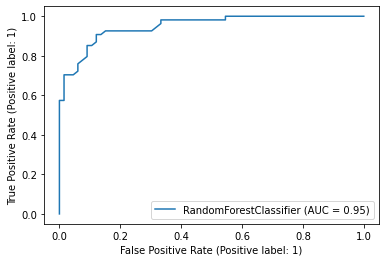

In [32]:
plot_roc_curve(rf_model,X_test,y_test);

In [33]:
cm = confusion_matrix(y_test,y_pred)
cm

array([[60,  6],
       [10, 44]], dtype=int64)

<AxesSubplot:>

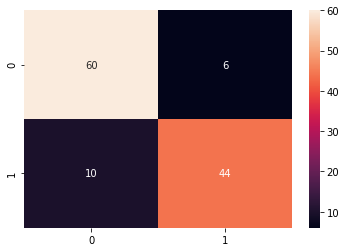

In [34]:
sns.heatmap(cm, annot=True)

In [36]:
for i,j in zip(X.columns,rf_model.feature_importances_):
    print(i,j)

GRE Score 0.19304362618507875
TOEFL Score 0.17883934601691442
University Rating 0.07071716484482218
SOP 0.10470793889046241
LOR 0.06728114396648101
CGPA 0.3475157574683648
Research 0.03789502262787647


In [37]:
importance = pd.DataFrame({'Features':X.columns,'Importance':rf_model.feature_importances_})
importance

Features  Importance
0          GRE Score    0.193044
1        TOEFL Score    0.178839
2  University Rating    0.070717
3                SOP    0.104708
4                LOR    0.067281
5               CGPA    0.347516
6           Research    0.037895

<AxesSubplot:>

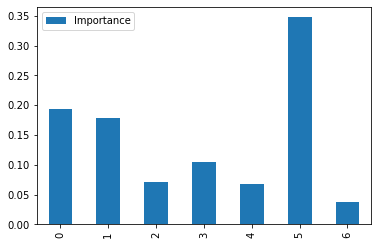

In [38]:
importance.plot(kind='bar')

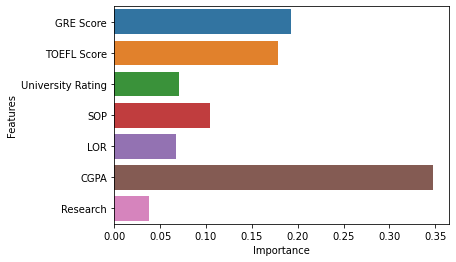

In [40]:
sns.barplot(x='Importance',y='Features',data=importance);

In [41]:
from sklearn.model_selection import GridSearchCV

In [43]:
params = [{'n_estimators':[10,30,50,70,90],
    'criterion':['gini','entropy'],
    'max_depth': [5,10,15],
    'min_samples_split':[2,5,8,10],
    'min_samples_leaf':[1,5,8],
    'max_features':['sqrt','log2'],
    'max_leaf_nodes':[2,4,6,8]}]

In [44]:
rf_grid = GridSearchCV(estimator=rf,param_grid=params,cv=5)

In [46]:
rf_grid_model = rf_grid.fit(X_train,y_train)

In [47]:
rf_grid_model.best_params_

{'criterion': 'gini',
 'max_depth': 10,
 'max_features': 'sqrt',
 'max_leaf_nodes': 6,
 'min_samples_leaf': 1,
 'min_samples_split': 5,
 'n_estimators': 10}

In [48]:
rf_new = RandomForestClassifier(criterion = 'gini',max_depth = 10,max_features = 'sqrt',max_leaf_nodes = 6,min_samples_leaf = 1,min_samples_split = 5,n_estimators = 10,oob_score=True)

In [49]:
rf_new_model = rf_new.fit(X_train,y_train)

C:\Users\MY HP\anaconda3\lib\site-packages\sklearn\ensemble\_forest.py:541: UserWarning: Some inputs do not have OOB scores. This probably means too few trees were used to compute any reliable oob estimates.
  warn("Some inputs do not have OOB scores. "
C:\Users\MY HP\anaconda3\lib\site-packages\sklearn\ensemble\_forest.py:545: RuntimeWarning: invalid value encountered in true_divide
  decision = (predictions[k] /


In [50]:
# oob_score is giving us variance... this is simmilar to R2 score.

 rf_new_model.oob_score_

0.8321428571428572

## KNN

In [51]:
df2 = pd.read_csv('bcancer.csv')
df2.head()

diagnosis  radius_mean  texture_mean  perimeter_mean  area_mean  \
0         M        17.99         10.38          122.80     1001.0   
1         M        20.57         17.77          132.90     1326.0   
2         M        19.69         21.25          130.00     1203.0   
3         M        11.42         20.38           77.58      386.1   
4         M        20.29         14.34          135.10     1297.0   

   smoothness_mean  compactness_mean  concavity_mean  concave points_mean  \
0          0.11840           0.27760          0.3001              0.14710   
1          0.08474           0.07864          0.0869              0.07017   
2          0.10960           0.15990          0.1974              0.12790   
3          0.14250           0.28390          0.2414              0.10520   
4          0.10030           0.13280          0.1980              0.10430   

   symmetry_mean  ...  radius_worst  texture_worst  perimeter_worst  \
0         0.2419  ...         25.38          17.33           184.60   
1         0.1812  ...         24.99          23.41           158.80   
2         0.2069  ...         23.57          25.53           152.50   
3         0.2597  ...         14.91          26.50            98.87   
4         0.1809  ...         22.54          16.67           152.20   

   area_worst  smoothness_worst  compactness_worst  concavity_worst  \
0      2019.0            0.1622             0.6656           0.7119   
1      1956.0            0.1238             0.1866           0.2416   
2      1709.0            0.1444             0.4245           0.4504   
3       567.7            0.2098             0.8663           0.6869   
4      1575.0            0.1374             0.2050           0.4000   

   concave points_worst  symmetry_worst  fractal_dimension_worst  
0                0.2654          0.4601                  0.11890  
1                0.1860          0.2750                  0.08902  
2                0.2430          0.3613                  0.08758  
3                0.2575          0.6638                  0.17300  
4                0.1625          0.2364                  0.07678  

[5 rows x 31 columns]

In [52]:
df2.shape

(569, 31)

In [53]:
df2.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 569 entries, 0 to 568
Data columns (total 31 columns):
 #   Column                   Non-Null Count  Dtype  
---  ------                   --------------  -----  
 0   diagnosis                569 non-null    object 
 1   radius_mean              569 non-null    float64
 2   texture_mean             569 non-null    float64
 3   perimeter_mean           569 non-null    float64
 4   area_mean                569 non-null    float64
 5   smoothness_mean          569 non-null    float64
 6   compactness_mean         569 non-null    float64
 7   concavity_mean           569 non-null    float64
 8   concave points_mean      569 non-null    float64
 9   symmetry_mean            569 non-null    float64
 10  fractal_dimension_mean   569 non-null    float64
 11  radius_se                569 non-null    float64
 12  texture_se               569 non-null    float64
 13  perimeter_se             569 non-null    float64
 14  area_se                  5

In [54]:
# No null is present.
df2.isnull().sum()

diagnosis                  0
radius_mean                0
texture_mean               0
perimeter_mean             0
area_mean                  0
smoothness_mean            0
compactness_mean           0
concavity_mean             0
concave points_mean        0
symmetry_mean              0
fractal_dimension_mean     0
radius_se                  0
texture_se                 0
perimeter_se               0
area_se                    0
smoothness_se              0
compactness_se             0
concavity_se               0
concave points_se          0
symmetry_se                0
fractal_dimension_se       0
radius_worst               0
texture_worst              0
perimeter_worst            0
area_worst                 0
smoothness_worst           0
compactness_worst          0
concavity_worst            0
concave points_worst       0
symmetry_worst             0
fractal_dimension_worst    0
dtype: int64

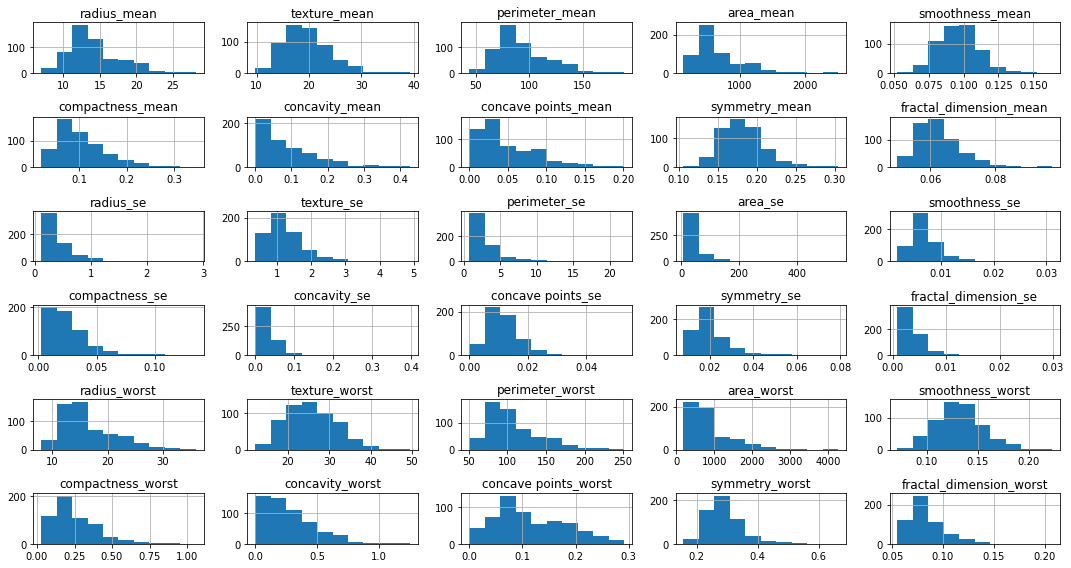

In [60]:
plt.rcParams['figure.figsize'] = [15,8]
df2.drop('diagnosis', axis = 1).hist()
plt.tight_layout()
plt.show()

In [61]:
df2['diagnosis'].value_counts()

B    357
M    212
Name: diagnosis, dtype: int64

In [62]:
X = df2.drop('diagnosis',axis=1)
y = df2['diagnosis']

In [63]:
from sklearn.preprocessing import MinMaxScaler

In [64]:
mns = MinMaxScaler()

In [65]:
scaled_X = mns.fit_transform(X)

In [66]:
scaled_X_df = pd.DataFrame(scaled_X,columns=X.columns)
scaled_X_df

radius_mean  texture_mean  perimeter_mean  area_mean  smoothness_mean  \
0       0.521037      0.022658        0.545989   0.363733         0.593753   
1       0.643144      0.272574        0.615783   0.501591         0.289880   
2       0.601496      0.390260        0.595743   0.449417         0.514309   
3       0.210090      0.360839        0.233501   0.102906         0.811321   
4       0.629893      0.156578        0.630986   0.489290         0.430351   
..           ...           ...             ...        ...              ...   
564     0.690000      0.428813        0.678668   0.566490         0.526948   
565     0.622320      0.626987        0.604036   0.474019         0.407782   
566     0.455251      0.621238        0.445788   0.303118         0.288165   
567     0.644564      0.663510        0.665538   0.475716         0.588336   
568     0.036869      0.501522        0.028540   0.015907         0.000000   

     compactness_mean  concavity_mean  concave points_mean  symmetry_mean  \
0            0.792037        0.703140             0.731113       0.686364   
1            0.181768        0.203608             0.348757       0.379798   
2            0.431017        0.462512             0.635686       0.509596   
3            0.811361        0.565604             0.522863       0.776263   
4            0.347893        0.463918             0.518390       0.378283   
..                ...             ...                  ...            ...   
564          0.296055        0.571462             0.690358       0.336364   
565          0.257714        0.337395             0.486630       0.349495   
566          0.254340        0.216753             0.263519       0.267677   
567          0.790197        0.823336             0.755467       0.675253   
568          0.074351        0.000000             0.000000       0.266162   

     fractal_dimension_mean  ...  radius_worst  texture_worst  \
0                  0.605518  ...      0.620776       0.141525   
1                  0.141323  ...      0.606901       0.303571   
2                  0.211247  ...      0.556386       0.360075   
3                  1.000000  ...      0.248310       0.385928   
4                  0.186816  ...      0.519744       0.123934   
..                      ...  ...           ...            ...   
564                0.132056  ...      0.623266       0.383262   
565                0.113100  ...      0.560655       0.699094   
566                0.137321  ...      0.393099       0.589019   
567                0.425442  ...      0.633582       0.730277   
568                0.187026  ...      0.054287       0.489072   

     perimeter_worst  area_worst  smoothness_worst  compactness_worst  \
0           0.668310    0.450698          0.601136           0.619292   
1           0.539818    0.435214          0.347553           0.154563   
2           0.508442    0.374508          0.483590           0.385375   
3           0.241347    0.094008          0.915472           0.814012   
4           0.506948    0.341575          0.437364           0.172415   
..               ...         ...               ...                ...   
564         0.576174    0.452664          0.461137           0.178527   
565         0.520892    0.379915          0.300007           0.159997   
566         0.379949    0.230731          0.282177           0.273705   
567         0.668310    0.402035          0.619626           0.815758   
568         0.043578    0.020497          0.124084           0.036043   

     concavity_worst  concave points_worst  symmetry_worst  \
0           0.568610              0.912027        0.598462   
1           0.192971              0.639175        0.233590   
2           0.359744              0.835052        0.403706   
3           0.548642              0.884880        1.000000   
4           0.319489              0.558419        0.157500   
..               ...                   ...             ...   
564         0.328035              0.761512        0

In [67]:
from sklearn.model_selection import train_test_split

In [68]:
X_train,X_test,y_train,y_test = train_test_split(scaled_X_df,y,test_size=0.3)

In [69]:
from sklearn.neighbors import KNeighborsClassifier

In [70]:
knn = KNeighborsClassifier()

In [71]:
knn_model = knn.fit(X_train,y_train)

In [72]:
y_pred = knn_model.predict(X_test)

In [73]:
y_pred

array(['B', 'M', 'B', 'M', 'M', 'M', 'B', 'M', 'B', 'M', 'B', 'B', 'M',
       'B', 'B', 'B', 'M', 'B', 'B', 'M', 'M', 'M', 'B', 'B', 'M', 'B',
       'B', 'M', 'B', 'M', 'B', 'B', 'B', 'B', 'B', 'B', 'M', 'B', 'B',
       'B', 'B', 'B', 'B', 'B', 'B', 'M', 'B', 'B', 'B', 'B', 'M', 'B',
       'B', 'B', 'M', 'B', 'B', 'M', 'B', 'M', 'B', 'B', 'M', 'M', 'M',
       'M', 'M', 'B', 'B', 'B', 'M', 'B', 'B', 'B', 'B', 'M', 'B', 'B',
       'B', 'B', 'M', 'B', 'B', 'B', 'M', 'B', 'B', 'B', 'B', 'M', 'B',
       'B', 'M', 'M', 'B', 'B', 'B', 'B', 'B', 'B', 'B', 'M', 'M', 'M',
       'B', 'B', 'B', 'B', 'M', 'B', 'M', 'B', 'B', 'B', 'M', 'B', 'B',
       'B', 'M', 'B', 'M', 'B', 'B', 'M', 'M', 'B', 'B', 'B', 'B', 'M',
       'B', 'B', 'B', 'B', 'B', 'B', 'M', 'B', 'B', 'B', 'B', 'M', 'B',
       'B', 'M', 'M', 'M', 'M', 'B', 'M', 'B', 'M', 'B', 'B', 'B', 'M',
       'M', 'M', 'B', 'B', 'M', 'M', 'B', 'B', 'B', 'M', 'B', 'M', 'M',
       'B', 'B'], dtype=object)

In [74]:
cm = confusion_matrix(y_test,y_pred)
cm

# Model has performed very well.

array([[108,   1],
       [  4,  58]], dtype=int64)

<AxesSubplot:>

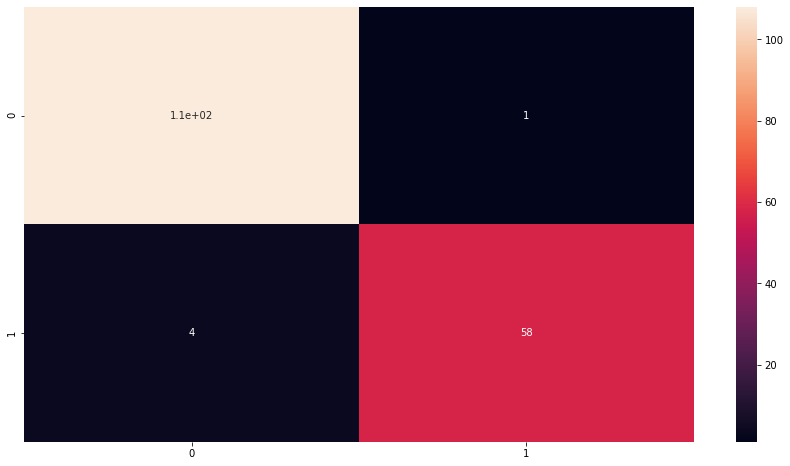

In [75]:
sns.heatmap(cm,annot=True)

In [88]:
# Grid Search
tuned_paramaters = {'n_neighbors': np.arange(1, 25, 2),
                   'metric': ['hamming','euclidean','manhattan','Chebyshev']}


In [89]:
knn_model = KNeighborsClassifier()

In [90]:
knn_grid = GridSearchCV(estimator=knn_model,param_grid=tuned_paramaters,cv=5,scoring='accuracy')

In [91]:
knn_model_grid = knn_grid.fit(X_train,y_train)

C:\Users\MY HP\anaconda3\lib\site-packages\sklearn\model_selection\_validation.py:615: FitFailedWarning: Estimator fit failed. The score on this train-test partition for these parameters will be set to nan. Details: 
Traceback (most recent call last):
  File "C:\Users\MY HP\anaconda3\lib\site-packages\sklearn\model_selection\_validation.py", line 598, in _fit_and_score
    estimator.fit(X_train, y_train, **fit_params)
  File "C:\Users\MY HP\anaconda3\lib\site-packages\sklearn\neighbors\_classification.py", line 179, in fit
    return self._fit(X, y)
  File "C:\Users\MY HP\anaconda3\lib\site-packages\sklearn\neighbors\_base.py", line 399, in _fit
    self._check_algorithm_metric()
  File "C:\Users\MY HP\anaconda3\lib\site-packages\sklearn\neighbors\_base.py", line 342, in _check_algorithm_metric
    raise ValueError("Metric '%s' not valid. Use "
ValueError: Metric 'Chebyshev' not valid. Use sorted(sklearn.neighbors.VALID_METRICS['brute']) to get valid options. Metric can also be a calla

C:\Users\MY HP\anaconda3\lib\site-packages\sklearn\model_selection\_validation.py:615: FitFailedWarning: Estimator fit failed. The score on this train-test partition for these parameters will be set to nan. Details: 
Traceback (most recent call last):
  File "C:\Users\MY HP\anaconda3\lib\site-packages\sklearn\model_selection\_validation.py", line 598, in _fit_and_score
    estimator.fit(X_train, y_train, **fit_params)
  File "C:\Users\MY HP\anaconda3\lib\site-packages\sklearn\neighbors\_classification.py", line 179, in fit
    return self._fit(X, y)
  File "C:\Users\MY HP\anaconda3\lib\site-packages\sklearn\neighbors\_base.py", line 399, in _fit
    self._check_algorithm_metric()
  File "C:\Users\MY HP\anaconda3\lib\site-packages\sklearn\neighbors\_base.py", line 342, in _check_algorithm_metric
    raise ValueError("Metric '%s' not valid. Use "
ValueError: Metric 'Chebyshev' not valid. Use sorted(sklearn.neighbors.VALID_METRICS['brute']) to get valid options. Metric can also be a calla

C:\Users\MY HP\anaconda3\lib\site-packages\sklearn\model_selection\_validation.py:615: FitFailedWarning: Estimator fit failed. The score on this train-test partition for these parameters will be set to nan. Details: 
Traceback (most recent call last):
  File "C:\Users\MY HP\anaconda3\lib\site-packages\sklearn\model_selection\_validation.py", line 598, in _fit_and_score
    estimator.fit(X_train, y_train, **fit_params)
  File "C:\Users\MY HP\anaconda3\lib\site-packages\sklearn\neighbors\_classification.py", line 179, in fit
    return self._fit(X, y)
  File "C:\Users\MY HP\anaconda3\lib\site-packages\sklearn\neighbors\_base.py", line 399, in _fit
    self._check_algorithm_metric()
  File "C:\Users\MY HP\anaconda3\lib\site-packages\sklearn\neighbors\_base.py", line 342, in _check_algorithm_metric
    raise ValueError("Metric '%s' not valid. Use "
ValueError: Metric 'Chebyshev' not valid. Use sorted(sklearn.neighbors.VALID_METRICS['brute']) to get valid options. Metric can also be a calla

In [93]:
knn_model_grid.best_params_

{'metric': 'euclidean', 'n_neighbors': 3}

In [95]:
from sklearn.model_selection import cross_val_score

In [96]:
error_rate = []

for i in np.arange(1,25,2):
    knn = KNeighborsClassifier(n_neighbors=i)
    score = cross_val_score(knn,X_train,y_train,cv=5)
    score = score.mean()
    error_rate.append(1-score)

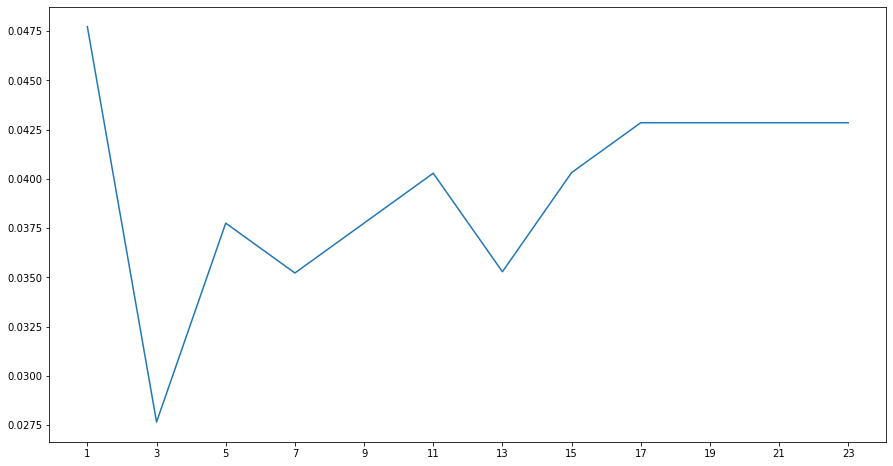

In [100]:
plt.plot(range(1,25,2),error_rate)
plt.xticks(np.arange(1,25,2));

# K=3 is giving the minimum error.

**DAY-4**

## Ada BOOST

In [2]:
df1 = pd.read_csv('Admission_Predict.csv')
df1.head()

Serial No.  GRE Score  TOEFL Score  University Rating  SOP  LOR  CGPA  \
0           1        337          118                  4  4.5  4.5  9.65   
1           2        324          107                  4  4.0  4.5  8.87   
2           3        316          104                  3  3.0  3.5  8.00   
3           4        322          110                  3  3.5  2.5  8.67   
4           5        314          103                  2  2.0  3.0  8.21   

   Research  Chance of Admit  
0         1                1  
1         1                1  
2         1                0  
3         1                1  
4         0                0

In [3]:
!pip install xgboost

In [4]:
from sklearn.ensemble import AdaBoostClassifier

In [5]:
abc = AdaBoostClassifier()

In [6]:
from sklearn.model_selection import train_test_split

In [19]:
X = df1.drop(['Chance of Admit','Serial No.'],axis=1)
y = df1['Chance of Admit']

In [20]:
X_train,X_test,y_train,y_test = train_test_split(X,y,test_size=0.3)

In [21]:
ada_model = abc.fit(X_train,y_train)

In [22]:
y_pred = ada_model.predict(X_test)

In [11]:
from sklearn.metrics import confusion_matrix,classification_report

In [23]:
cm = confusion_matrix(y_test,y_pred)

In [13]:
import seaborn as sns

<AxesSubplot:>

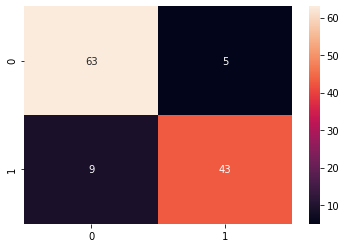

In [24]:
sns.heatmap(cm,annot=True)

In [25]:
importance = pd.DataFrame({'Columns':X.columns,'Importance':ada_model.feature_importances_})
importance.sort_values(by=['Importance'],ascending=False)

Columns  Importance
5               CGPA        0.36
0          GRE Score        0.22
1        TOEFL Score        0.18
4                LOR        0.10
2  University Rating        0.06
3                SOP        0.06
6           Research        0.02

In [26]:
print(classification_report(y_test,y_pred))

              precision    recall  f1-score   support

           0       0.88      0.93      0.90        68
           1       0.90      0.83      0.86        52

    accuracy                           0.88       120
   macro avg       0.89      0.88      0.88       120
weighted avg       0.88      0.88      0.88       120



In [29]:
ada = AdaBoostClassifier()

In [27]:
param = [{'n_estimators':[10,20,50],'learning_rate':[.1,.4,1.0]}]

In [28]:
from sklearn.model_selection import GridSearchCV

In [30]:
ada_grid = GridSearchCV(estimator=ada,param_grid=param)

In [31]:
ada_grid_model = ada_grid.fit(X_train,y_train)

In [32]:
ada_grid_model.best_params_

{'learning_rate': 0.1, 'n_estimators': 10}

## Gradient Boosting

In [33]:
from sklearn.ensemble import GradientBoostingClassifier

In [35]:
gboost = GradientBoostingClassifier(n_estimators=100,max_depth=5)

In [36]:
g_boost_model = gboost.fit(X_train,y_train)

In [38]:
y_pred = g_boost_model.predict(X_test)

In [39]:
cm = confusion_matrix(y_test,y_pred)

<AxesSubplot:>

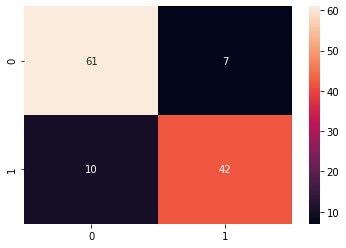

In [40]:
sns.heatmap(cm,annot=True)

In [41]:
print(classification_report(y_test,y_pred))

              precision    recall  f1-score   support

           0       0.86      0.90      0.88        68
           1       0.86      0.81      0.83        52

    accuracy                           0.86       120
   macro avg       0.86      0.85      0.85       120
weighted avg       0.86      0.86      0.86       120



In [42]:
from sklearn.metrics import plot_roc_curve

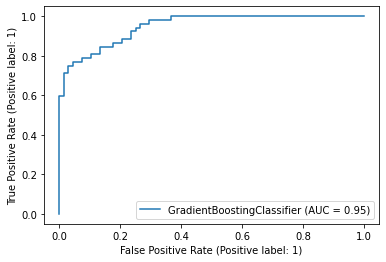

In [43]:
plot_roc_curve(g_boost_model,X_test,y_test)

## XG Boost

In [45]:
from xgboost import XGBClassifier

In [46]:
xgb = XGBClassifier()

In [47]:
xgb_model = xgb.fit(X_train,y_train)

C:\Users\MY HP\anaconda3\lib\site-packages\xgboost\sklearn.py:1146: UserWarning: The use of label encoder in XGBClassifier is deprecated and will be removed in a future release. To remove this warning, do the following: 1) Pass option use_label_encoder=False when constructing XGBClassifier object; and 2) Encode your labels (y) as integers starting with 0, i.e. 0, 1, 2, ..., [num_class - 1].
  warnings.warn(label_encoder_deprecation_msg, UserWarning)


[12:39:45] WARNING: C:/Users/Administrator/workspace/xgboost-win64_release_1.4.0/src/learner.cc:1095: Starting in XGBoost 1.3.0, the default evaluation metric used with the objective 'binary:logistic' was changed from 'error' to 'logloss'. Explicitly set eval_metric if you'd like to restore the old behavior.


In [48]:
y_pred = xgb_model.predict(X_test)

In [49]:
cm = confusion_matrix(y_test,y_pred)

<AxesSubplot:>

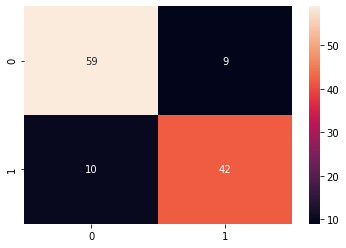

In [50]:
sns.heatmap(cm,annot=True)

In [51]:
importance = pd.DataFrame({'Columns':X.columns,'Importance':xgb_model.feature_importances_})
importance.sort_values(by=['Importance'],ascending=False)

Columns  Importance
5               CGPA    0.411106
2  University Rating    0.149940
4                LOR    0.118402
0          GRE Score    0.092518
3                SOP    0.081834
6           Research    0.076426
1        TOEFL Score    0.069773

<AxesSubplot:xlabel='Importance', ylabel='Columns'>

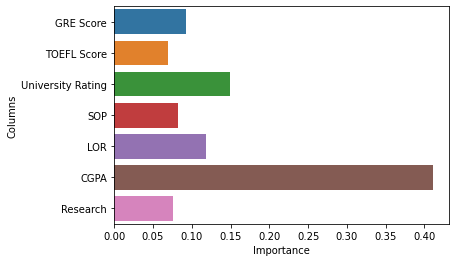

In [54]:
sns.barplot(data=importance,y='Columns',x='Importance')

In [ ]:
XGBClassifier()

In [55]:
param = [{'n_estimators':[10,20,50],'learning_rate':[.1,.4,1.0],'gamma':[0.2,0.4,0.7]}]

In [56]:
xg_grid = GridSearchCV(estimator=xgb_model,param_grid=param)

xg_grid_model = xg_grid.fit(X_train,y_train)

xg_grid_model.best_params_

C:\Users\MY HP\anaconda3\lib\site-packages\xgboost\sklearn.py:1146: UserWarning: The use of label encoder in XGBClassifier is deprecated and will be removed in a future release. To remove this warning, do the following: 1) Pass option use_label_encoder=False when constructing XGBClassifier object; and 2) Encode your labels (y) as integers starting with 0, i.e. 0, 1, 2, ..., [num_class - 1].
  warnings.warn(label_encoder_deprecation_msg, UserWarning)
C:\Users\MY HP\anaconda3\lib\site-packages\xgboost\sklearn.py:1146: UserWarning: The use of label encoder in XGBClassifier is deprecated and will be removed in a future release. To remove this warning, do the following: 1) Pass option use_label_encoder=False when constructing XGBClassifier object; and 2) Encode your labels (y) as integers starting with 0, i.e. 0, 1, 2, ..., [num_class - 1].
  warnings.warn(label_encoder_deprecation_msg, UserWarning)
C:\Users\MY HP\anaconda3\lib\site-packages\xgboost\sklearn.py:1146: UserWarning: The use of 

[12:48:32] WARNING: C:/Users/Administrator/workspace/xgboost-win64_release_1.4.0/src/learner.cc:1095: Starting in XGBoost 1.3.0, the default evaluation metric used with the objective 'binary:logistic' was changed from 'error' to 'logloss'. Explicitly set eval_metric if you'd like to restore the old behavior.
[12:48:32] WARNING: C:/Users/Administrator/workspace/xgboost-win64_release_1.4.0/src/learner.cc:1095: Starting in XGBoost 1.3.0, the default evaluation metric used with the objective 'binary:logistic' was changed from 'error' to 'logloss'. Explicitly set eval_metric if you'd like to restore the old behavior.
[12:48:32] WARNING: C:/Users/Administrator/workspace/xgboost-win64_release_1.4.0/src/learner.cc:1095: Starting in XGBoost 1.3.0, the default evaluation metric used with the objective 'binary:logistic' was changed from 'error' to 'logloss'. Explicitly set eval_metric if you'd like to restore the old behavior.
[12:48:32] WARNING: C:/Users/Administrator/workspace/xgboost-win64_rel

C:\Users\MY HP\anaconda3\lib\site-packages\xgboost\sklearn.py:1146: UserWarning: The use of label encoder in XGBClassifier is deprecated and will be removed in a future release. To remove this warning, do the following: 1) Pass option use_label_encoder=False when constructing XGBClassifier object; and 2) Encode your labels (y) as integers starting with 0, i.e. 0, 1, 2, ..., [num_class - 1].
  warnings.warn(label_encoder_deprecation_msg, UserWarning)
C:\Users\MY HP\anaconda3\lib\site-packages\xgboost\sklearn.py:1146: UserWarning: The use of label encoder in XGBClassifier is deprecated and will be removed in a future release. To remove this warning, do the following: 1) Pass option use_label_encoder=False when constructing XGBClassifier object; and 2) Encode your labels (y) as integers starting with 0, i.e. 0, 1, 2, ..., [num_class - 1].
  warnings.warn(label_encoder_deprecation_msg, UserWarning)
C:\Users\MY HP\anaconda3\lib\site-packages\xgboost\sklearn.py:1146: UserWarning: The use of 

[12:48:32] WARNING: C:/Users/Administrator/workspace/xgboost-win64_release_1.4.0/src/learner.cc:1095: Starting in XGBoost 1.3.0, the default evaluation metric used with the objective 'binary:logistic' was changed from 'error' to 'logloss'. Explicitly set eval_metric if you'd like to restore the old behavior.
[12:48:32] WARNING: C:/Users/Administrator/workspace/xgboost-win64_release_1.4.0/src/learner.cc:1095: Starting in XGBoost 1.3.0, the default evaluation metric used with the objective 'binary:logistic' was changed from 'error' to 'logloss'. Explicitly set eval_metric if you'd like to restore the old behavior.
[12:48:32] WARNING: C:/Users/Administrator/workspace/xgboost-win64_release_1.4.0/src/learner.cc:1095: Starting in XGBoost 1.3.0, the default evaluation metric used with the objective 'binary:logistic' was changed from 'error' to 'logloss'. Explicitly set eval_metric if you'd like to restore the old behavior.


C:\Users\MY HP\anaconda3\lib\site-packages\xgboost\sklearn.py:1146: UserWarning: The use of label encoder in XGBClassifier is deprecated and will be removed in a future release. To remove this warning, do the following: 1) Pass option use_label_encoder=False when constructing XGBClassifier object; and 2) Encode your labels (y) as integers starting with 0, i.e. 0, 1, 2, ..., [num_class - 1].
  warnings.warn(label_encoder_deprecation_msg, UserWarning)
C:\Users\MY HP\anaconda3\lib\site-packages\xgboost\sklearn.py:1146: UserWarning: The use of label encoder in XGBClassifier is deprecated and will be removed in a future release. To remove this warning, do the following: 1) Pass option use_label_encoder=False when constructing XGBClassifier object; and 2) Encode your labels (y) as integers starting with 0, i.e. 0, 1, 2, ..., [num_class - 1].
  warnings.warn(label_encoder_deprecation_msg, UserWarning)


[12:48:32] WARNING: C:/Users/Administrator/workspace/xgboost-win64_release_1.4.0/src/learner.cc:1095: Starting in XGBoost 1.3.0, the default evaluation metric used with the objective 'binary:logistic' was changed from 'error' to 'logloss'. Explicitly set eval_metric if you'd like to restore the old behavior.
[12:48:33] WARNING: C:/Users/Administrator/workspace/xgboost-win64_release_1.4.0/src/learner.cc:1095: Starting in XGBoost 1.3.0, the default evaluation metric used with the objective 'binary:logistic' was changed from 'error' to 'logloss'. Explicitly set eval_metric if you'd like to restore the old behavior.
[12:48:33] WARNING: C:/Users/Administrator/workspace/xgboost-win64_release_1.4.0/src/learner.cc:1095: Starting in XGBoost 1.3.0, the default evaluation metric used with the objective 'binary:logistic' was changed from 'error' to 'logloss'. Explicitly set eval_metric if you'd like to restore the old behavior.


C:\Users\MY HP\anaconda3\lib\site-packages\xgboost\sklearn.py:1146: UserWarning: The use of label encoder in XGBClassifier is deprecated and will be removed in a future release. To remove this warning, do the following: 1) Pass option use_label_encoder=False when constructing XGBClassifier object; and 2) Encode your labels (y) as integers starting with 0, i.e. 0, 1, 2, ..., [num_class - 1].
  warnings.warn(label_encoder_deprecation_msg, UserWarning)
C:\Users\MY HP\anaconda3\lib\site-packages\xgboost\sklearn.py:1146: UserWarning: The use of label encoder in XGBClassifier is deprecated and will be removed in a future release. To remove this warning, do the following: 1) Pass option use_label_encoder=False when constructing XGBClassifier object; and 2) Encode your labels (y) as integers starting with 0, i.e. 0, 1, 2, ..., [num_class - 1].
  warnings.warn(label_encoder_deprecation_msg, UserWarning)
C:\Users\MY HP\anaconda3\lib\site-packages\xgboost\sklearn.py:1146: UserWarning: The use of 

[12:48:33] WARNING: C:/Users/Administrator/workspace/xgboost-win64_release_1.4.0/src/learner.cc:1095: Starting in XGBoost 1.3.0, the default evaluation metric used with the objective 'binary:logistic' was changed from 'error' to 'logloss'. Explicitly set eval_metric if you'd like to restore the old behavior.
[12:48:33] WARNING: C:/Users/Administrator/workspace/xgboost-win64_release_1.4.0/src/learner.cc:1095: Starting in XGBoost 1.3.0, the default evaluation metric used with the objective 'binary:logistic' was changed from 'error' to 'logloss'. Explicitly set eval_metric if you'd like to restore the old behavior.
[12:48:33] WARNING: C:/Users/Administrator/workspace/xgboost-win64_release_1.4.0/src/learner.cc:1095: Starting in XGBoost 1.3.0, the default evaluation metric used with the objective 'binary:logistic' was changed from 'error' to 'logloss'. Explicitly set eval_metric if you'd like to restore the old behavior.
[12:48:33] WARNING: C:/Users/Administrator/workspace/xgboost-win64_rel

C:\Users\MY HP\anaconda3\lib\site-packages\xgboost\sklearn.py:1146: UserWarning: The use of label encoder in XGBClassifier is deprecated and will be removed in a future release. To remove this warning, do the following: 1) Pass option use_label_encoder=False when constructing XGBClassifier object; and 2) Encode your labels (y) as integers starting with 0, i.e. 0, 1, 2, ..., [num_class - 1].
  warnings.warn(label_encoder_deprecation_msg, UserWarning)
C:\Users\MY HP\anaconda3\lib\site-packages\xgboost\sklearn.py:1146: UserWarning: The use of label encoder in XGBClassifier is deprecated and will be removed in a future release. To remove this warning, do the following: 1) Pass option use_label_encoder=False when constructing XGBClassifier object; and 2) Encode your labels (y) as integers starting with 0, i.e. 0, 1, 2, ..., [num_class - 1].
  warnings.warn(label_encoder_deprecation_msg, UserWarning)
C:\Users\MY HP\anaconda3\lib\site-packages\xgboost\sklearn.py:1146: UserWarning: The use of 

[12:48:33] WARNING: C:/Users/Administrator/workspace/xgboost-win64_release_1.4.0/src/learner.cc:1095: Starting in XGBoost 1.3.0, the default evaluation metric used with the objective 'binary:logistic' was changed from 'error' to 'logloss'. Explicitly set eval_metric if you'd like to restore the old behavior.
[12:48:33] WARNING: C:/Users/Administrator/workspace/xgboost-win64_release_1.4.0/src/learner.cc:1095: Starting in XGBoost 1.3.0, the default evaluation metric used with the objective 'binary:logistic' was changed from 'error' to 'logloss'. Explicitly set eval_metric if you'd like to restore the old behavior.
[12:48:33] WARNING: C:/Users/Administrator/workspace/xgboost-win64_release_1.4.0/src/learner.cc:1095: Starting in XGBoost 1.3.0, the default evaluation metric used with the objective 'binary:logistic' was changed from 'error' to 'logloss'. Explicitly set eval_metric if you'd like to restore the old behavior.
[12:48:33] WARNING: C:/Users/Administrator/workspace/xgboost-win64_rel

C:\Users\MY HP\anaconda3\lib\site-packages\xgboost\sklearn.py:1146: UserWarning: The use of label encoder in XGBClassifier is deprecated and will be removed in a future release. To remove this warning, do the following: 1) Pass option use_label_encoder=False when constructing XGBClassifier object; and 2) Encode your labels (y) as integers starting with 0, i.e. 0, 1, 2, ..., [num_class - 1].
  warnings.warn(label_encoder_deprecation_msg, UserWarning)
C:\Users\MY HP\anaconda3\lib\site-packages\xgboost\sklearn.py:1146: UserWarning: The use of label encoder in XGBClassifier is deprecated and will be removed in a future release. To remove this warning, do the following: 1) Pass option use_label_encoder=False when constructing XGBClassifier object; and 2) Encode your labels (y) as integers starting with 0, i.e. 0, 1, 2, ..., [num_class - 1].
  warnings.warn(label_encoder_deprecation_msg, UserWarning)
C:\Users\MY HP\anaconda3\lib\site-packages\xgboost\sklearn.py:1146: UserWarning: The use of 

[12:48:33] WARNING: C:/Users/Administrator/workspace/xgboost-win64_release_1.4.0/src/learner.cc:1095: Starting in XGBoost 1.3.0, the default evaluation metric used with the objective 'binary:logistic' was changed from 'error' to 'logloss'. Explicitly set eval_metric if you'd like to restore the old behavior.
[12:48:33] WARNING: C:/Users/Administrator/workspace/xgboost-win64_release_1.4.0/src/learner.cc:1095: Starting in XGBoost 1.3.0, the default evaluation metric used with the objective 'binary:logistic' was changed from 'error' to 'logloss'. Explicitly set eval_metric if you'd like to restore the old behavior.
[12:48:33] WARNING: C:/Users/Administrator/workspace/xgboost-win64_release_1.4.0/src/learner.cc:1095: Starting in XGBoost 1.3.0, the default evaluation metric used with the objective 'binary:logistic' was changed from 'error' to 'logloss'. Explicitly set eval_metric if you'd like to restore the old behavior.


C:\Users\MY HP\anaconda3\lib\site-packages\xgboost\sklearn.py:1146: UserWarning: The use of label encoder in XGBClassifier is deprecated and will be removed in a future release. To remove this warning, do the following: 1) Pass option use_label_encoder=False when constructing XGBClassifier object; and 2) Encode your labels (y) as integers starting with 0, i.e. 0, 1, 2, ..., [num_class - 1].
  warnings.warn(label_encoder_deprecation_msg, UserWarning)
C:\Users\MY HP\anaconda3\lib\site-packages\xgboost\sklearn.py:1146: UserWarning: The use of label encoder in XGBClassifier is deprecated and will be removed in a future release. To remove this warning, do the following: 1) Pass option use_label_encoder=False when constructing XGBClassifier object; and 2) Encode your labels (y) as integers starting with 0, i.e. 0, 1, 2, ..., [num_class - 1].
  warnings.warn(label_encoder_deprecation_msg, UserWarning)
C:\Users\MY HP\anaconda3\lib\site-packages\xgboost\sklearn.py:1146: UserWarning: The use of 

[12:48:33] WARNING: C:/Users/Administrator/workspace/xgboost-win64_release_1.4.0/src/learner.cc:1095: Starting in XGBoost 1.3.0, the default evaluation metric used with the objective 'binary:logistic' was changed from 'error' to 'logloss'. Explicitly set eval_metric if you'd like to restore the old behavior.
[12:48:33] WARNING: C:/Users/Administrator/workspace/xgboost-win64_release_1.4.0/src/learner.cc:1095: Starting in XGBoost 1.3.0, the default evaluation metric used with the objective 'binary:logistic' was changed from 'error' to 'logloss'. Explicitly set eval_metric if you'd like to restore the old behavior.
[12:48:33] WARNING: C:/Users/Administrator/workspace/xgboost-win64_release_1.4.0/src/learner.cc:1095: Starting in XGBoost 1.3.0, the default evaluation metric used with the objective 'binary:logistic' was changed from 'error' to 'logloss'. Explicitly set eval_metric if you'd like to restore the old behavior.


C:\Users\MY HP\anaconda3\lib\site-packages\xgboost\sklearn.py:1146: UserWarning: The use of label encoder in XGBClassifier is deprecated and will be removed in a future release. To remove this warning, do the following: 1) Pass option use_label_encoder=False when constructing XGBClassifier object; and 2) Encode your labels (y) as integers starting with 0, i.e. 0, 1, 2, ..., [num_class - 1].
  warnings.warn(label_encoder_deprecation_msg, UserWarning)
C:\Users\MY HP\anaconda3\lib\site-packages\xgboost\sklearn.py:1146: UserWarning: The use of label encoder in XGBClassifier is deprecated and will be removed in a future release. To remove this warning, do the following: 1) Pass option use_label_encoder=False when constructing XGBClassifier object; and 2) Encode your labels (y) as integers starting with 0, i.e. 0, 1, 2, ..., [num_class - 1].
  warnings.warn(label_encoder_deprecation_msg, UserWarning)
C:\Users\MY HP\anaconda3\lib\site-packages\xgboost\sklearn.py:1146: UserWarning: The use of 

[12:48:34] WARNING: C:/Users/Administrator/workspace/xgboost-win64_release_1.4.0/src/learner.cc:1095: Starting in XGBoost 1.3.0, the default evaluation metric used with the objective 'binary:logistic' was changed from 'error' to 'logloss'. Explicitly set eval_metric if you'd like to restore the old behavior.
[12:48:34] WARNING: C:/Users/Administrator/workspace/xgboost-win64_release_1.4.0/src/learner.cc:1095: Starting in XGBoost 1.3.0, the default evaluation metric used with the objective 'binary:logistic' was changed from 'error' to 'logloss'. Explicitly set eval_metric if you'd like to restore the old behavior.
[12:48:34] WARNING: C:/Users/Administrator/workspace/xgboost-win64_release_1.4.0/src/learner.cc:1095: Starting in XGBoost 1.3.0, the default evaluation metric used with the objective 'binary:logistic' was changed from 'error' to 'logloss'. Explicitly set eval_metric if you'd like to restore the old behavior.
[12:48:34] WARNING: C:/Users/Administrator/workspace/xgboost-win64_rel

C:\Users\MY HP\anaconda3\lib\site-packages\xgboost\sklearn.py:1146: UserWarning: The use of label encoder in XGBClassifier is deprecated and will be removed in a future release. To remove this warning, do the following: 1) Pass option use_label_encoder=False when constructing XGBClassifier object; and 2) Encode your labels (y) as integers starting with 0, i.e. 0, 1, 2, ..., [num_class - 1].
  warnings.warn(label_encoder_deprecation_msg, UserWarning)
C:\Users\MY HP\anaconda3\lib\site-packages\xgboost\sklearn.py:1146: UserWarning: The use of label encoder in XGBClassifier is deprecated and will be removed in a future release. To remove this warning, do the following: 1) Pass option use_label_encoder=False when constructing XGBClassifier object; and 2) Encode your labels (y) as integers starting with 0, i.e. 0, 1, 2, ..., [num_class - 1].
  warnings.warn(label_encoder_deprecation_msg, UserWarning)
C:\Users\MY HP\anaconda3\lib\site-packages\xgboost\sklearn.py:1146: UserWarning: The use of 

[12:48:34] WARNING: C:/Users/Administrator/workspace/xgboost-win64_release_1.4.0/src/learner.cc:1095: Starting in XGBoost 1.3.0, the default evaluation metric used with the objective 'binary:logistic' was changed from 'error' to 'logloss'. Explicitly set eval_metric if you'd like to restore the old behavior.
[12:48:34] WARNING: C:/Users/Administrator/workspace/xgboost-win64_release_1.4.0/src/learner.cc:1095: Starting in XGBoost 1.3.0, the default evaluation metric used with the objective 'binary:logistic' was changed from 'error' to 'logloss'. Explicitly set eval_metric if you'd like to restore the old behavior.
[12:48:34] WARNING: C:/Users/Administrator/workspace/xgboost-win64_release_1.4.0/src/learner.cc:1095: Starting in XGBoost 1.3.0, the default evaluation metric used with the objective 'binary:logistic' was changed from 'error' to 'logloss'. Explicitly set eval_metric if you'd like to restore the old behavior.
[12:48:34] WARNING: C:/Users/Administrator/workspace/xgboost-win64_rel

C:\Users\MY HP\anaconda3\lib\site-packages\xgboost\sklearn.py:1146: UserWarning: The use of label encoder in XGBClassifier is deprecated and will be removed in a future release. To remove this warning, do the following: 1) Pass option use_label_encoder=False when constructing XGBClassifier object; and 2) Encode your labels (y) as integers starting with 0, i.e. 0, 1, 2, ..., [num_class - 1].
  warnings.warn(label_encoder_deprecation_msg, UserWarning)
C:\Users\MY HP\anaconda3\lib\site-packages\xgboost\sklearn.py:1146: UserWarning: The use of label encoder in XGBClassifier is deprecated and will be removed in a future release. To remove this warning, do the following: 1) Pass option use_label_encoder=False when constructing XGBClassifier object; and 2) Encode your labels (y) as integers starting with 0, i.e. 0, 1, 2, ..., [num_class - 1].
  warnings.warn(label_encoder_deprecation_msg, UserWarning)
C:\Users\MY HP\anaconda3\lib\site-packages\xgboost\sklearn.py:1146: UserWarning: The use of 

[12:48:34] WARNING: C:/Users/Administrator/workspace/xgboost-win64_release_1.4.0/src/learner.cc:1095: Starting in XGBoost 1.3.0, the default evaluation metric used with the objective 'binary:logistic' was changed from 'error' to 'logloss'. Explicitly set eval_metric if you'd like to restore the old behavior.
[12:48:34] WARNING: C:/Users/Administrator/workspace/xgboost-win64_release_1.4.0/src/learner.cc:1095: Starting in XGBoost 1.3.0, the default evaluation metric used with the objective 'binary:logistic' was changed from 'error' to 'logloss'. Explicitly set eval_metric if you'd like to restore the old behavior.
[12:48:34] WARNING: C:/Users/Administrator/workspace/xgboost-win64_release_1.4.0/src/learner.cc:1095: Starting in XGBoost 1.3.0, the default evaluation metric used with the objective 'binary:logistic' was changed from 'error' to 'logloss'. Explicitly set eval_metric if you'd like to restore the old behavior.
[12:48:34] WARNING: C:/Users/Administrator/workspace/xgboost-win64_rel

C:\Users\MY HP\anaconda3\lib\site-packages\xgboost\sklearn.py:1146: UserWarning: The use of label encoder in XGBClassifier is deprecated and will be removed in a future release. To remove this warning, do the following: 1) Pass option use_label_encoder=False when constructing XGBClassifier object; and 2) Encode your labels (y) as integers starting with 0, i.e. 0, 1, 2, ..., [num_class - 1].
  warnings.warn(label_encoder_deprecation_msg, UserWarning)
C:\Users\MY HP\anaconda3\lib\site-packages\xgboost\sklearn.py:1146: UserWarning: The use of label encoder in XGBClassifier is deprecated and will be removed in a future release. To remove this warning, do the following: 1) Pass option use_label_encoder=False when constructing XGBClassifier object; and 2) Encode your labels (y) as integers starting with 0, i.e. 0, 1, 2, ..., [num_class - 1].
  warnings.warn(label_encoder_deprecation_msg, UserWarning)
C:\Users\MY HP\anaconda3\lib\site-packages\xgboost\sklearn.py:1146: UserWarning: The use of 

[12:48:34] WARNING: C:/Users/Administrator/workspace/xgboost-win64_release_1.4.0/src/learner.cc:1095: Starting in XGBoost 1.3.0, the default evaluation metric used with the objective 'binary:logistic' was changed from 'error' to 'logloss'. Explicitly set eval_metric if you'd like to restore the old behavior.
[12:48:34] WARNING: C:/Users/Administrator/workspace/xgboost-win64_release_1.4.0/src/learner.cc:1095: Starting in XGBoost 1.3.0, the default evaluation metric used with the objective 'binary:logistic' was changed from 'error' to 'logloss'. Explicitly set eval_metric if you'd like to restore the old behavior.
[12:48:34] WARNING: C:/Users/Administrator/workspace/xgboost-win64_release_1.4.0/src/learner.cc:1095: Starting in XGBoost 1.3.0, the default evaluation metric used with the objective 'binary:logistic' was changed from 'error' to 'logloss'. Explicitly set eval_metric if you'd like to restore the old behavior.
[12:48:34] WARNING: C:/Users/Administrator/workspace/xgboost-win64_rel

C:\Users\MY HP\anaconda3\lib\site-packages\xgboost\sklearn.py:1146: UserWarning: The use of label encoder in XGBClassifier is deprecated and will be removed in a future release. To remove this warning, do the following: 1) Pass option use_label_encoder=False when constructing XGBClassifier object; and 2) Encode your labels (y) as integers starting with 0, i.e. 0, 1, 2, ..., [num_class - 1].
  warnings.warn(label_encoder_deprecation_msg, UserWarning)
C:\Users\MY HP\anaconda3\lib\site-packages\xgboost\sklearn.py:1146: UserWarning: The use of label encoder in XGBClassifier is deprecated and will be removed in a future release. To remove this warning, do the following: 1) Pass option use_label_encoder=False when constructing XGBClassifier object; and 2) Encode your labels (y) as integers starting with 0, i.e. 0, 1, 2, ..., [num_class - 1].
  warnings.warn(label_encoder_deprecation_msg, UserWarning)
C:\Users\MY HP\anaconda3\lib\site-packages\xgboost\sklearn.py:1146: UserWarning: The use of 

[12:48:34] WARNING: C:/Users/Administrator/workspace/xgboost-win64_release_1.4.0/src/learner.cc:1095: Starting in XGBoost 1.3.0, the default evaluation metric used with the objective 'binary:logistic' was changed from 'error' to 'logloss'. Explicitly set eval_metric if you'd like to restore the old behavior.
[12:48:34] WARNING: C:/Users/Administrator/workspace/xgboost-win64_release_1.4.0/src/learner.cc:1095: Starting in XGBoost 1.3.0, the default evaluation metric used with the objective 'binary:logistic' was changed from 'error' to 'logloss'. Explicitly set eval_metric if you'd like to restore the old behavior.
[12:48:34] WARNING: C:/Users/Administrator/workspace/xgboost-win64_release_1.4.0/src/learner.cc:1095: Starting in XGBoost 1.3.0, the default evaluation metric used with the objective 'binary:logistic' was changed from 'error' to 'logloss'. Explicitly set eval_metric if you'd like to restore the old behavior.
[12:48:35] WARNING: C:/Users/Administrator/workspace/xgboost-win64_rel

C:\Users\MY HP\anaconda3\lib\site-packages\xgboost\sklearn.py:1146: UserWarning: The use of label encoder in XGBClassifier is deprecated and will be removed in a future release. To remove this warning, do the following: 1) Pass option use_label_encoder=False when constructing XGBClassifier object; and 2) Encode your labels (y) as integers starting with 0, i.e. 0, 1, 2, ..., [num_class - 1].
  warnings.warn(label_encoder_deprecation_msg, UserWarning)
C:\Users\MY HP\anaconda3\lib\site-packages\xgboost\sklearn.py:1146: UserWarning: The use of label encoder in XGBClassifier is deprecated and will be removed in a future release. To remove this warning, do the following: 1) Pass option use_label_encoder=False when constructing XGBClassifier object; and 2) Encode your labels (y) as integers starting with 0, i.e. 0, 1, 2, ..., [num_class - 1].
  warnings.warn(label_encoder_deprecation_msg, UserWarning)
C:\Users\MY HP\anaconda3\lib\site-packages\xgboost\sklearn.py:1146: UserWarning: The use of 

[12:48:35] WARNING: C:/Users/Administrator/workspace/xgboost-win64_release_1.4.0/src/learner.cc:1095: Starting in XGBoost 1.3.0, the default evaluation metric used with the objective 'binary:logistic' was changed from 'error' to 'logloss'. Explicitly set eval_metric if you'd like to restore the old behavior.
[12:48:35] WARNING: C:/Users/Administrator/workspace/xgboost-win64_release_1.4.0/src/learner.cc:1095: Starting in XGBoost 1.3.0, the default evaluation metric used with the objective 'binary:logistic' was changed from 'error' to 'logloss'. Explicitly set eval_metric if you'd like to restore the old behavior.
[12:48:35] WARNING: C:/Users/Administrator/workspace/xgboost-win64_release_1.4.0/src/learner.cc:1095: Starting in XGBoost 1.3.0, the default evaluation metric used with the objective 'binary:logistic' was changed from 'error' to 'logloss'. Explicitly set eval_metric if you'd like to restore the old behavior.
[12:48:35] WARNING: C:/Users/Administrator/workspace/xgboost-win64_rel

C:\Users\MY HP\anaconda3\lib\site-packages\xgboost\sklearn.py:1146: UserWarning: The use of label encoder in XGBClassifier is deprecated and will be removed in a future release. To remove this warning, do the following: 1) Pass option use_label_encoder=False when constructing XGBClassifier object; and 2) Encode your labels (y) as integers starting with 0, i.e. 0, 1, 2, ..., [num_class - 1].
  warnings.warn(label_encoder_deprecation_msg, UserWarning)
C:\Users\MY HP\anaconda3\lib\site-packages\xgboost\sklearn.py:1146: UserWarning: The use of label encoder in XGBClassifier is deprecated and will be removed in a future release. To remove this warning, do the following: 1) Pass option use_label_encoder=False when constructing XGBClassifier object; and 2) Encode your labels (y) as integers starting with 0, i.e. 0, 1, 2, ..., [num_class - 1].
  warnings.warn(label_encoder_deprecation_msg, UserWarning)
C:\Users\MY HP\anaconda3\lib\site-packages\xgboost\sklearn.py:1146: UserWarning: The use of 

[12:48:35] WARNING: C:/Users/Administrator/workspace/xgboost-win64_release_1.4.0/src/learner.cc:1095: Starting in XGBoost 1.3.0, the default evaluation metric used with the objective 'binary:logistic' was changed from 'error' to 'logloss'. Explicitly set eval_metric if you'd like to restore the old behavior.
[12:48:35] WARNING: C:/Users/Administrator/workspace/xgboost-win64_release_1.4.0/src/learner.cc:1095: Starting in XGBoost 1.3.0, the default evaluation metric used with the objective 'binary:logistic' was changed from 'error' to 'logloss'. Explicitly set eval_metric if you'd like to restore the old behavior.
[12:48:35] WARNING: C:/Users/Administrator/workspace/xgboost-win64_release_1.4.0/src/learner.cc:1095: Starting in XGBoost 1.3.0, the default evaluation metric used with the objective 'binary:logistic' was changed from 'error' to 'logloss'. Explicitly set eval_metric if you'd like to restore the old behavior.


C:\Users\MY HP\anaconda3\lib\site-packages\xgboost\sklearn.py:1146: UserWarning: The use of label encoder in XGBClassifier is deprecated and will be removed in a future release. To remove this warning, do the following: 1) Pass option use_label_encoder=False when constructing XGBClassifier object; and 2) Encode your labels (y) as integers starting with 0, i.e. 0, 1, 2, ..., [num_class - 1].
  warnings.warn(label_encoder_deprecation_msg, UserWarning)
C:\Users\MY HP\anaconda3\lib\site-packages\xgboost\sklearn.py:1146: UserWarning: The use of label encoder in XGBClassifier is deprecated and will be removed in a future release. To remove this warning, do the following: 1) Pass option use_label_encoder=False when constructing XGBClassifier object; and 2) Encode your labels (y) as integers starting with 0, i.e. 0, 1, 2, ..., [num_class - 1].
  warnings.warn(label_encoder_deprecation_msg, UserWarning)
C:\Users\MY HP\anaconda3\lib\site-packages\xgboost\sklearn.py:1146: UserWarning: The use of 

[12:48:35] WARNING: C:/Users/Administrator/workspace/xgboost-win64_release_1.4.0/src/learner.cc:1095: Starting in XGBoost 1.3.0, the default evaluation metric used with the objective 'binary:logistic' was changed from 'error' to 'logloss'. Explicitly set eval_metric if you'd like to restore the old behavior.
[12:48:35] WARNING: C:/Users/Administrator/workspace/xgboost-win64_release_1.4.0/src/learner.cc:1095: Starting in XGBoost 1.3.0, the default evaluation metric used with the objective 'binary:logistic' was changed from 'error' to 'logloss'. Explicitly set eval_metric if you'd like to restore the old behavior.
[12:48:35] WARNING: C:/Users/Administrator/workspace/xgboost-win64_release_1.4.0/src/learner.cc:1095: Starting in XGBoost 1.3.0, the default evaluation metric used with the objective 'binary:logistic' was changed from 'error' to 'logloss'. Explicitly set eval_metric if you'd like to restore the old behavior.
[12:48:35] WARNING: C:/Users/Administrator/workspace/xgboost-win64_rel

C:\Users\MY HP\anaconda3\lib\site-packages\xgboost\sklearn.py:1146: UserWarning: The use of label encoder in XGBClassifier is deprecated and will be removed in a future release. To remove this warning, do the following: 1) Pass option use_label_encoder=False when constructing XGBClassifier object; and 2) Encode your labels (y) as integers starting with 0, i.e. 0, 1, 2, ..., [num_class - 1].
  warnings.warn(label_encoder_deprecation_msg, UserWarning)
C:\Users\MY HP\anaconda3\lib\site-packages\xgboost\sklearn.py:1146: UserWarning: The use of label encoder in XGBClassifier is deprecated and will be removed in a future release. To remove this warning, do the following: 1) Pass option use_label_encoder=False when constructing XGBClassifier object; and 2) Encode your labels (y) as integers starting with 0, i.e. 0, 1, 2, ..., [num_class - 1].
  warnings.warn(label_encoder_deprecation_msg, UserWarning)
C:\Users\MY HP\anaconda3\lib\site-packages\xgboost\sklearn.py:1146: UserWarning: The use of 

[12:48:36] WARNING: C:/Users/Administrator/workspace/xgboost-win64_release_1.4.0/src/learner.cc:1095: Starting in XGBoost 1.3.0, the default evaluation metric used with the objective 'binary:logistic' was changed from 'error' to 'logloss'. Explicitly set eval_metric if you'd like to restore the old behavior.
[12:48:36] WARNING: C:/Users/Administrator/workspace/xgboost-win64_release_1.4.0/src/learner.cc:1095: Starting in XGBoost 1.3.0, the default evaluation metric used with the objective 'binary:logistic' was changed from 'error' to 'logloss'. Explicitly set eval_metric if you'd like to restore the old behavior.
[12:48:36] WARNING: C:/Users/Administrator/workspace/xgboost-win64_release_1.4.0/src/learner.cc:1095: Starting in XGBoost 1.3.0, the default evaluation metric used with the objective 'binary:logistic' was changed from 'error' to 'logloss'. Explicitly set eval_metric if you'd like to restore the old behavior.
[12:48:36] WARNING: C:/Users/Administrator/workspace/xgboost-win64_rel

C:\Users\MY HP\anaconda3\lib\site-packages\xgboost\sklearn.py:1146: UserWarning: The use of label encoder in XGBClassifier is deprecated and will be removed in a future release. To remove this warning, do the following: 1) Pass option use_label_encoder=False when constructing XGBClassifier object; and 2) Encode your labels (y) as integers starting with 0, i.e. 0, 1, 2, ..., [num_class - 1].
  warnings.warn(label_encoder_deprecation_msg, UserWarning)
C:\Users\MY HP\anaconda3\lib\site-packages\xgboost\sklearn.py:1146: UserWarning: The use of label encoder in XGBClassifier is deprecated and will be removed in a future release. To remove this warning, do the following: 1) Pass option use_label_encoder=False when constructing XGBClassifier object; and 2) Encode your labels (y) as integers starting with 0, i.e. 0, 1, 2, ..., [num_class - 1].
  warnings.warn(label_encoder_deprecation_msg, UserWarning)
C:\Users\MY HP\anaconda3\lib\site-packages\xgboost\sklearn.py:1146: UserWarning: The use of 

[12:48:36] WARNING: C:/Users/Administrator/workspace/xgboost-win64_release_1.4.0/src/learner.cc:1095: Starting in XGBoost 1.3.0, the default evaluation metric used with the objective 'binary:logistic' was changed from 'error' to 'logloss'. Explicitly set eval_metric if you'd like to restore the old behavior.
[12:48:36] WARNING: C:/Users/Administrator/workspace/xgboost-win64_release_1.4.0/src/learner.cc:1095: Starting in XGBoost 1.3.0, the default evaluation metric used with the objective 'binary:logistic' was changed from 'error' to 'logloss'. Explicitly set eval_metric if you'd like to restore the old behavior.
[12:48:36] WARNING: C:/Users/Administrator/workspace/xgboost-win64_release_1.4.0/src/learner.cc:1095: Starting in XGBoost 1.3.0, the default evaluation metric used with the objective 'binary:logistic' was changed from 'error' to 'logloss'. Explicitly set eval_metric if you'd like to restore the old behavior.


C:\Users\MY HP\anaconda3\lib\site-packages\xgboost\sklearn.py:1146: UserWarning: The use of label encoder in XGBClassifier is deprecated and will be removed in a future release. To remove this warning, do the following: 1) Pass option use_label_encoder=False when constructing XGBClassifier object; and 2) Encode your labels (y) as integers starting with 0, i.e. 0, 1, 2, ..., [num_class - 1].
  warnings.warn(label_encoder_deprecation_msg, UserWarning)
C:\Users\MY HP\anaconda3\lib\site-packages\xgboost\sklearn.py:1146: UserWarning: The use of label encoder in XGBClassifier is deprecated and will be removed in a future release. To remove this warning, do the following: 1) Pass option use_label_encoder=False when constructing XGBClassifier object; and 2) Encode your labels (y) as integers starting with 0, i.e. 0, 1, 2, ..., [num_class - 1].
  warnings.warn(label_encoder_deprecation_msg, UserWarning)
C:\Users\MY HP\anaconda3\lib\site-packages\xgboost\sklearn.py:1146: UserWarning: The use of 

[12:48:36] WARNING: C:/Users/Administrator/workspace/xgboost-win64_release_1.4.0/src/learner.cc:1095: Starting in XGBoost 1.3.0, the default evaluation metric used with the objective 'binary:logistic' was changed from 'error' to 'logloss'. Explicitly set eval_metric if you'd like to restore the old behavior.
[12:48:36] WARNING: C:/Users/Administrator/workspace/xgboost-win64_release_1.4.0/src/learner.cc:1095: Starting in XGBoost 1.3.0, the default evaluation metric used with the objective 'binary:logistic' was changed from 'error' to 'logloss'. Explicitly set eval_metric if you'd like to restore the old behavior.
[12:48:36] WARNING: C:/Users/Administrator/workspace/xgboost-win64_release_1.4.0/src/learner.cc:1095: Starting in XGBoost 1.3.0, the default evaluation metric used with the objective 'binary:logistic' was changed from 'error' to 'logloss'. Explicitly set eval_metric if you'd like to restore the old behavior.


C:\Users\MY HP\anaconda3\lib\site-packages\xgboost\sklearn.py:1146: UserWarning: The use of label encoder in XGBClassifier is deprecated and will be removed in a future release. To remove this warning, do the following: 1) Pass option use_label_encoder=False when constructing XGBClassifier object; and 2) Encode your labels (y) as integers starting with 0, i.e. 0, 1, 2, ..., [num_class - 1].
  warnings.warn(label_encoder_deprecation_msg, UserWarning)
C:\Users\MY HP\anaconda3\lib\site-packages\xgboost\sklearn.py:1146: UserWarning: The use of label encoder in XGBClassifier is deprecated and will be removed in a future release. To remove this warning, do the following: 1) Pass option use_label_encoder=False when constructing XGBClassifier object; and 2) Encode your labels (y) as integers starting with 0, i.e. 0, 1, 2, ..., [num_class - 1].
  warnings.warn(label_encoder_deprecation_msg, UserWarning)
C:\Users\MY HP\anaconda3\lib\site-packages\xgboost\sklearn.py:1146: UserWarning: The use of 

[12:48:36] WARNING: C:/Users/Administrator/workspace/xgboost-win64_release_1.4.0/src/learner.cc:1095: Starting in XGBoost 1.3.0, the default evaluation metric used with the objective 'binary:logistic' was changed from 'error' to 'logloss'. Explicitly set eval_metric if you'd like to restore the old behavior.
[12:48:36] WARNING: C:/Users/Administrator/workspace/xgboost-win64_release_1.4.0/src/learner.cc:1095: Starting in XGBoost 1.3.0, the default evaluation metric used with the objective 'binary:logistic' was changed from 'error' to 'logloss'. Explicitly set eval_metric if you'd like to restore the old behavior.
[12:48:36] WARNING: C:/Users/Administrator/workspace/xgboost-win64_release_1.4.0/src/learner.cc:1095: Starting in XGBoost 1.3.0, the default evaluation metric used with the objective 'binary:logistic' was changed from 'error' to 'logloss'. Explicitly set eval_metric if you'd like to restore the old behavior.
[12:48:36] WARNING: C:/Users/Administrator/workspace/xgboost-win64_rel

C:\Users\MY HP\anaconda3\lib\site-packages\xgboost\sklearn.py:1146: UserWarning: The use of label encoder in XGBClassifier is deprecated and will be removed in a future release. To remove this warning, do the following: 1) Pass option use_label_encoder=False when constructing XGBClassifier object; and 2) Encode your labels (y) as integers starting with 0, i.e. 0, 1, 2, ..., [num_class - 1].
  warnings.warn(label_encoder_deprecation_msg, UserWarning)
C:\Users\MY HP\anaconda3\lib\site-packages\xgboost\sklearn.py:1146: UserWarning: The use of label encoder in XGBClassifier is deprecated and will be removed in a future release. To remove this warning, do the following: 1) Pass option use_label_encoder=False when constructing XGBClassifier object; and 2) Encode your labels (y) as integers starting with 0, i.e. 0, 1, 2, ..., [num_class - 1].
  warnings.warn(label_encoder_deprecation_msg, UserWarning)
C:\Users\MY HP\anaconda3\lib\site-packages\xgboost\sklearn.py:1146: UserWarning: The use of 

[12:48:36] WARNING: C:/Users/Administrator/workspace/xgboost-win64_release_1.4.0/src/learner.cc:1095: Starting in XGBoost 1.3.0, the default evaluation metric used with the objective 'binary:logistic' was changed from 'error' to 'logloss'. Explicitly set eval_metric if you'd like to restore the old behavior.
[12:48:36] WARNING: C:/Users/Administrator/workspace/xgboost-win64_release_1.4.0/src/learner.cc:1095: Starting in XGBoost 1.3.0, the default evaluation metric used with the objective 'binary:logistic' was changed from 'error' to 'logloss'. Explicitly set eval_metric if you'd like to restore the old behavior.
[12:48:36] WARNING: C:/Users/Administrator/workspace/xgboost-win64_release_1.4.0/src/learner.cc:1095: Starting in XGBoost 1.3.0, the default evaluation metric used with the objective 'binary:logistic' was changed from 'error' to 'logloss'. Explicitly set eval_metric if you'd like to restore the old behavior.
[12:48:36] WARNING: C:/Users/Administrator/workspace/xgboost-win64_rel

C:\Users\MY HP\anaconda3\lib\site-packages\xgboost\sklearn.py:1146: UserWarning: The use of label encoder in XGBClassifier is deprecated and will be removed in a future release. To remove this warning, do the following: 1) Pass option use_label_encoder=False when constructing XGBClassifier object; and 2) Encode your labels (y) as integers starting with 0, i.e. 0, 1, 2, ..., [num_class - 1].
  warnings.warn(label_encoder_deprecation_msg, UserWarning)
C:\Users\MY HP\anaconda3\lib\site-packages\xgboost\sklearn.py:1146: UserWarning: The use of label encoder in XGBClassifier is deprecated and will be removed in a future release. To remove this warning, do the following: 1) Pass option use_label_encoder=False when constructing XGBClassifier object; and 2) Encode your labels (y) as integers starting with 0, i.e. 0, 1, 2, ..., [num_class - 1].
  warnings.warn(label_encoder_deprecation_msg, UserWarning)
C:\Users\MY HP\anaconda3\lib\site-packages\xgboost\sklearn.py:1146: UserWarning: The use of 

[12:48:37] WARNING: C:/Users/Administrator/workspace/xgboost-win64_release_1.4.0/src/learner.cc:1095: Starting in XGBoost 1.3.0, the default evaluation metric used with the objective 'binary:logistic' was changed from 'error' to 'logloss'. Explicitly set eval_metric if you'd like to restore the old behavior.
[12:48:37] WARNING: C:/Users/Administrator/workspace/xgboost-win64_release_1.4.0/src/learner.cc:1095: Starting in XGBoost 1.3.0, the default evaluation metric used with the objective 'binary:logistic' was changed from 'error' to 'logloss'. Explicitly set eval_metric if you'd like to restore the old behavior.
[12:48:37] WARNING: C:/Users/Administrator/workspace/xgboost-win64_release_1.4.0/src/learner.cc:1095: Starting in XGBoost 1.3.0, the default evaluation metric used with the objective 'binary:logistic' was changed from 'error' to 'logloss'. Explicitly set eval_metric if you'd like to restore the old behavior.
[12:48:37] WARNING: C:/Users/Administrator/workspace/xgboost-win64_rel

C:\Users\MY HP\anaconda3\lib\site-packages\xgboost\sklearn.py:1146: UserWarning: The use of label encoder in XGBClassifier is deprecated and will be removed in a future release. To remove this warning, do the following: 1) Pass option use_label_encoder=False when constructing XGBClassifier object; and 2) Encode your labels (y) as integers starting with 0, i.e. 0, 1, 2, ..., [num_class - 1].
  warnings.warn(label_encoder_deprecation_msg, UserWarning)
C:\Users\MY HP\anaconda3\lib\site-packages\xgboost\sklearn.py:1146: UserWarning: The use of label encoder in XGBClassifier is deprecated and will be removed in a future release. To remove this warning, do the following: 1) Pass option use_label_encoder=False when constructing XGBClassifier object; and 2) Encode your labels (y) as integers starting with 0, i.e. 0, 1, 2, ..., [num_class - 1].
  warnings.warn(label_encoder_deprecation_msg, UserWarning)
C:\Users\MY HP\anaconda3\lib\site-packages\xgboost\sklearn.py:1146: UserWarning: The use of 

[12:48:37] WARNING: C:/Users/Administrator/workspace/xgboost-win64_release_1.4.0/src/learner.cc:1095: Starting in XGBoost 1.3.0, the default evaluation metric used with the objective 'binary:logistic' was changed from 'error' to 'logloss'. Explicitly set eval_metric if you'd like to restore the old behavior.
[12:48:37] WARNING: C:/Users/Administrator/workspace/xgboost-win64_release_1.4.0/src/learner.cc:1095: Starting in XGBoost 1.3.0, the default evaluation metric used with the objective 'binary:logistic' was changed from 'error' to 'logloss'. Explicitly set eval_metric if you'd like to restore the old behavior.
[12:48:37] WARNING: C:/Users/Administrator/workspace/xgboost-win64_release_1.4.0/src/learner.cc:1095: Starting in XGBoost 1.3.0, the default evaluation metric used with the objective 'binary:logistic' was changed from 'error' to 'logloss'. Explicitly set eval_metric if you'd like to restore the old behavior.


C:\Users\MY HP\anaconda3\lib\site-packages\xgboost\sklearn.py:1146: UserWarning: The use of label encoder in XGBClassifier is deprecated and will be removed in a future release. To remove this warning, do the following: 1) Pass option use_label_encoder=False when constructing XGBClassifier object; and 2) Encode your labels (y) as integers starting with 0, i.e. 0, 1, 2, ..., [num_class - 1].
  warnings.warn(label_encoder_deprecation_msg, UserWarning)
C:\Users\MY HP\anaconda3\lib\site-packages\xgboost\sklearn.py:1146: UserWarning: The use of label encoder in XGBClassifier is deprecated and will be removed in a future release. To remove this warning, do the following: 1) Pass option use_label_encoder=False when constructing XGBClassifier object; and 2) Encode your labels (y) as integers starting with 0, i.e. 0, 1, 2, ..., [num_class - 1].
  warnings.warn(label_encoder_deprecation_msg, UserWarning)
C:\Users\MY HP\anaconda3\lib\site-packages\xgboost\sklearn.py:1146: UserWarning: The use of 

[12:48:37] WARNING: C:/Users/Administrator/workspace/xgboost-win64_release_1.4.0/src/learner.cc:1095: Starting in XGBoost 1.3.0, the default evaluation metric used with the objective 'binary:logistic' was changed from 'error' to 'logloss'. Explicitly set eval_metric if you'd like to restore the old behavior.
[12:48:37] WARNING: C:/Users/Administrator/workspace/xgboost-win64_release_1.4.0/src/learner.cc:1095: Starting in XGBoost 1.3.0, the default evaluation metric used with the objective 'binary:logistic' was changed from 'error' to 'logloss'. Explicitly set eval_metric if you'd like to restore the old behavior.
[12:48:37] WARNING: C:/Users/Administrator/workspace/xgboost-win64_release_1.4.0/src/learner.cc:1095: Starting in XGBoost 1.3.0, the default evaluation metric used with the objective 'binary:logistic' was changed from 'error' to 'logloss'. Explicitly set eval_metric if you'd like to restore the old behavior.
[12:48:37] WARNING: C:/Users/Administrator/workspace/xgboost-win64_rel

C:\Users\MY HP\anaconda3\lib\site-packages\xgboost\sklearn.py:1146: UserWarning: The use of label encoder in XGBClassifier is deprecated and will be removed in a future release. To remove this warning, do the following: 1) Pass option use_label_encoder=False when constructing XGBClassifier object; and 2) Encode your labels (y) as integers starting with 0, i.e. 0, 1, 2, ..., [num_class - 1].
  warnings.warn(label_encoder_deprecation_msg, UserWarning)
C:\Users\MY HP\anaconda3\lib\site-packages\xgboost\sklearn.py:1146: UserWarning: The use of label encoder in XGBClassifier is deprecated and will be removed in a future release. To remove this warning, do the following: 1) Pass option use_label_encoder=False when constructing XGBClassifier object; and 2) Encode your labels (y) as integers starting with 0, i.e. 0, 1, 2, ..., [num_class - 1].
  warnings.warn(label_encoder_deprecation_msg, UserWarning)
C:\Users\MY HP\anaconda3\lib\site-packages\xgboost\sklearn.py:1146: UserWarning: The use of 

[12:48:37] WARNING: C:/Users/Administrator/workspace/xgboost-win64_release_1.4.0/src/learner.cc:1095: Starting in XGBoost 1.3.0, the default evaluation metric used with the objective 'binary:logistic' was changed from 'error' to 'logloss'. Explicitly set eval_metric if you'd like to restore the old behavior.
[12:48:37] WARNING: C:/Users/Administrator/workspace/xgboost-win64_release_1.4.0/src/learner.cc:1095: Starting in XGBoost 1.3.0, the default evaluation metric used with the objective 'binary:logistic' was changed from 'error' to 'logloss'. Explicitly set eval_metric if you'd like to restore the old behavior.
[12:48:38] WARNING: C:/Users/Administrator/workspace/xgboost-win64_release_1.4.0/src/learner.cc:1095: Starting in XGBoost 1.3.0, the default evaluation metric used with the objective 'binary:logistic' was changed from 'error' to 'logloss'. Explicitly set eval_metric if you'd like to restore the old behavior.


C:\Users\MY HP\anaconda3\lib\site-packages\xgboost\sklearn.py:1146: UserWarning: The use of label encoder in XGBClassifier is deprecated and will be removed in a future release. To remove this warning, do the following: 1) Pass option use_label_encoder=False when constructing XGBClassifier object; and 2) Encode your labels (y) as integers starting with 0, i.e. 0, 1, 2, ..., [num_class - 1].
  warnings.warn(label_encoder_deprecation_msg, UserWarning)
C:\Users\MY HP\anaconda3\lib\site-packages\xgboost\sklearn.py:1146: UserWarning: The use of label encoder in XGBClassifier is deprecated and will be removed in a future release. To remove this warning, do the following: 1) Pass option use_label_encoder=False when constructing XGBClassifier object; and 2) Encode your labels (y) as integers starting with 0, i.e. 0, 1, 2, ..., [num_class - 1].
  warnings.warn(label_encoder_deprecation_msg, UserWarning)
C:\Users\MY HP\anaconda3\lib\site-packages\xgboost\sklearn.py:1146: UserWarning: The use of 

[12:48:38] WARNING: C:/Users/Administrator/workspace/xgboost-win64_release_1.4.0/src/learner.cc:1095: Starting in XGBoost 1.3.0, the default evaluation metric used with the objective 'binary:logistic' was changed from 'error' to 'logloss'. Explicitly set eval_metric if you'd like to restore the old behavior.
[12:48:38] WARNING: C:/Users/Administrator/workspace/xgboost-win64_release_1.4.0/src/learner.cc:1095: Starting in XGBoost 1.3.0, the default evaluation metric used with the objective 'binary:logistic' was changed from 'error' to 'logloss'. Explicitly set eval_metric if you'd like to restore the old behavior.
[12:48:38] WARNING: C:/Users/Administrator/workspace/xgboost-win64_release_1.4.0/src/learner.cc:1095: Starting in XGBoost 1.3.0, the default evaluation metric used with the objective 'binary:logistic' was changed from 'error' to 'logloss'. Explicitly set eval_metric if you'd like to restore the old behavior.


C:\Users\MY HP\anaconda3\lib\site-packages\xgboost\sklearn.py:1146: UserWarning: The use of label encoder in XGBClassifier is deprecated and will be removed in a future release. To remove this warning, do the following: 1) Pass option use_label_encoder=False when constructing XGBClassifier object; and 2) Encode your labels (y) as integers starting with 0, i.e. 0, 1, 2, ..., [num_class - 1].
  warnings.warn(label_encoder_deprecation_msg, UserWarning)
C:\Users\MY HP\anaconda3\lib\site-packages\xgboost\sklearn.py:1146: UserWarning: The use of label encoder in XGBClassifier is deprecated and will be removed in a future release. To remove this warning, do the following: 1) Pass option use_label_encoder=False when constructing XGBClassifier object; and 2) Encode your labels (y) as integers starting with 0, i.e. 0, 1, 2, ..., [num_class - 1].
  warnings.warn(label_encoder_deprecation_msg, UserWarning)
C:\Users\MY HP\anaconda3\lib\site-packages\xgboost\sklearn.py:1146: UserWarning: The use of 

[12:48:38] WARNING: C:/Users/Administrator/workspace/xgboost-win64_release_1.4.0/src/learner.cc:1095: Starting in XGBoost 1.3.0, the default evaluation metric used with the objective 'binary:logistic' was changed from 'error' to 'logloss'. Explicitly set eval_metric if you'd like to restore the old behavior.
[12:48:38] WARNING: C:/Users/Administrator/workspace/xgboost-win64_release_1.4.0/src/learner.cc:1095: Starting in XGBoost 1.3.0, the default evaluation metric used with the objective 'binary:logistic' was changed from 'error' to 'logloss'. Explicitly set eval_metric if you'd like to restore the old behavior.
[12:48:38] WARNING: C:/Users/Administrator/workspace/xgboost-win64_release_1.4.0/src/learner.cc:1095: Starting in XGBoost 1.3.0, the default evaluation metric used with the objective 'binary:logistic' was changed from 'error' to 'logloss'. Explicitly set eval_metric if you'd like to restore the old behavior.
[12:48:38] WARNING: C:/Users/Administrator/workspace/xgboost-win64_rel

C:\Users\MY HP\anaconda3\lib\site-packages\xgboost\sklearn.py:1146: UserWarning: The use of label encoder in XGBClassifier is deprecated and will be removed in a future release. To remove this warning, do the following: 1) Pass option use_label_encoder=False when constructing XGBClassifier object; and 2) Encode your labels (y) as integers starting with 0, i.e. 0, 1, 2, ..., [num_class - 1].
  warnings.warn(label_encoder_deprecation_msg, UserWarning)
C:\Users\MY HP\anaconda3\lib\site-packages\xgboost\sklearn.py:1146: UserWarning: The use of label encoder in XGBClassifier is deprecated and will be removed in a future release. To remove this warning, do the following: 1) Pass option use_label_encoder=False when constructing XGBClassifier object; and 2) Encode your labels (y) as integers starting with 0, i.e. 0, 1, 2, ..., [num_class - 1].
  warnings.warn(label_encoder_deprecation_msg, UserWarning)
C:\Users\MY HP\anaconda3\lib\site-packages\xgboost\sklearn.py:1146: UserWarning: The use of 

[12:48:38] WARNING: C:/Users/Administrator/workspace/xgboost-win64_release_1.4.0/src/learner.cc:1095: Starting in XGBoost 1.3.0, the default evaluation metric used with the objective 'binary:logistic' was changed from 'error' to 'logloss'. Explicitly set eval_metric if you'd like to restore the old behavior.
[12:48:38] WARNING: C:/Users/Administrator/workspace/xgboost-win64_release_1.4.0/src/learner.cc:1095: Starting in XGBoost 1.3.0, the default evaluation metric used with the objective 'binary:logistic' was changed from 'error' to 'logloss'. Explicitly set eval_metric if you'd like to restore the old behavior.
[12:48:38] WARNING: C:/Users/Administrator/workspace/xgboost-win64_release_1.4.0/src/learner.cc:1095: Starting in XGBoost 1.3.0, the default evaluation metric used with the objective 'binary:logistic' was changed from 'error' to 'logloss'. Explicitly set eval_metric if you'd like to restore the old behavior.
[12:48:38] WARNING: C:/Users/Administrator/workspace/xgboost-win64_rel

C:\Users\MY HP\anaconda3\lib\site-packages\xgboost\sklearn.py:1146: UserWarning: The use of label encoder in XGBClassifier is deprecated and will be removed in a future release. To remove this warning, do the following: 1) Pass option use_label_encoder=False when constructing XGBClassifier object; and 2) Encode your labels (y) as integers starting with 0, i.e. 0, 1, 2, ..., [num_class - 1].
  warnings.warn(label_encoder_deprecation_msg, UserWarning)
C:\Users\MY HP\anaconda3\lib\site-packages\xgboost\sklearn.py:1146: UserWarning: The use of label encoder in XGBClassifier is deprecated and will be removed in a future release. To remove this warning, do the following: 1) Pass option use_label_encoder=False when constructing XGBClassifier object; and 2) Encode your labels (y) as integers starting with 0, i.e. 0, 1, 2, ..., [num_class - 1].
  warnings.warn(label_encoder_deprecation_msg, UserWarning)
C:\Users\MY HP\anaconda3\lib\site-packages\xgboost\sklearn.py:1146: UserWarning: The use of 

[12:48:38] WARNING: C:/Users/Administrator/workspace/xgboost-win64_release_1.4.0/src/learner.cc:1095: Starting in XGBoost 1.3.0, the default evaluation metric used with the objective 'binary:logistic' was changed from 'error' to 'logloss'. Explicitly set eval_metric if you'd like to restore the old behavior.
[12:48:38] WARNING: C:/Users/Administrator/workspace/xgboost-win64_release_1.4.0/src/learner.cc:1095: Starting in XGBoost 1.3.0, the default evaluation metric used with the objective 'binary:logistic' was changed from 'error' to 'logloss'. Explicitly set eval_metric if you'd like to restore the old behavior.
[12:48:38] WARNING: C:/Users/Administrator/workspace/xgboost-win64_release_1.4.0/src/learner.cc:1095: Starting in XGBoost 1.3.0, the default evaluation metric used with the objective 'binary:logistic' was changed from 'error' to 'logloss'. Explicitly set eval_metric if you'd like to restore the old behavior.


C:\Users\MY HP\anaconda3\lib\site-packages\xgboost\sklearn.py:1146: UserWarning: The use of label encoder in XGBClassifier is deprecated and will be removed in a future release. To remove this warning, do the following: 1) Pass option use_label_encoder=False when constructing XGBClassifier object; and 2) Encode your labels (y) as integers starting with 0, i.e. 0, 1, 2, ..., [num_class - 1].
  warnings.warn(label_encoder_deprecation_msg, UserWarning)
C:\Users\MY HP\anaconda3\lib\site-packages\xgboost\sklearn.py:1146: UserWarning: The use of label encoder in XGBClassifier is deprecated and will be removed in a future release. To remove this warning, do the following: 1) Pass option use_label_encoder=False when constructing XGBClassifier object; and 2) Encode your labels (y) as integers starting with 0, i.e. 0, 1, 2, ..., [num_class - 1].
  warnings.warn(label_encoder_deprecation_msg, UserWarning)
C:\Users\MY HP\anaconda3\lib\site-packages\xgboost\sklearn.py:1146: UserWarning: The use of 

[12:48:39] WARNING: C:/Users/Administrator/workspace/xgboost-win64_release_1.4.0/src/learner.cc:1095: Starting in XGBoost 1.3.0, the default evaluation metric used with the objective 'binary:logistic' was changed from 'error' to 'logloss'. Explicitly set eval_metric if you'd like to restore the old behavior.
[12:48:39] WARNING: C:/Users/Administrator/workspace/xgboost-win64_release_1.4.0/src/learner.cc:1095: Starting in XGBoost 1.3.0, the default evaluation metric used with the objective 'binary:logistic' was changed from 'error' to 'logloss'. Explicitly set eval_metric if you'd like to restore the old behavior.
[12:48:39] WARNING: C:/Users/Administrator/workspace/xgboost-win64_release_1.4.0/src/learner.cc:1095: Starting in XGBoost 1.3.0, the default evaluation metric used with the objective 'binary:logistic' was changed from 'error' to 'logloss'. Explicitly set eval_metric if you'd like to restore the old behavior.


C:\Users\MY HP\anaconda3\lib\site-packages\xgboost\sklearn.py:1146: UserWarning: The use of label encoder in XGBClassifier is deprecated and will be removed in a future release. To remove this warning, do the following: 1) Pass option use_label_encoder=False when constructing XGBClassifier object; and 2) Encode your labels (y) as integers starting with 0, i.e. 0, 1, 2, ..., [num_class - 1].
  warnings.warn(label_encoder_deprecation_msg, UserWarning)
C:\Users\MY HP\anaconda3\lib\site-packages\xgboost\sklearn.py:1146: UserWarning: The use of label encoder in XGBClassifier is deprecated and will be removed in a future release. To remove this warning, do the following: 1) Pass option use_label_encoder=False when constructing XGBClassifier object; and 2) Encode your labels (y) as integers starting with 0, i.e. 0, 1, 2, ..., [num_class - 1].
  warnings.warn(label_encoder_deprecation_msg, UserWarning)
C:\Users\MY HP\anaconda3\lib\site-packages\xgboost\sklearn.py:1146: UserWarning: The use of 

[12:48:39] WARNING: C:/Users/Administrator/workspace/xgboost-win64_release_1.4.0/src/learner.cc:1095: Starting in XGBoost 1.3.0, the default evaluation metric used with the objective 'binary:logistic' was changed from 'error' to 'logloss'. Explicitly set eval_metric if you'd like to restore the old behavior.
[12:48:39] WARNING: C:/Users/Administrator/workspace/xgboost-win64_release_1.4.0/src/learner.cc:1095: Starting in XGBoost 1.3.0, the default evaluation metric used with the objective 'binary:logistic' was changed from 'error' to 'logloss'. Explicitly set eval_metric if you'd like to restore the old behavior.
[12:48:39] WARNING: C:/Users/Administrator/workspace/xgboost-win64_release_1.4.0/src/learner.cc:1095: Starting in XGBoost 1.3.0, the default evaluation metric used with the objective 'binary:logistic' was changed from 'error' to 'logloss'. Explicitly set eval_metric if you'd like to restore the old behavior.
[12:48:39] WARNING: C:/Users/Administrator/workspace/xgboost-win64_rel

C:\Users\MY HP\anaconda3\lib\site-packages\xgboost\sklearn.py:1146: UserWarning: The use of label encoder in XGBClassifier is deprecated and will be removed in a future release. To remove this warning, do the following: 1) Pass option use_label_encoder=False when constructing XGBClassifier object; and 2) Encode your labels (y) as integers starting with 0, i.e. 0, 1, 2, ..., [num_class - 1].
  warnings.warn(label_encoder_deprecation_msg, UserWarning)
C:\Users\MY HP\anaconda3\lib\site-packages\xgboost\sklearn.py:1146: UserWarning: The use of label encoder in XGBClassifier is deprecated and will be removed in a future release. To remove this warning, do the following: 1) Pass option use_label_encoder=False when constructing XGBClassifier object; and 2) Encode your labels (y) as integers starting with 0, i.e. 0, 1, 2, ..., [num_class - 1].
  warnings.warn(label_encoder_deprecation_msg, UserWarning)
C:\Users\MY HP\anaconda3\lib\site-packages\xgboost\sklearn.py:1146: UserWarning: The use of 

[12:48:39] WARNING: C:/Users/Administrator/workspace/xgboost-win64_release_1.4.0/src/learner.cc:1095: Starting in XGBoost 1.3.0, the default evaluation metric used with the objective 'binary:logistic' was changed from 'error' to 'logloss'. Explicitly set eval_metric if you'd like to restore the old behavior.
[12:48:39] WARNING: C:/Users/Administrator/workspace/xgboost-win64_release_1.4.0/src/learner.cc:1095: Starting in XGBoost 1.3.0, the default evaluation metric used with the objective 'binary:logistic' was changed from 'error' to 'logloss'. Explicitly set eval_metric if you'd like to restore the old behavior.
[12:48:39] WARNING: C:/Users/Administrator/workspace/xgboost-win64_release_1.4.0/src/learner.cc:1095: Starting in XGBoost 1.3.0, the default evaluation metric used with the objective 'binary:logistic' was changed from 'error' to 'logloss'. Explicitly set eval_metric if you'd like to restore the old behavior.
[12:48:39] WARNING: C:/Users/Administrator/workspace/xgboost-win64_rel

C:\Users\MY HP\anaconda3\lib\site-packages\xgboost\sklearn.py:1146: UserWarning: The use of label encoder in XGBClassifier is deprecated and will be removed in a future release. To remove this warning, do the following: 1) Pass option use_label_encoder=False when constructing XGBClassifier object; and 2) Encode your labels (y) as integers starting with 0, i.e. 0, 1, 2, ..., [num_class - 1].
  warnings.warn(label_encoder_deprecation_msg, UserWarning)
C:\Users\MY HP\anaconda3\lib\site-packages\xgboost\sklearn.py:1146: UserWarning: The use of label encoder in XGBClassifier is deprecated and will be removed in a future release. To remove this warning, do the following: 1) Pass option use_label_encoder=False when constructing XGBClassifier object; and 2) Encode your labels (y) as integers starting with 0, i.e. 0, 1, 2, ..., [num_class - 1].
  warnings.warn(label_encoder_deprecation_msg, UserWarning)
C:\Users\MY HP\anaconda3\lib\site-packages\xgboost\sklearn.py:1146: UserWarning: The use of 

[12:48:39] WARNING: C:/Users/Administrator/workspace/xgboost-win64_release_1.4.0/src/learner.cc:1095: Starting in XGBoost 1.3.0, the default evaluation metric used with the objective 'binary:logistic' was changed from 'error' to 'logloss'. Explicitly set eval_metric if you'd like to restore the old behavior.
[12:48:39] WARNING: C:/Users/Administrator/workspace/xgboost-win64_release_1.4.0/src/learner.cc:1095: Starting in XGBoost 1.3.0, the default evaluation metric used with the objective 'binary:logistic' was changed from 'error' to 'logloss'. Explicitly set eval_metric if you'd like to restore the old behavior.
[12:48:39] WARNING: C:/Users/Administrator/workspace/xgboost-win64_release_1.4.0/src/learner.cc:1095: Starting in XGBoost 1.3.0, the default evaluation metric used with the objective 'binary:logistic' was changed from 'error' to 'logloss'. Explicitly set eval_metric if you'd like to restore the old behavior.
[12:48:39] WARNING: C:/Users/Administrator/workspace/xgboost-win64_rel

C:\Users\MY HP\anaconda3\lib\site-packages\xgboost\sklearn.py:1146: UserWarning: The use of label encoder in XGBClassifier is deprecated and will be removed in a future release. To remove this warning, do the following: 1) Pass option use_label_encoder=False when constructing XGBClassifier object; and 2) Encode your labels (y) as integers starting with 0, i.e. 0, 1, 2, ..., [num_class - 1].
  warnings.warn(label_encoder_deprecation_msg, UserWarning)
C:\Users\MY HP\anaconda3\lib\site-packages\xgboost\sklearn.py:1146: UserWarning: The use of label encoder in XGBClassifier is deprecated and will be removed in a future release. To remove this warning, do the following: 1) Pass option use_label_encoder=False when constructing XGBClassifier object; and 2) Encode your labels (y) as integers starting with 0, i.e. 0, 1, 2, ..., [num_class - 1].
  warnings.warn(label_encoder_deprecation_msg, UserWarning)
C:\Users\MY HP\anaconda3\lib\site-packages\xgboost\sklearn.py:1146: UserWarning: The use of 

{'gamma': 0.2, 'learning_rate': 0.1, 'n_estimators': 10}

## Stacking

In [58]:
from sklearn.ensemble import StackingClassifier,RandomForestClassifier

In [59]:
from sklearn.neighbors import KNeighborsClassifier

In [60]:
from sklearn.naive_bayes import GaussianNB

In [61]:
base_learners = [('rf_model',RandomForestClassifier()),
                 ('KNN_model',KNeighborsClassifier()),
                 ('NB_model',GaussianNB())]

In [62]:
stack_model = StackingClassifier(estimators=base_learners,final_estimator=GaussianNB())

In [64]:
stack_model_final = stack_model.fit(X_train,y_train)

In [65]:
y_pred = stack_model_final.predict(X_test)

In [66]:
cm = confusion_matrix(y_test,y_pred)

<AxesSubplot:>

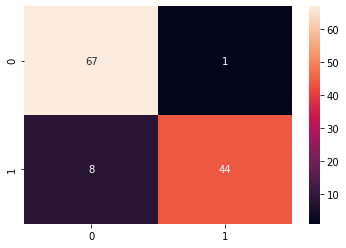

In [67]:
sns.heatmap(cm,annot=True)

## Naive Bayes Classifier

In [68]:
from sklearn.naive_bayes import GaussianNB

In [69]:
gnb = GaussianNB()

In [70]:
gnb_model = gnb.fit(X_train,y_train)

In [71]:
y_pred = gnb_model.predict(X_test)

In [72]:
cm = confusion_matrix(y_test,y_pred)

<AxesSubplot:>

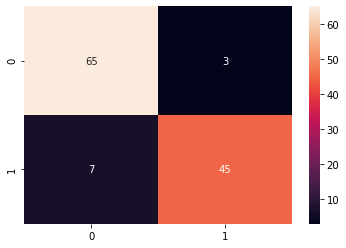

In [74]:
sns.heatmap(cm,annot=True)

**DAY-5**

## Revision Class

In [2]:
df1 = pd.read_csv('Admission_Predict.csv')
df1.head()

Serial No.  GRE Score  TOEFL Score  University Rating  SOP  LOR  CGPA  \
0           1        337          118                  4  4.5  4.5  9.65   
1           2        324          107                  4  4.0  4.5  8.87   
2           3        316          104                  3  3.0  3.5  8.00   
3           4        322          110                  3  3.5  2.5  8.67   
4           5        314          103                  2  2.0  3.0  8.21   

   Research  Chance of Admit  
0         1                1  
1         1                1  
2         1                0  
3         1                1  
4         0                0

In [4]:
# Libraries 
from sklearn.model_selection import train_test_split, cross_val_score, GridSearchCV
from sklearn.metrics import roc_auc_score, roc_curve, plot_roc_curve, cohen_kappa_score, confusion_matrix, accuracy_score

### 1.  Logistic Regression using Stats Models..

* In stats models we have to add constant.

In [5]:
X = df1.drop(['Serial No.','Chance of Admit'],axis=1)                # Independent features
y = df1['Chance of Admit']                                           # Dependent feature

In [8]:
# Scaling Independent features

from sklearn.preprocessing import StandardScaler
SS = StandardScaler()

X = pd.DataFrame(SS.fit_transform(X),columns=X.columns)

In [10]:
import statsmodels.api as sm

In [11]:
log_scaled_X = sm.add_constant(X)

In [12]:
X_train,X_test,y_train,y_test = train_test_split(log_scaled_X,y,test_size=0.3,random_state=1)

In [15]:
logreg_model_stats = sm.Logit(y_train,X_train).fit()

Optimization terminated successfully.
         Current function value: 0.269469
         Iterations 8


In [18]:
print(logreg_model_stats.summary())

                           Logit Regression Results                           
Dep. Variable:        Chance of Admit   No. Observations:                  280
Model:                          Logit   Df Residuals:                      272
Method:                           MLE   Df Model:                            7
Date:                Wed, 08 Sep 2021   Pseudo R-squ.:                  0.6084
Time:                        10:27:54   Log-Likelihood:                -75.451
converged:                       True   LL-Null:                       -192.68
Covariance Type:            nonrobust   LLR p-value:                 5.611e-47
                        coef    std err          z      P>|z|      [0.025      0.975]
-------------------------------------------------------------------------------------
const                -0.4365      0.213     -2.050      0.040      -0.854      -0.019
GRE Score             0.5055      0.436      1.160      0.246      -0.348       1.359
TOEFL Score           0.

In [22]:
logreg_model_stats.aic

166.90291935311745

In [23]:
# 2nd model (we are dropping CGPA which is significant feature)

X = df1.drop(['Serial No.','Chance of Admit','CGPA'],axis=1)                
y = df1['Chance of Admit'] 
log_scaled_X = sm.add_constant(X)

In [24]:
X_train,X_test,y_train,y_test = train_test_split(log_scaled_X,y,test_size=0.3,random_state=1)

In [25]:
logreg_model2_stats = sm.Logit(y_train,X_train).fit()

Optimization terminated successfully.
         Current function value: 0.299007
         Iterations 8


In [26]:
print(logreg_model2_stats.summary())

                           Logit Regression Results                           
Dep. Variable:        Chance of Admit   No. Observations:                  280
Model:                          Logit   Df Residuals:                      273
Method:                           MLE   Df Model:                            6
Date:                Wed, 08 Sep 2021   Pseudo R-squ.:                  0.5655
Time:                        10:47:08   Log-Likelihood:                -83.722
converged:                       True   LL-Null:                       -192.68
Covariance Type:            nonrobust   LLR p-value:                 2.898e-44
                        coef    std err          z      P>|z|      [0.025      0.975]
-------------------------------------------------------------------------------------
const               -50.5541      9.143     -5.529      0.000     -68.473     -32.635
GRE Score             0.0915      0.035      2.641      0.008       0.024       0.159
TOEFL Score           0.

In [27]:
logreg_model2_stats.aic

181.44378200899996

### 2. Yoden's Index

In [17]:
y_pred_prob = logreg_model_stats.predict(X_test)

In [21]:
y_pred = [0 if x < 0.5 else 1 for x in y_pred_prob]

In [36]:
fpr,tpr,thresh = roc_curve(y_test,y_pred_prob)

In [42]:
youdens_table = pd.DataFrame({'TPR':tpr,'FPR':fpr,'Threshold':thresh})
youdens_table.head()

TPR       FPR  Threshold
0  0.000000  0.000000   1.999355
1  0.018519  0.000000   0.999355
2  0.740741  0.000000   0.817440
3  0.740741  0.015152   0.801578
4  0.759259  0.015152   0.799750

In [47]:
youdens_table['TPR-FPR'] = youdens_table['TPR'] - youdens_table['FPR']

In [51]:
youdens_table.head()

TPR       FPR  Threshold   TPR-FPR
0  0.000000  0.000000   1.999355  0.000000
1  0.018519  0.000000   0.999355  0.018519
2  0.740741  0.000000   0.817440  0.740741
3  0.740741  0.015152   0.801578  0.725589
4  0.759259  0.015152   0.799750  0.744108

In [50]:
youdens_table.sort_values(by=['TPR-FPR'], ascending=False)

TPR       FPR  Threshold   TPR-FPR
12  0.944444  0.106061   0.450379  0.838384
10  0.907407  0.075758   0.478878  0.831650
11  0.907407  0.106061   0.464083  0.801347
8   0.851852  0.060606   0.576714  0.791246
9   0.851852  0.075758   0.528533  0.776094
6   0.796296  0.030303   0.779352  0.765993
16  0.981481  0.227273   0.253686  0.754209
14  0.962963  0.212121   0.278989  0.750842
4   0.759259  0.015152   0.799750  0.744108
2   0.740741  0.000000   0.817440  0.740741
7   0.796296  0.060606   0.771000  0.735690
15  0.962963  0.227273   0.254000  0.735690
13  0.944444  0.212121   0.291359  0.732323
5   0.759259  0.030303   0.798475  0.728956
3   0.740741  0.015152   0.801578  0.725589
18  1.000000  0.439394   0.074093  0.560606
17  0.981481  0.439394   0.075289  0.542088
1   0.018519  0.000000   0.999355  0.018519
0   0.000000  0.000000   1.999355  0.000000
19  1.000000  1.000000   0.000080  0.000000

In [52]:
youdens_table.sort_values(by=['TPR-FPR'], ascending=False).head(1)

TPR       FPR  Threshold   TPR-FPR
12  0.944444  0.106061   0.450379  0.838384

### 2. Cost-Based Method

In [53]:
# total_cost = FN*Cost_FN + FP*cost_FP

def cal_cost(actual_value,predicted_value,cost_fn,cost_fp):
    cm = confusion_matrix(actual_value,predicted_value)
    return cm[1][0]*cost_fn + cm[0][1]*cost_fp

In [59]:
l = []
for cutoff in range(10,100):
    total_cost = cal_cost(y_test,y_pred_prob.map(lambda x:1 if x>(cutoff/100) else 0),4,2)
    l.append((cutoff/100,total_cost))

In [63]:
# Sort according to 2nd element of tuple

sorted(l,key=lambda x:x[1],reverse=False)

[(0.42, 26),
 (0.43, 26),
 (0.44, 26),
 (0.45, 26),
 (0.35, 28),
 (0.36, 28),
 (0.37, 28),
 (0.38, 28),
 (0.39, 28),
 (0.4, 28),
 (0.41, 28),
 (0.47, 30),
 (0.31, 32),
 (0.32, 32),
 (0.33, 32),
 (0.34, 32),
 (0.22, 34),
 (0.23, 34),
 (0.24, 34),
 (0.25, 34),
 (0.46, 34),
 (0.48, 34),
 (0.49, 34),
 (0.5, 34),
 (0.17, 36),
 (0.18, 36),
 (0.19, 36),
 (0.2, 36),
 (0.21, 36),
 (0.26, 36),
 (0.27, 36),
 (0.3, 36),
 (0.51, 38),
 (0.15, 40),
 (0.16, 40),
 (0.28, 40),
 (0.29, 40),
 (0.53, 40),
 (0.54, 40),
 (0.55, 40),
 (0.56, 40),
 (0.57, 40),
 (0.14, 42),
 (0.52, 42),
 (0.13, 44),
 (0.58, 44),
 (0.59, 44),
 (0.6, 44),
 (0.61, 44),
 (0.62, 44),
 (0.63, 44),
 (0.64, 44),
 (0.65, 44),
 (0.12, 46),
 (0.66, 48),
 (0.67, 48),
 (0.68, 48),
 (0.11, 50),
 (0.1, 52),
 (0.69, 52),
 (0.7, 52),
 (0.71, 52),
 (0.72, 52),
 (0.73, 52),
 (0.74, 52),
 (0.75, 52),
 (0.76, 52),
 (0.77, 52),
 (0.78, 52),
 (0.79, 56),
 (0.81, 56),
 (0.8, 58),
 (0.82, 60),
 (0.83, 64),
 (0.84, 64),
 (0.85, 64),
 (0.86, 72),
 (0.87,

In [64]:
df_total_cost = pd.DataFrame(columns=['cutoff','total_cost'])
i = 0
for cutoff in range(10,100):
    total_cost = cal_cost(y_test,y_pred_prob.map(lambda x:1 if x>(cutoff/100) else 0),4,2)
    df_total_cost.loc[i] = [(cutoff/100),total_cost]
    i+=1

In [66]:
df_total_cost.sort_values(by='total_cost')

cutoff  total_cost
35    0.45        26.0
34    0.44        26.0
33    0.43        26.0
32    0.42        26.0
25    0.35        28.0
..     ...         ...
85    0.95       116.0
86    0.96       120.0
87    0.97       132.0
88    0.98       144.0
89    0.99       160.0

[90 rows x 2 columns]

In [ ]:
### 4.  